In [12]:
import numpy as np
import pandas as pd
import os
import glob
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
subdirs = []
for file in glob.glob(os.getcwd() + '/../../sub-2*'):
    subdirs.append(file)
subdirs.sort()
print("Subjects with cleaned data: " + str(len(subdirs)))

sesdirs = []
for i in range(0,len(subdirs)):
    for file in glob.glob(subdirs[i] + '/eeg/*'):
        sesdirs.append(file)
print("Nights cleaned: " + str(len(sesdirs)))

Subjects with cleaned data: 103
Nights cleaned: 158


In [14]:
nrem_dataframe = pd.read_csv('nrem_dataframe.csv') # previously saved dataset
nrem_dataframe

,ID,Visit,SA,Date_Time,Date,Time,Stage,Q1ExperienceNum,Q1Experience,Q1Report,...,FREQ_1-20,OBS_20-40,OBS_20-40_ALL,FREQ_20-40,OBS_1-40,OBS_1-40_ALL,FREQ_1-40,SPECEXP_20-40,SPECEXP_1-20,SPECEXP_1-40
0,2000,1,7,11/19/0014 05:08,NaN,5:08 AM,2.0,3.0,Report,walking,...,"[0.9765625, 0.9952909786860039, 1.014378631427...","[0.044441037610257604, 0.04389058848512792, 0....",0,"[20.01953125, 20.102796634807227, 20.186408337...","[6.365981446399439, 6.337062625205469, 6.30847...",0,"[0.9765625, 0.9878549542252945, 0.999277988441...",-2.908429,-1.597167,-1.894070
1,2000,1,1,11/19/0014 01:00,NaN,1:00 AM,2.0,3.0,Report,Food or herbal supplements,...,"[0.9765625, 0.9952909786860039, 1.014378631427...","[0.04976841917279595, 0.04823833604940741, 0.0...",0,"[20.01953125, 20.102796634807227, 20.186408337...","[23.251011097708343, 22.931896568384655, 22.61...",0,"[0.9765625, 0.9878549542252945, 0.999277988441...",-2.869262,-1.972114,-2.211796
2,2000,1,4,11/19/0014 03:15,NaN,3:15 AM,2.0,1.0,NoReport,NaN,...,"[0.9765625, 0.9952909786860039, 1.014378631427...","[0.028508679346405382, 0.028187012601003744, 0...",0,"[20.01953125, 20.102796634807227, 20.186408337...","[70.15147882868038, 68.71212912995402, 67.3032...",0,"[0.9765625, 0.9878549542252945, 0.999277988441...",-2.258941,-2.522573,-2.593137
3,2000,1,2,11/19/0014 01:38,NaN,1:38 AM,2.0,3.0,Report,Was trying to recall the previous dream,...,"[0.9765625, 0.9952909786860039, 1.014378631427...","[0.06624937107036157, 0.06516479818623867, 0.0...",0,"[20.01953125, 20.102796634807227, 20.186408337...","[18.535373627898412, 18.347788894361415, 18.16...",0,"[0.9765625, 0.9878549542252945, 0.999277988441...",-3.283843,-1.748453,-2.122809
4,2000,1,9,11/19/0014 06:07,NaN,6:07 AM,NaN,3.0,Report,Drive in a car with a friend going to the bank...,...,"[0.9765625, 0.9952909786860039, 1.014378631427...","[0.050222262780256516, 0.0495696456375519, 0.0...",0,"[20.01953125, 20.102796634807227, 20.186408337...","[3.7345908288255876, 3.7069231146960666, 3.679...",0,"[0.9765625, 0.9878549542252945, 0.999277988441...",-2.850670,-1.459328,-1.653961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,2144,2,6,06/02/0017 05:40,NaN,5:40 AM,NaN,3.0,Report,a picture of a dog bowl,...,0,0,0,0,0,0,0,NaN,NaN,NaN
972,2144,1,2,03/15/0017 01:40,NaN,1:40 AM,2.0,2.0,Something,foggy,...,0,0,0,0,0,0,0,NaN,NaN,NaN
973,2144,1,3,03/15/0017 02:17,NaN,2:17 AM,2.0,3.0,Report,an animal standing on top of a ping-pong paddle,...,0,0,0,0,0,0,0,NaN,NaN,NaN
974,2144,1,5,03/15/0017 04:04,NaN,4:04 AM,2.0,3.0,Report,"ppt saw her mother, grandmother, and great gra...",...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [ ]:
nrem_awakenings = []
nrem_awakenings_per_ses = []
all_awakenings_per_ses = []

hold_out_validation_set = []

for i in range(0,len(sesdirs)):
    
    for file in glob.glob(sesdirs[i] + '/*cleaned2_nrem.set'):
        nrem_awakenings.append(file)
        
    if len(glob.glob(sesdirs[i] + '/*cleaned2_nrem.set')) == 0:
        print("No cleaned files in session: " + sesdirs[i])
        continue
        
    if len(glob.glob(sesdirs[i] + '/*awakening_table*')) == 0:
        print("No awakenings table: " + sesdirs[i])

    nrem_awakenings_per_ses.append(len(glob.glob(sesdirs[i] + '/*cleaned2_nrem.set')))
    all_awakenings_per_ses.append(len(glob.glob(sesdirs[i] + '/*scoring.png')))
    
    if sesdirs[i] not in nrem_dataframe['SES_PATH'].values:
        hold_out_validation_set.append(glob.glob(sesdirs[i] + '/*cleaned2_nrem.set')[random.randint(0, len(glob.glob(sesdirs[i] + '/*cleaned2_nrem.set'))-1)])
    

In [5]:
print("add to hold_out_validation_set:")
print(hold_out_validation_set)

add to hold_out_validation_set:
[]


In [6]:
# populate entire hold_out_validation_set list
for i in range(0,len(nrem_dataframe[nrem_dataframe["HOLD_OUT"] == True]["PATH"].values)):
    hold_out_validation_set.append(nrem_dataframe[nrem_dataframe["HOLD_OUT"] == True]["PATH"].values[i])

print("Held-out data: " + str(len(hold_out_validation_set)) + " awakenings, " +\
      str(np.round(len(hold_out_validation_set)/len(nrem_awakenings)*100)) + "% of all NREM data")

Held-out data: 156 awakenings, 16.0% of all NREM data


In [ ]:
nrem_awakenings[0]

### Which files are *not* backed up on external hard drive?

In [732]:
subdirs_backup = []
for file in glob.glob('/Volumes/Backup Plus/extraction_TJV_backup' + '/sub-2*'):
    subdirs_backup.append(file)
subdirs.sort()
print("Subjects with backed up data: " + str(len(subdirs_backup)))

sesdirs_backup = []
for i in range(0,len(subdirs_backup)):
    for file in glob.glob(subdirs_backup[i] + '/eeg/*'):
        sesdirs_backup.append(file[43:130])
print("Nights with backed up data: " + str(len(sesdirs_backup)) + "\n")

track = []
for i in range(0,len(sesdirs)):
    for j in range(0,len(sesdirs_backup)):
        if sesdirs_backup[j] in sesdirs[i]:
            track.append(int(i))
            
for i in range(0,len(sesdirs)):
    if i not in track:
        print(sesdirs[i][119:150])

Subjects with backed up data: 102
Nights with backed up data: 152

sub-2074/eeg/ses-2
sub-2078/eeg/ses-3
sub-2082/eeg/ses-1
sub-2102/eeg/ses-2
sub-2111/eeg/ses-2
sub-2144/eeg/ses-3


### Which cleaned files are *not* yet transferred to final folder?

In [745]:
subdirs_nt = []
for file in glob.glob('/Volumes/NCCAM_scratch/NCCAM_scratch/serial_awakenings_hdeeg_tv/' + 'sub-2*'):
    subdirs_nt.append(file)
subdirs_nt.sort()

sesdirs_nt = []
for i in range(0,len(subdirs_nt)):
    for file in glob.glob(subdirs_nt[i] + '/eeg/*'):
        if next((s for s in glob.glob(file + "/*") if "cleaned2" in s), None) != None:
            sesdirs_nt.append(file[68:90])

for i in range(0,len(sesdirs_nt)):
    if next((s for s in sesdirs if sesdirs_nt[i] in s), None) == None:
        print(sesdirs_nt[i])

In [736]:
data = pd.read_csv(sesdirs[0] + "/awakening_table.txt", sep=",") # to access columns
nrem_dataframe = pd.DataFrame(columns=data.columns)

for i in range(0,len(sesdirs)):
    if os.path.exists(sesdirs[i] + "/awakening_table.txt"):
        data = pd.read_csv(sesdirs[i] + "/awakening_table.txt", sep=",")

        for file in glob.glob(sesdirs[i] + '/*cleaned2_nrem.set'):
            ent_m_awakening = int(file[file.find("awakening-") + 10:file.find("-cleaned2")]) # entry matched awakening number

            nrem_dataframe = nrem_dataframe.append(data[data["ENTRY_MATCHED_AWAKENING_NO"] == ent_m_awakening], ignore_index=True)
            
            nrem_dataframe.loc[len(nrem_dataframe)-1,"PATH"] = file # add path to recently appended row
            nrem_dataframe.loc[len(nrem_dataframe)-1,"SES_PATH"] = sesdirs[i] # add sesssion path to recently appended row
        
            
            if file in hold_out_validation_set:
                nrem_dataframe.loc[len(nrem_dataframe)-1,"HOLD_OUT"] = True
            else:
                nrem_dataframe.loc[len(nrem_dataframe)-1,"HOLD_OUT"] = False
            
nrem_dataframe.to_csv('nrem_dataframe.csv', index=False)

In [737]:
print("NREM awakenings : " + str(len(nrem_dataframe)))
print("ALL awakenings : " + str(np.sum(all_awakenings_per_ses)))
print("Average NREM awakenings per session: {:0.2f}".format(np.average(np.array(nrem_awakenings_per_ses))))
print("Median NREM awakenings per session: {:0.2f}".format(np.median(np.array(nrem_awakenings_per_ses))))

NREM awakenings : 976
ALL awakenings : 1441
Average NREM awakenings per session: 6.22
Median NREM awakenings per session: 6.00


### What portion of awakenings are NREM?

Text(0.5, 0, 'Awakenings/Night')

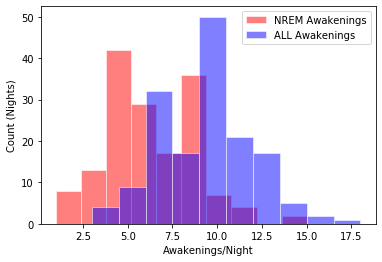

In [738]:
plt.figure()
ax = plt.gca()
ax.hist(nrem_awakenings_per_ses, color='red', edgecolor='white', alpha=0.5, label="NREM Awakenings")[0]
ax.hist(all_awakenings_per_ses, color='blue', edgecolor='white', alpha=0.5, label="ALL Awakenings")[0]
plt.legend()
plt.ylabel("Count (Nights)")
plt.xlabel("Awakenings/Night")

In [432]:
# import mne

# cleaned_length = []
# for i in range(0,len(nrem_awakenings)):
#     x = mne.io.read_raw_eeglab(nrem_awakenings[i])
#     cleaned_length.append(len(x))

In [433]:
# raw = mne.io.read_raw_eeglab(nrem_awakenings[10])
# # raw.plot()
# mne.viz.plot_raw_psd(raw,1,50)

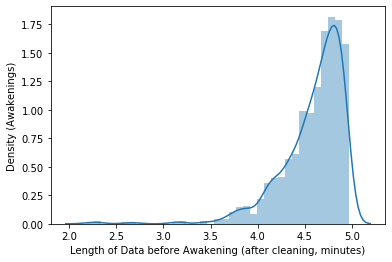

In [474]:
ax = sns.distplot(np.array(cleaned_length)/(500*60),
                  kde=True)
plt.ylabel('Density (Awakenings)')
plt.xlabel('Length of Data before Awakening (after cleaning, minutes)');

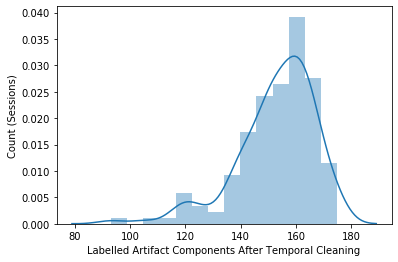

In [417]:
import scipy.io
artifact_components = []
for i in range(0,len(sesdirs)):
    if os.path.exists(sesdirs[i] + '/ic_artifacts.mat'):
        mat = scipy.io.loadmat(sesdirs[i] + '/ic_artifacts.mat')
        artifact_components.append(len(np.squeeze(mat['ic_artifacts_all'])))
        
# plt.hist(,bins=50)  # `density=False` would make counts
ax = sns.distplot(np.array(artifact_components),
                  kde=True)
plt.ylabel('Count (Sessions)')
plt.xlabel('Labelled Artifact Components After Temporal Cleaning');

Populating the interactive namespace from numpy and matplotlib
/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2000/eeg/ses-1


/Users/tononilab/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'mat']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


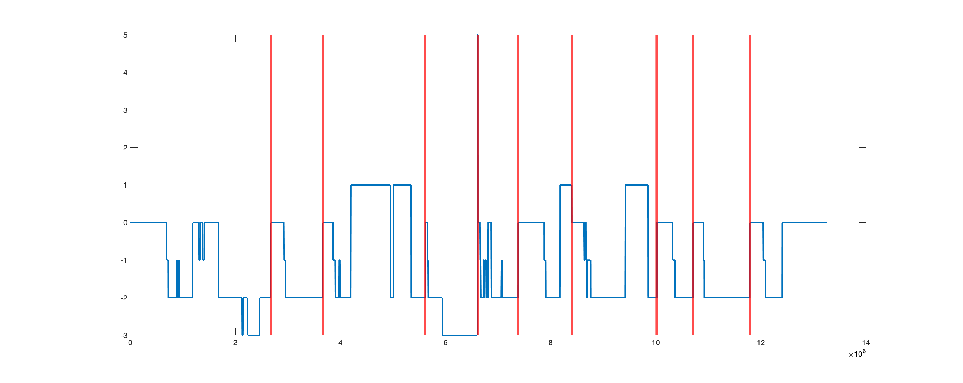

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2001/eeg/ses-3


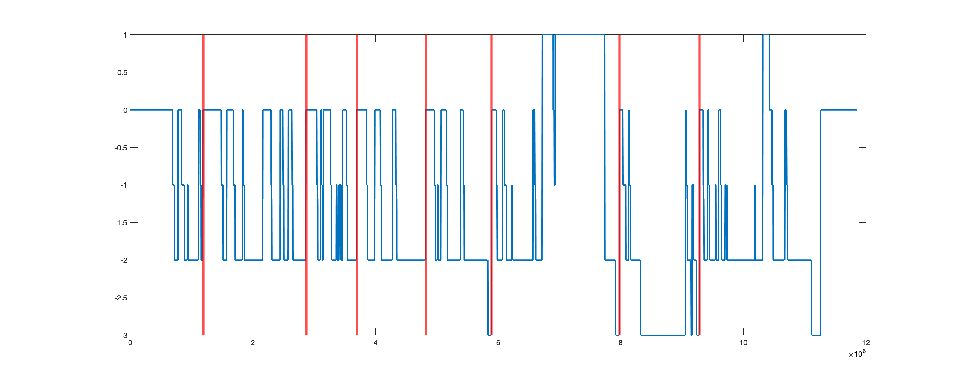

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2002/eeg/ses-2


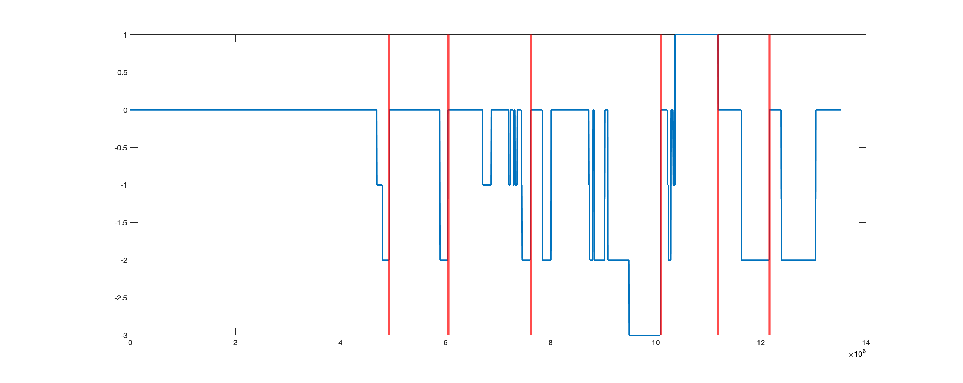

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2003/eeg/ses-3


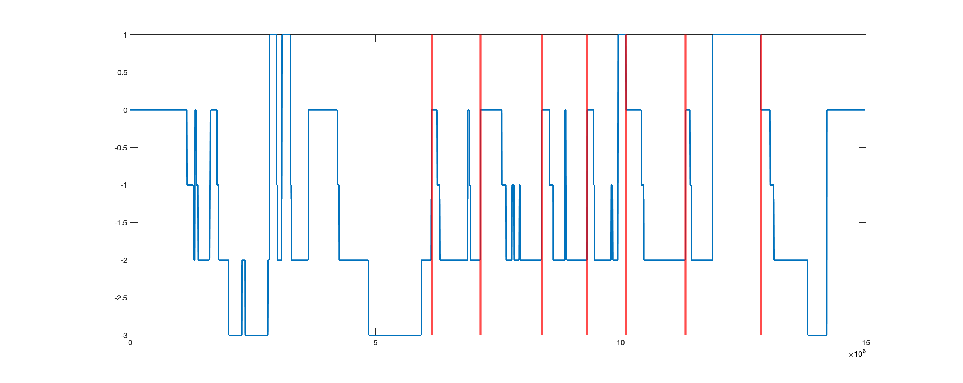

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2004/eeg/ses-3


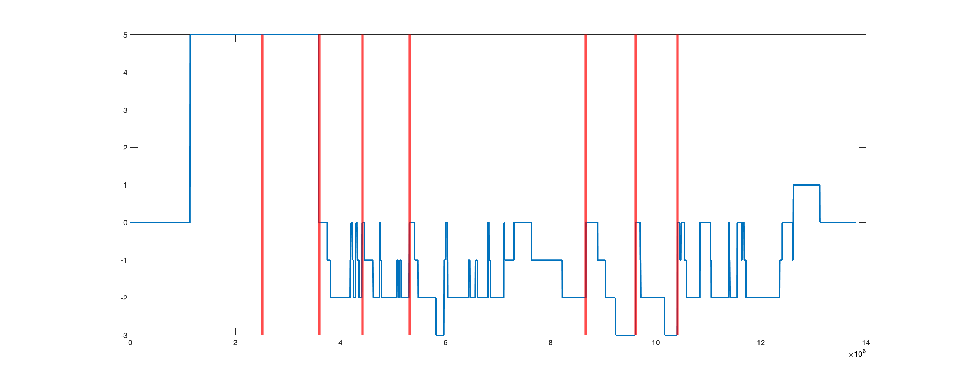

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2005/eeg/ses-3


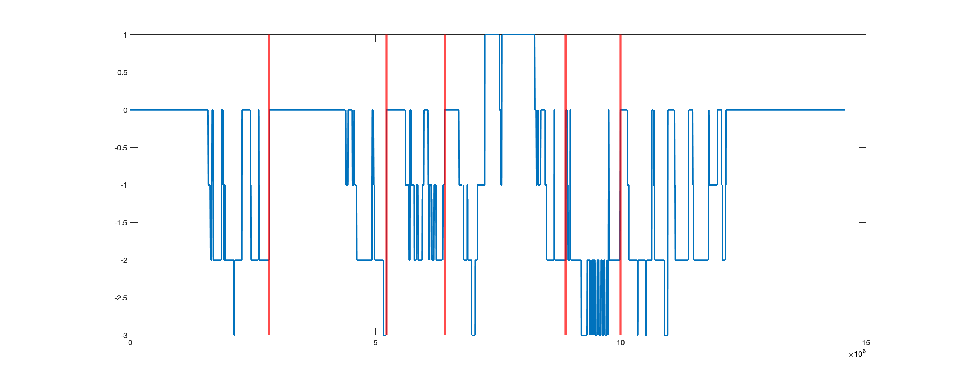

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2006/eeg/ses-1


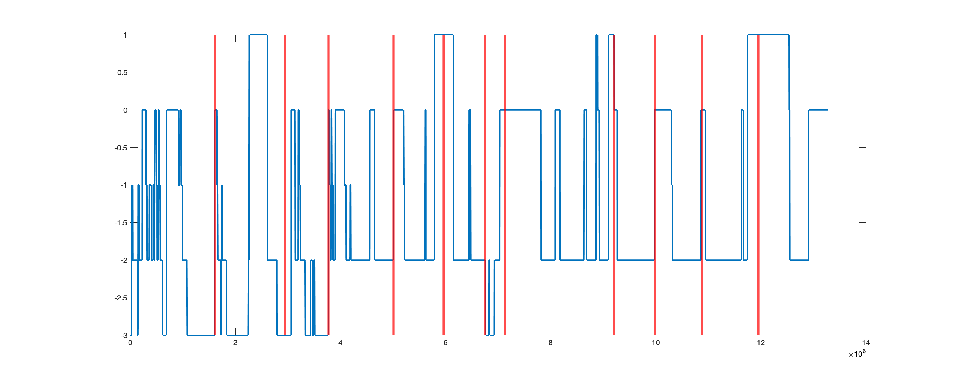

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2006/eeg/ses-2


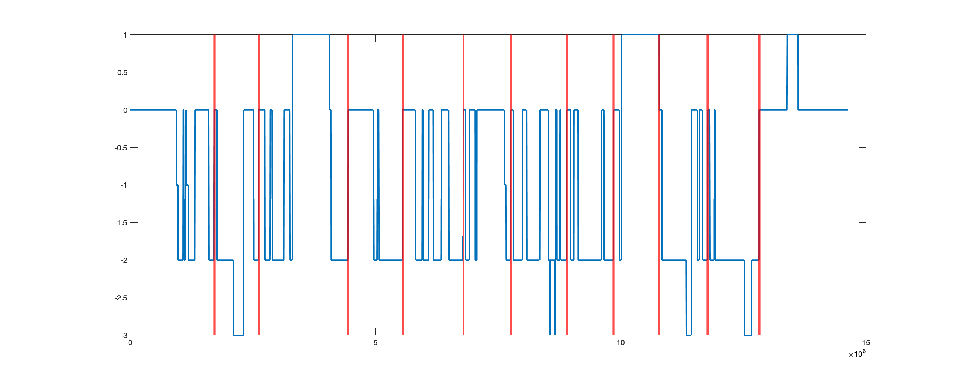

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2007/eeg/ses-2


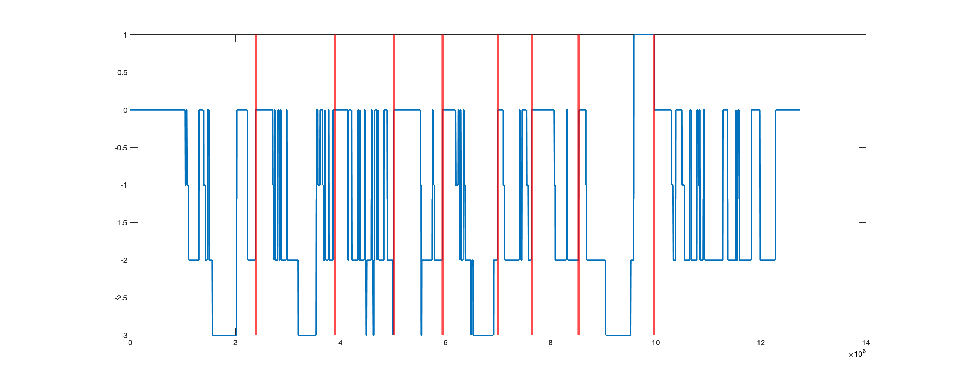

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2008/eeg/ses-3


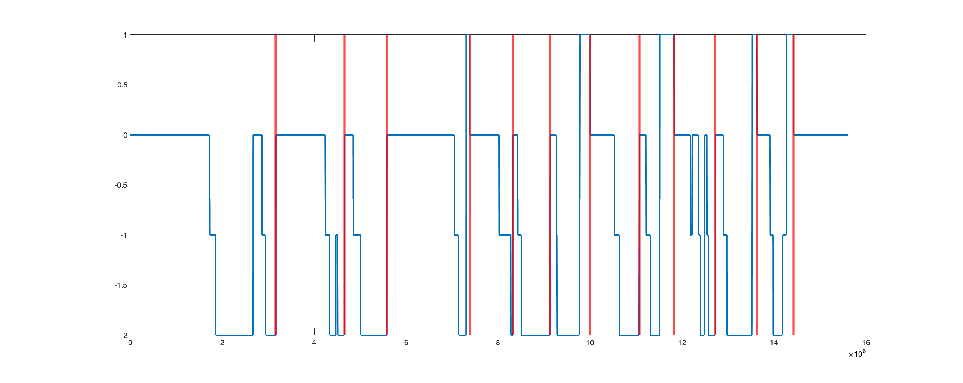

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2008/eeg/ses-2


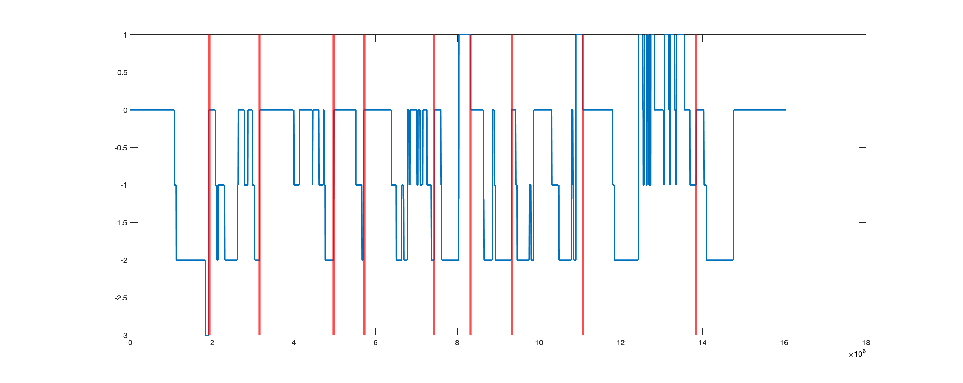

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2008/eeg/ses-1


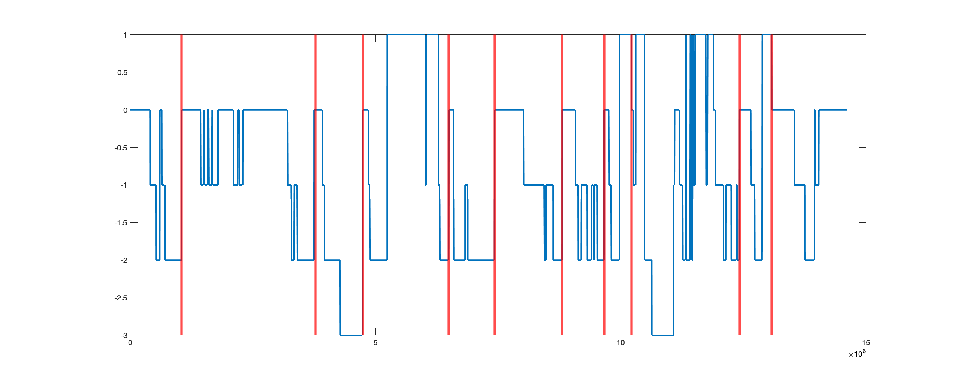

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2009/eeg/ses-2


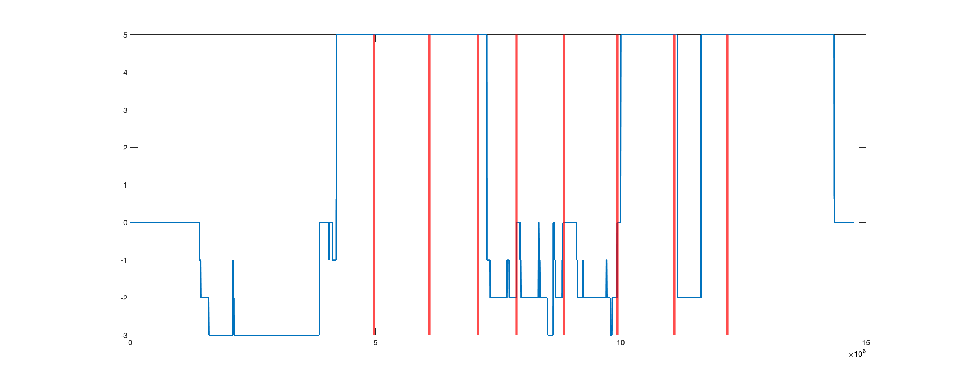

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2009/eeg/ses-1


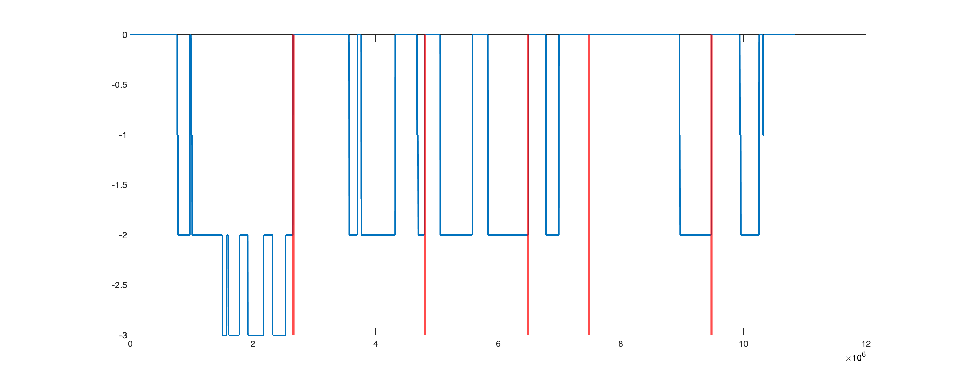

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2010/eeg/ses-1


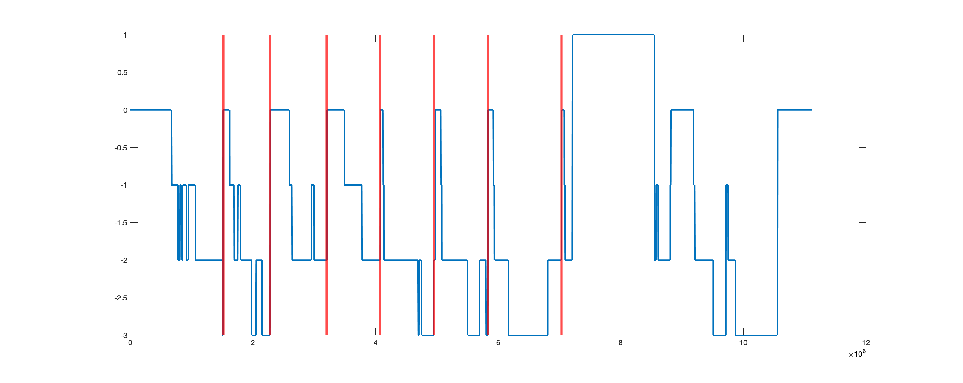

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2011/eeg/ses-1


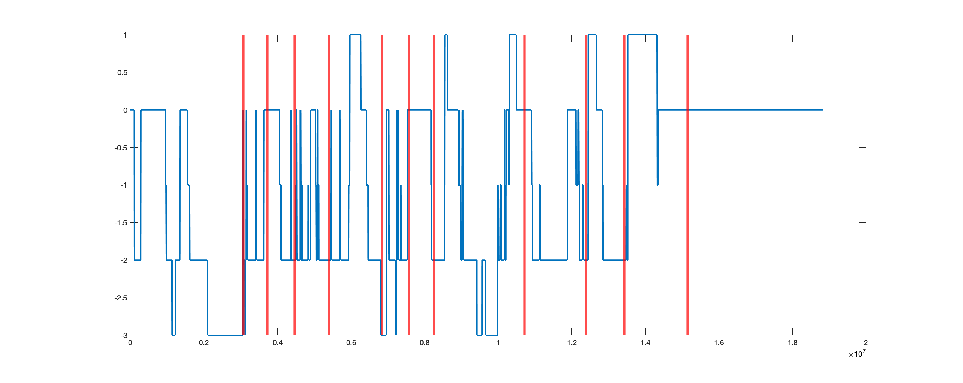

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2012/eeg/ses-2


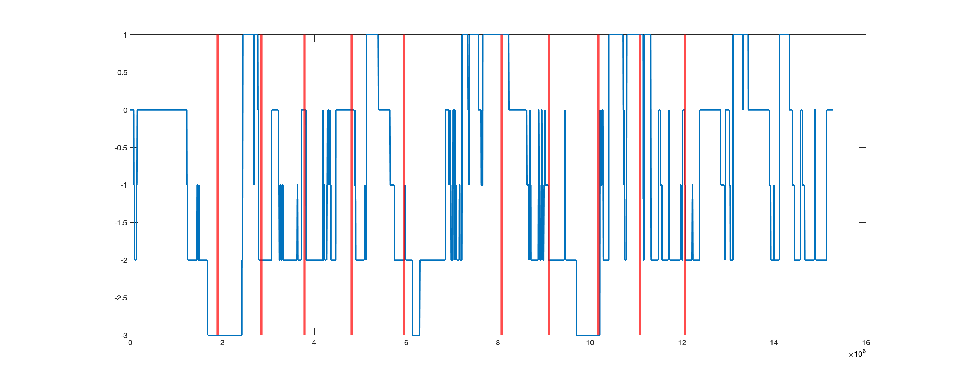

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2014/eeg/ses-3


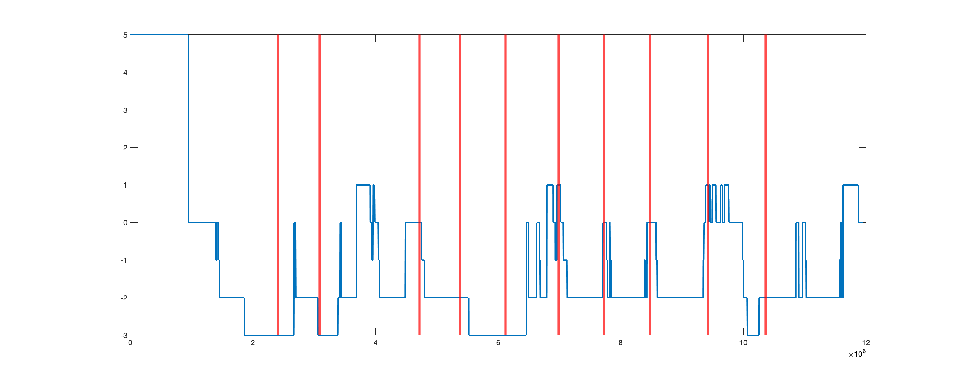

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2016/eeg/ses-3


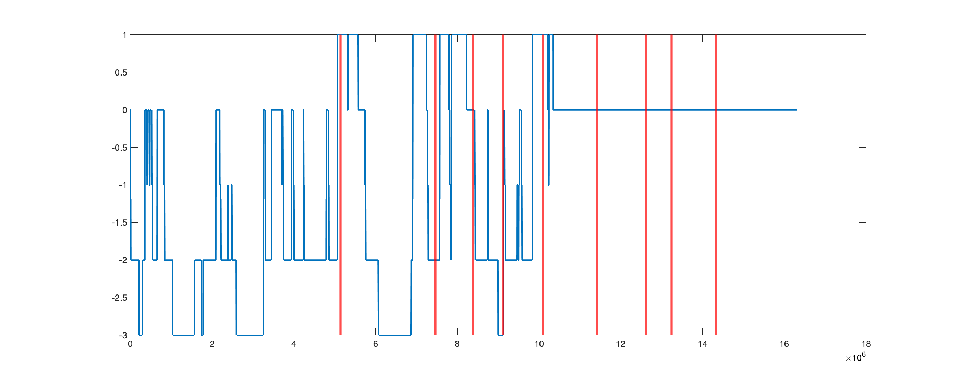

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2019/eeg/ses-2


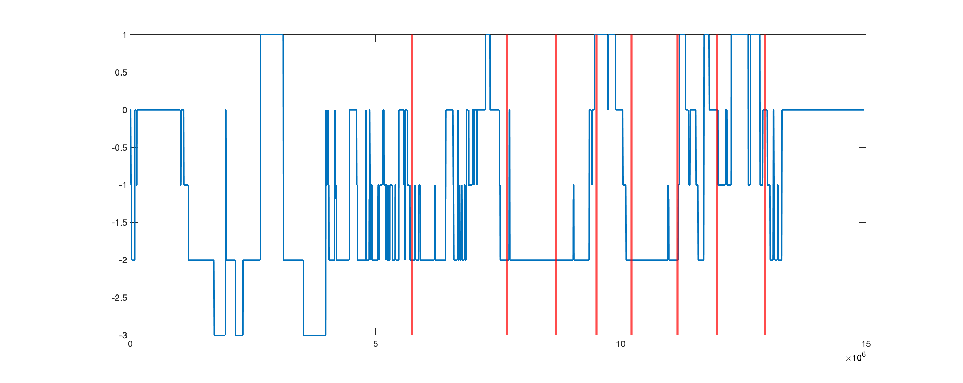

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2020/eeg/ses-1


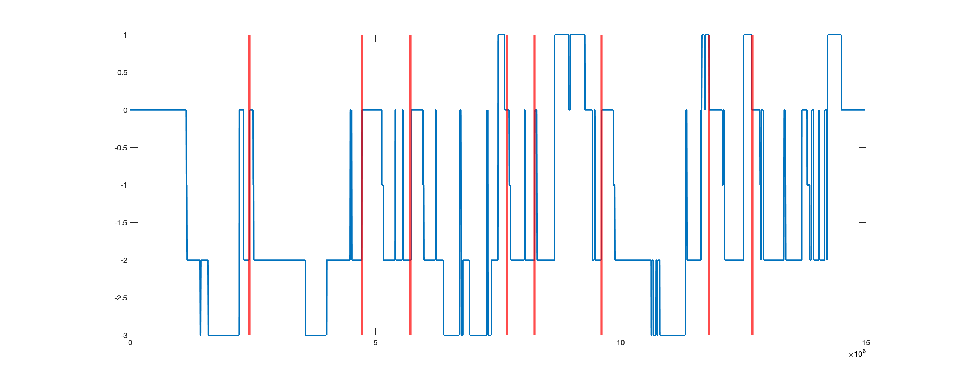

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2022/eeg/ses-2


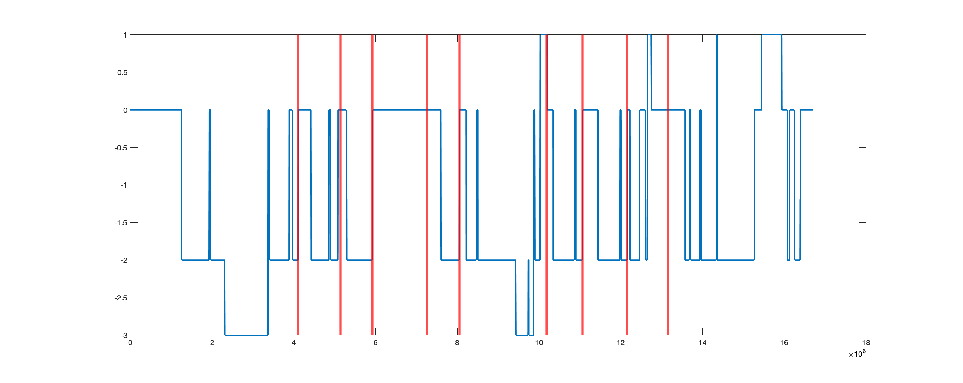

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2022/eeg/ses-1


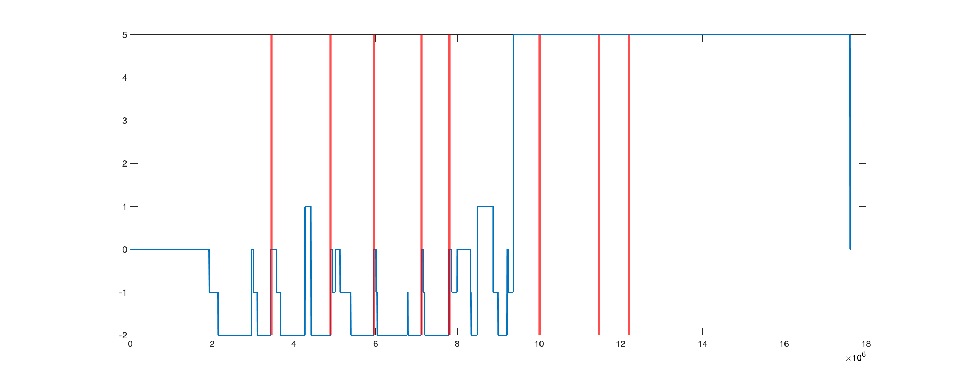

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2023/eeg/ses-2


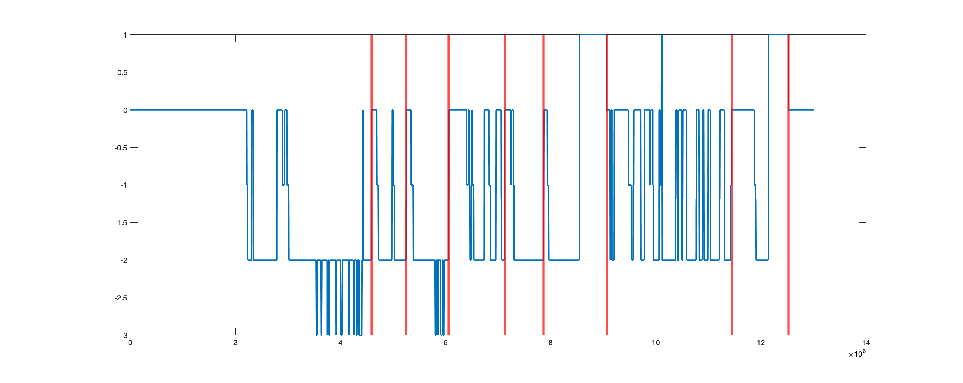

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2024/eeg/ses-1


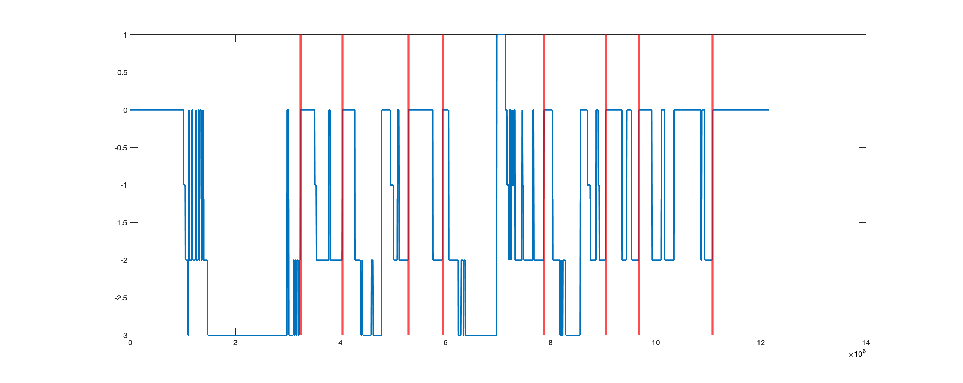

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2026/eeg/ses-3


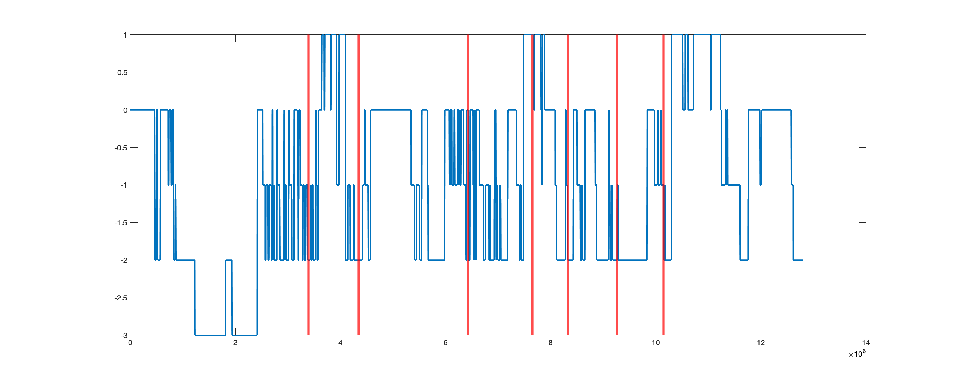

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2026/eeg/ses-1


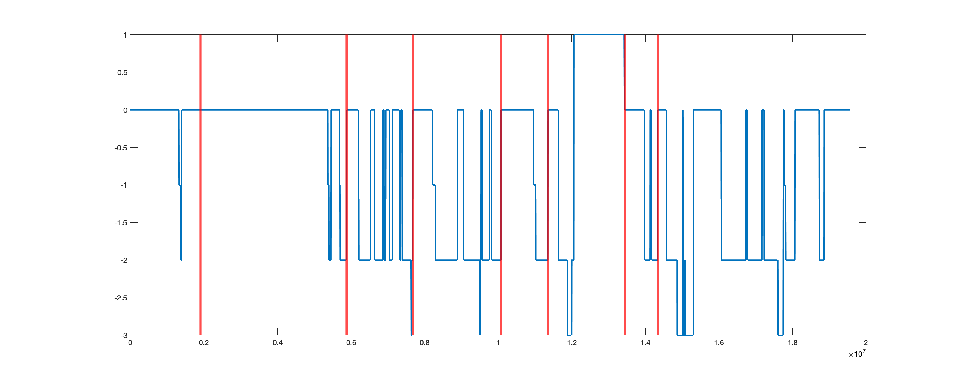

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2027/eeg/ses-3


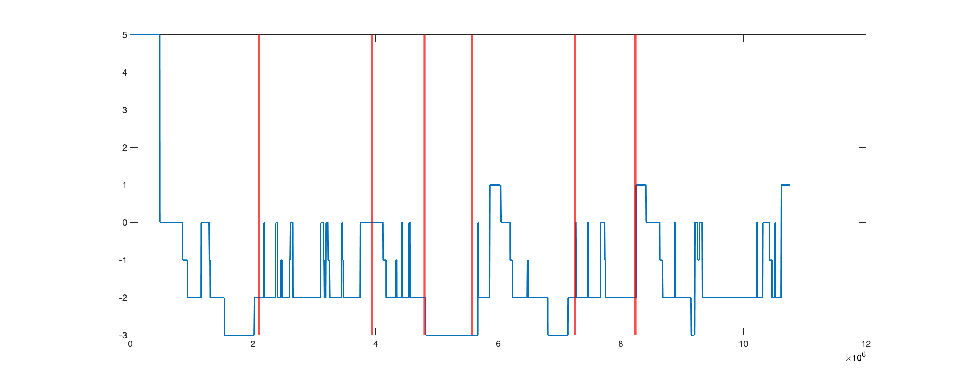

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2027/eeg/ses-1


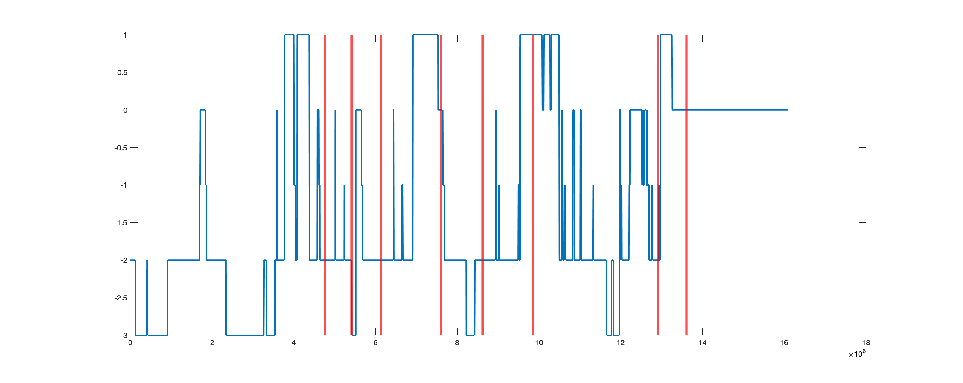

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2028/eeg/ses-1


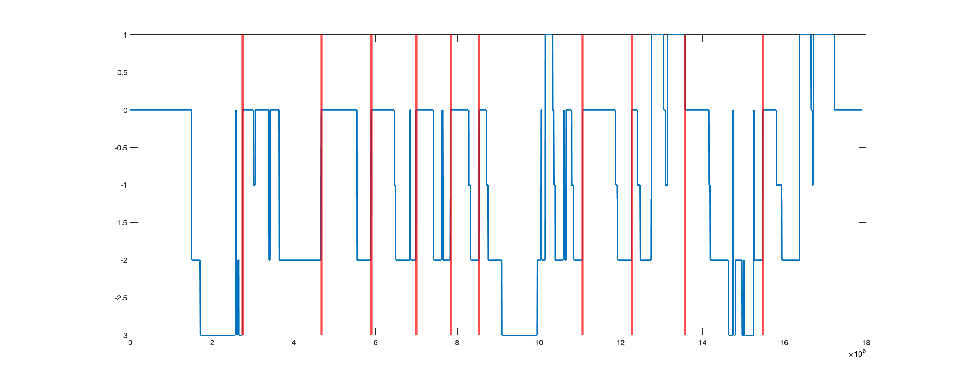

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2028/eeg/ses-3


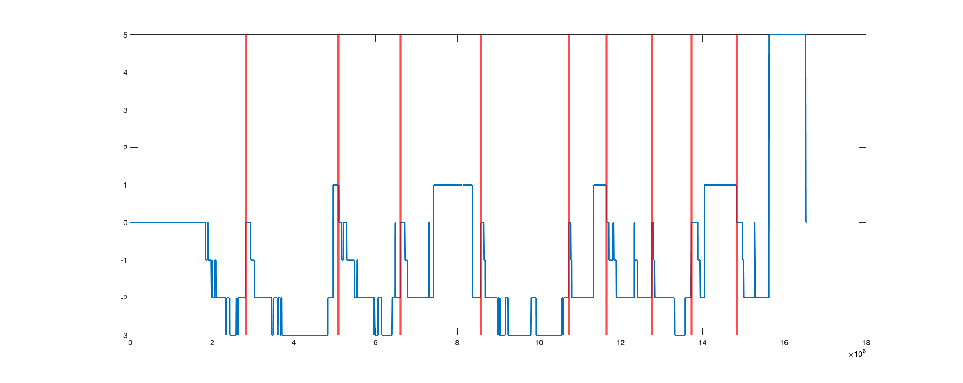

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2029/eeg/ses-1


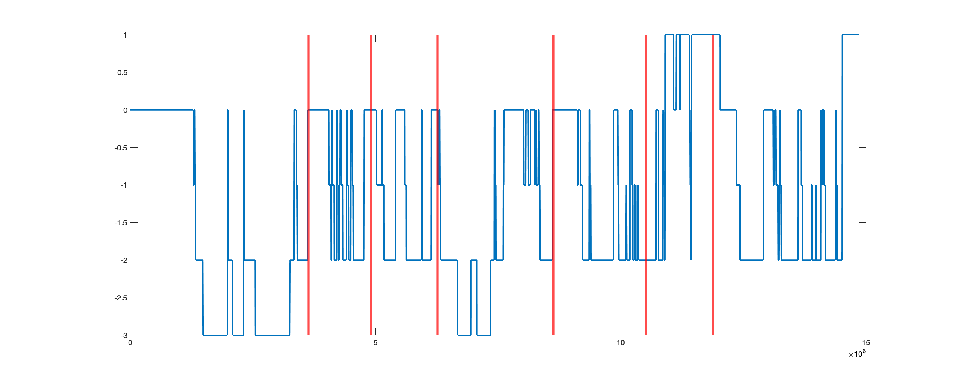

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2029/eeg/ses-2


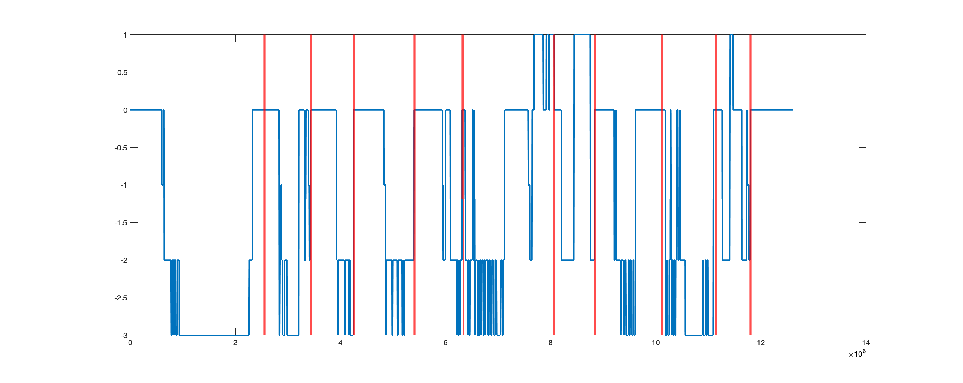

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2030/eeg/ses-3


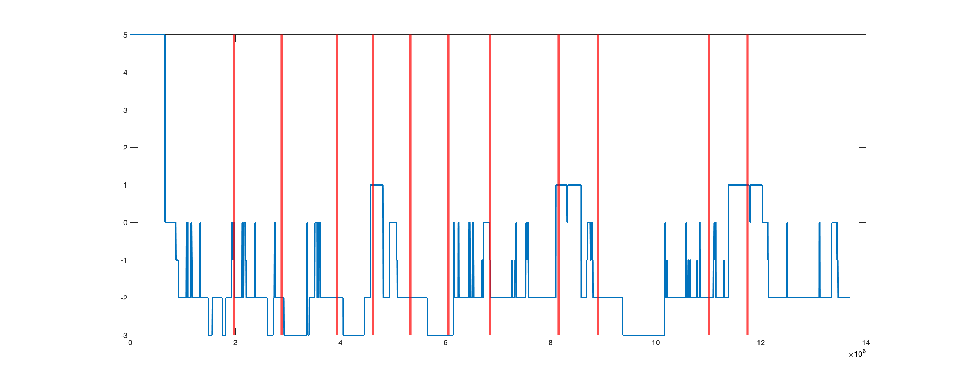

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2030/eeg/ses-2


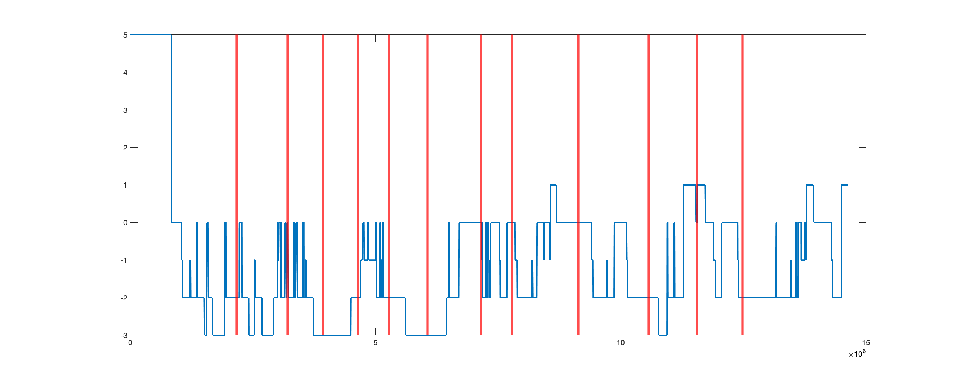

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2030/eeg/ses-1


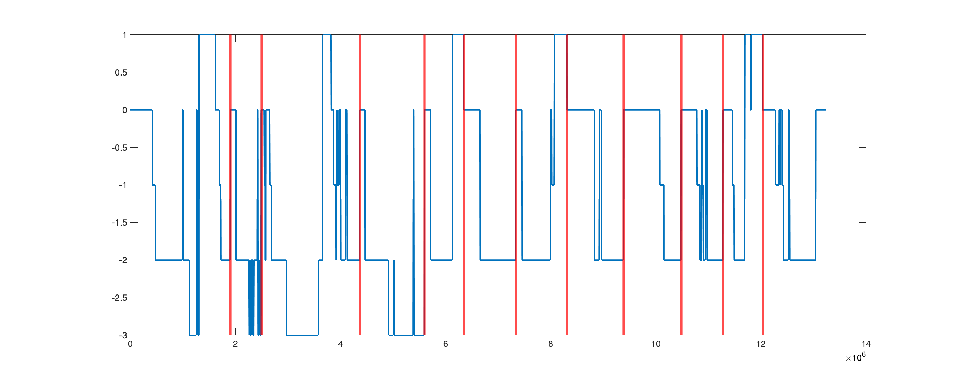

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2031/eeg/ses-1


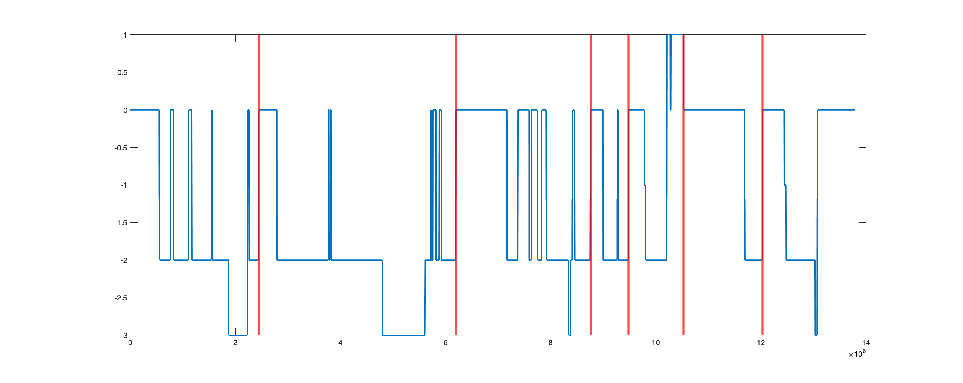

NO AWAKENINGS PLOT: /Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2032/eeg/ses-3
/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2032/eeg/ses-1


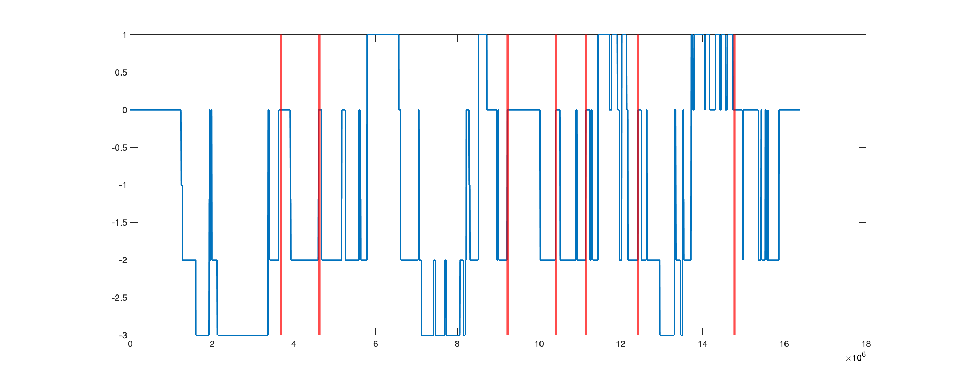

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2032/eeg/ses-2


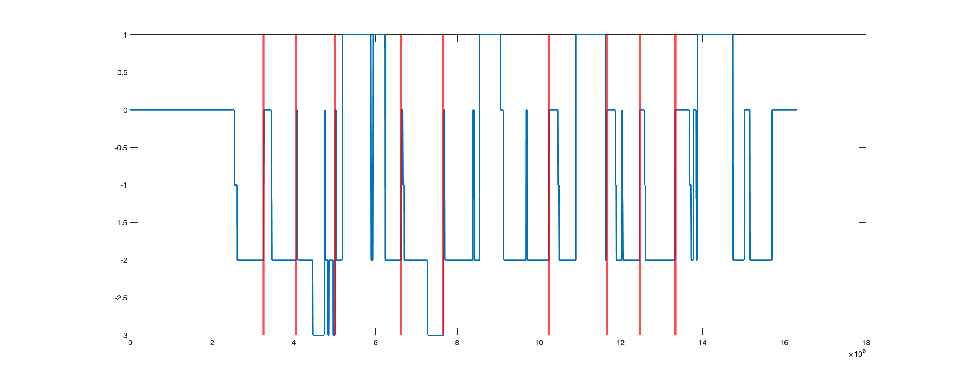

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2034/eeg/ses-1


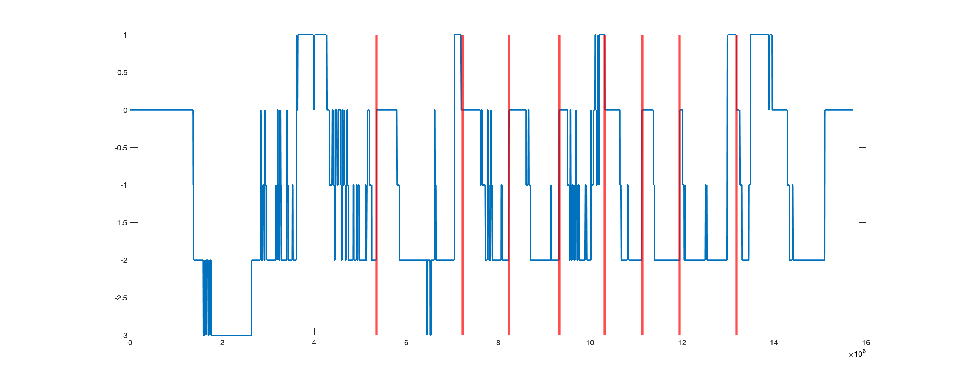

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2035/eeg/ses-2


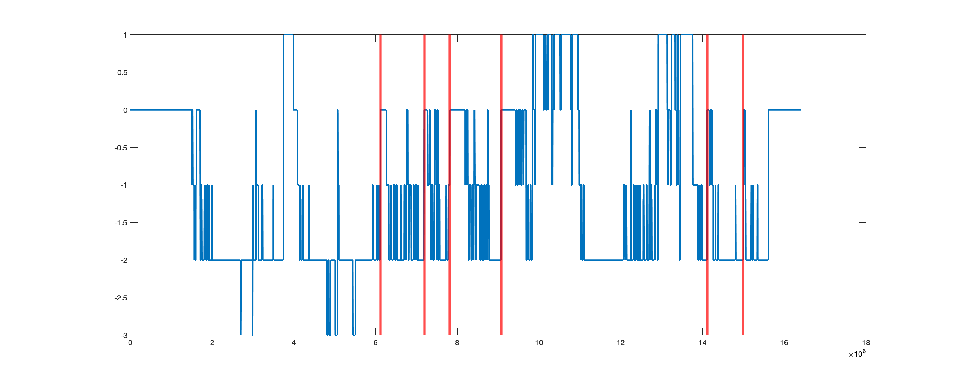

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2037/eeg/ses-3


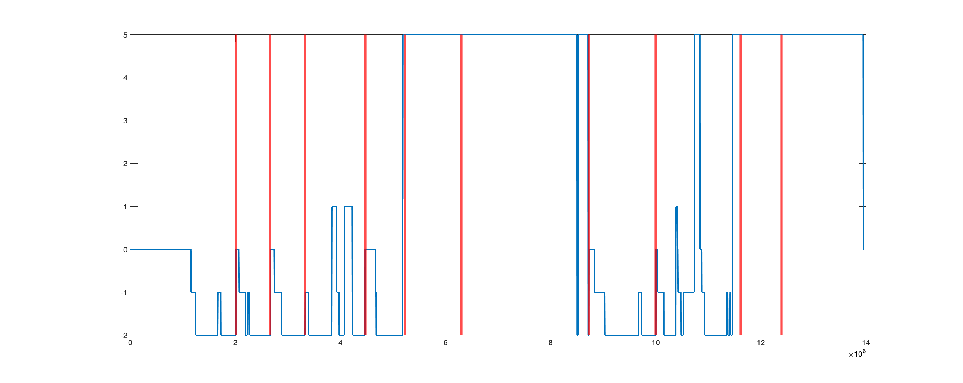

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2037/eeg/ses-1


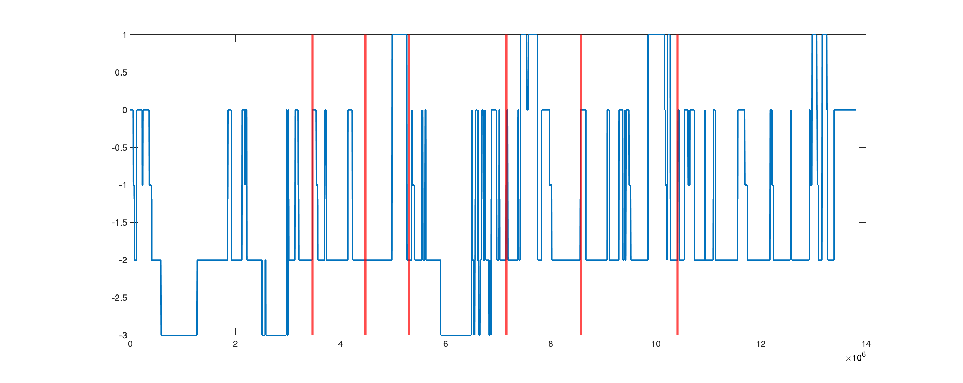

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2038/eeg/ses-1


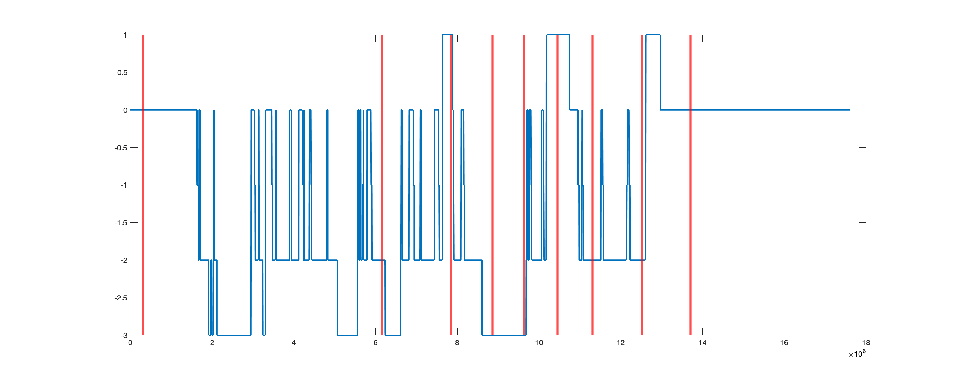

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2041/eeg/ses-1


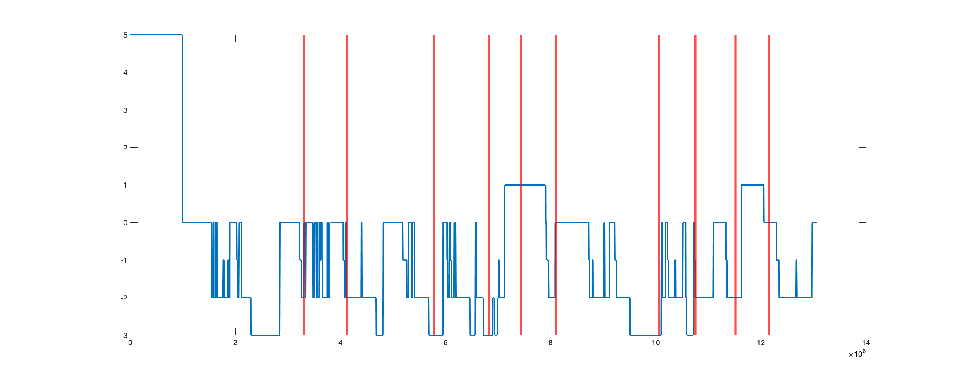

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2042/eeg/ses-1


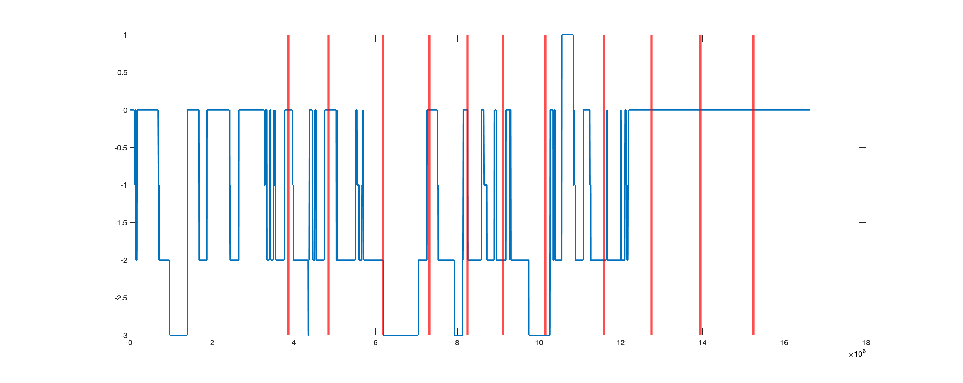

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2042/eeg/ses-3


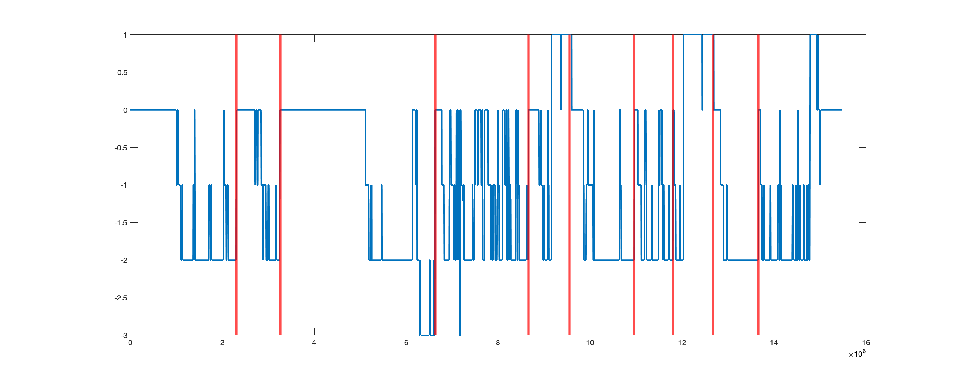

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2043/eeg/ses-2


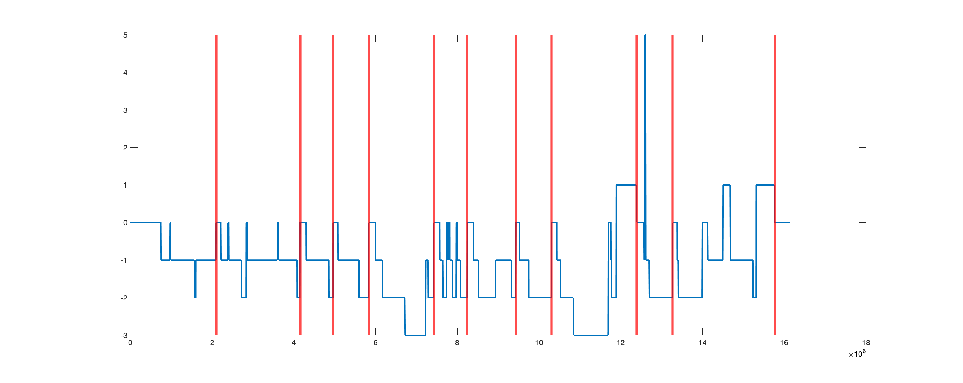

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2046/eeg/ses-1


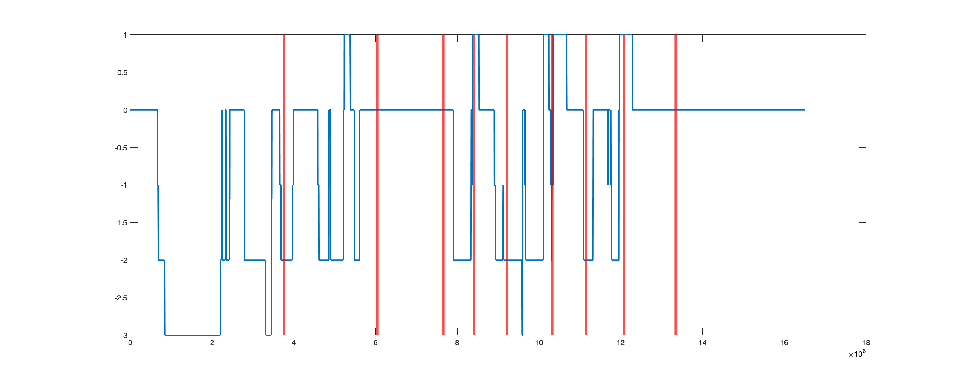

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2047/eeg/ses-3


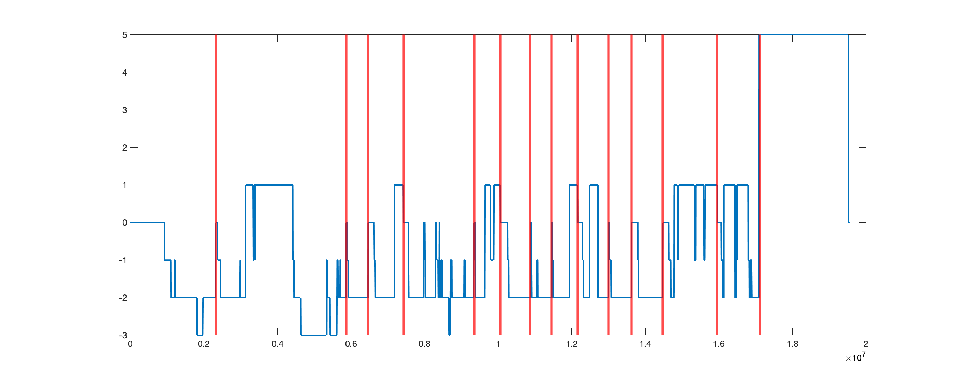

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2047/eeg/ses-1


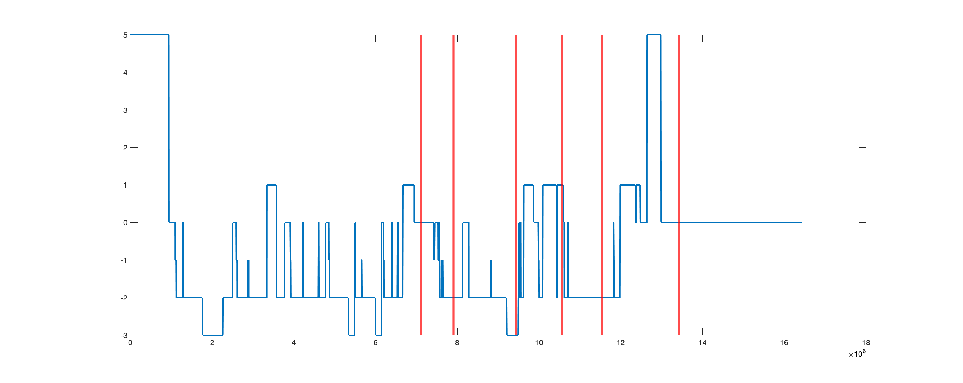

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2047/eeg/ses-2


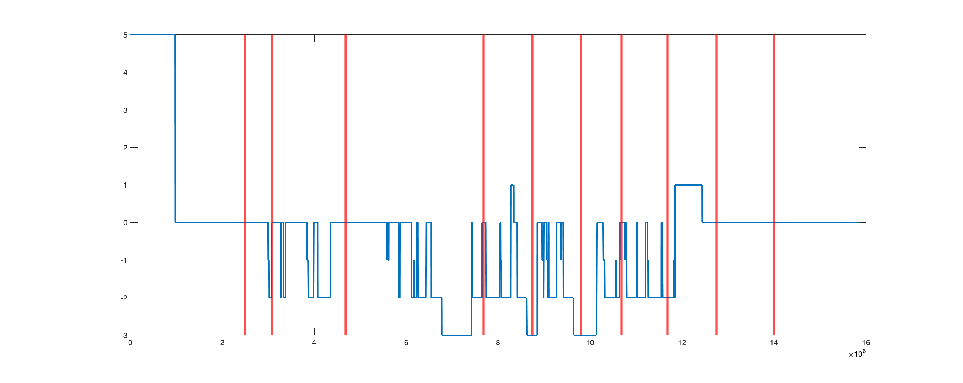

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2048/eeg/ses-2


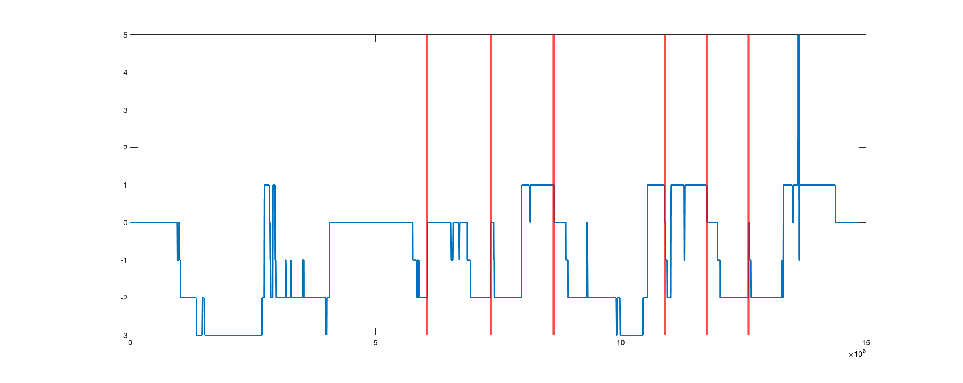

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2048/eeg/ses-1


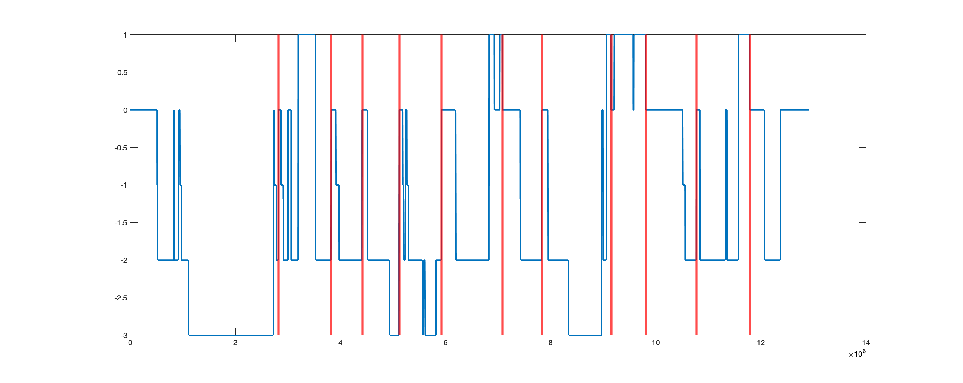

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2049/eeg/ses-2


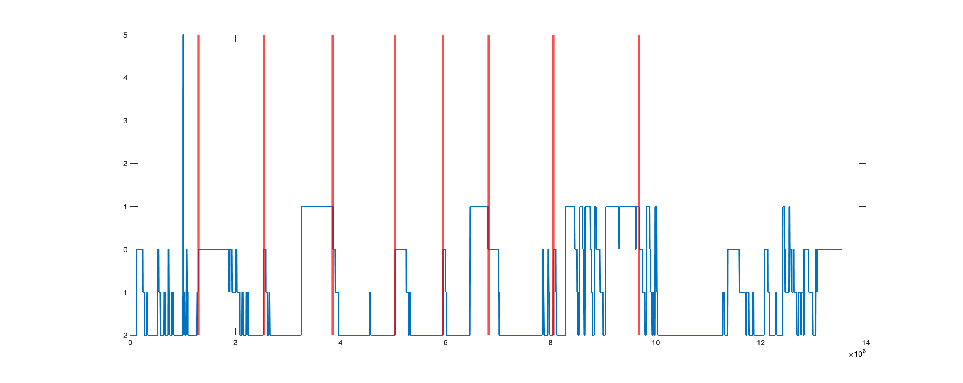

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2049/eeg/ses-3


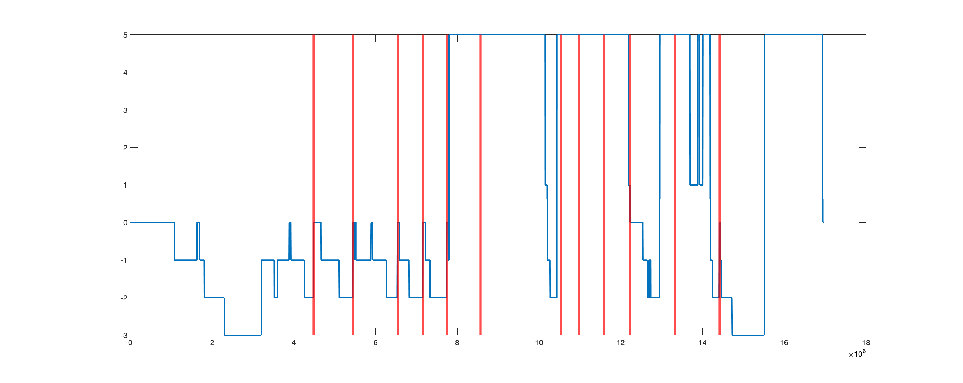

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2051/eeg/ses-1


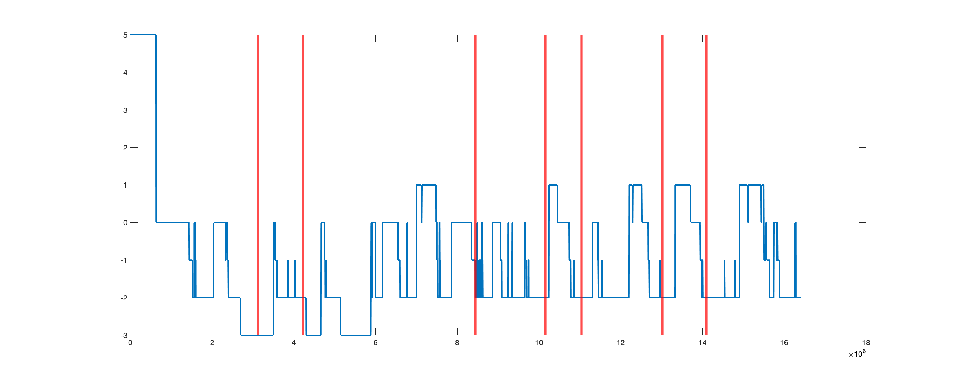

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2051/eeg/ses-2


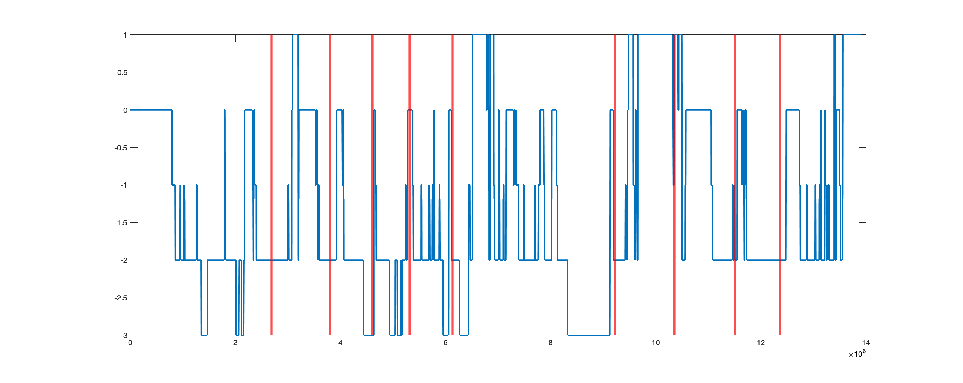

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2052/eeg/ses-3


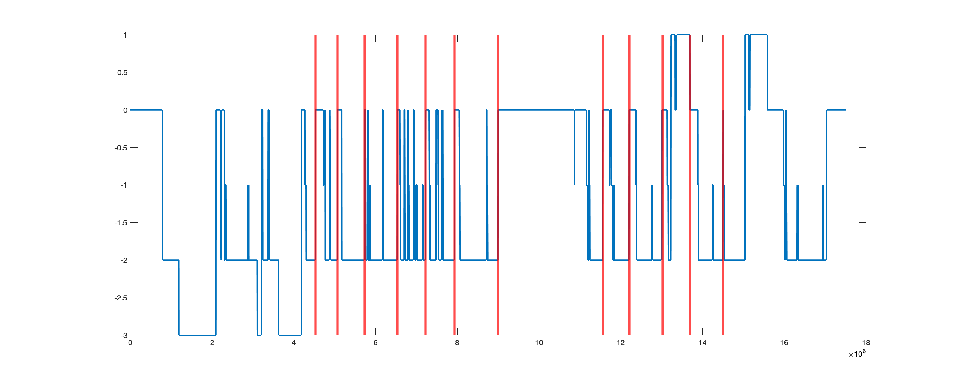

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2052/eeg/ses-1


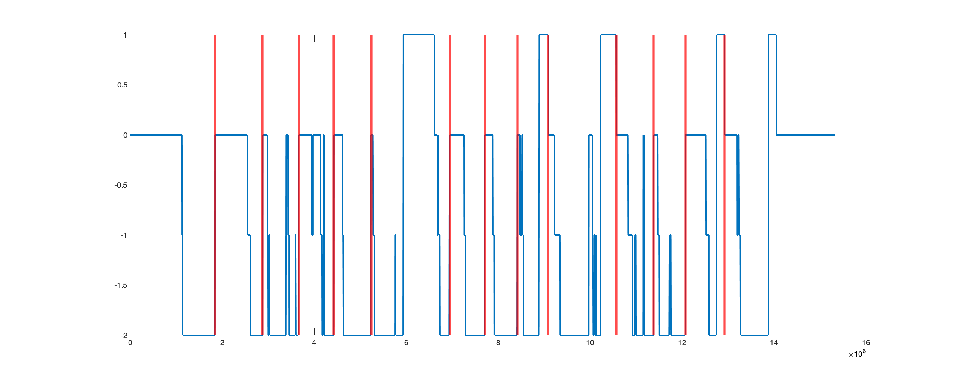

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2053/eeg/ses-2


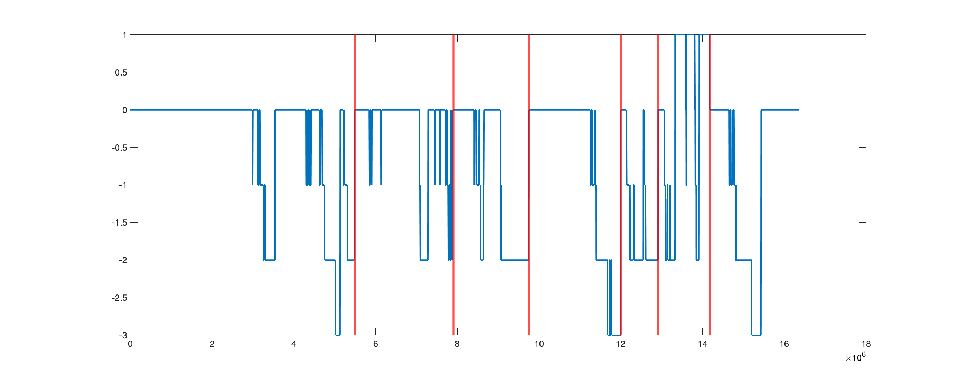

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2054/eeg/ses-3


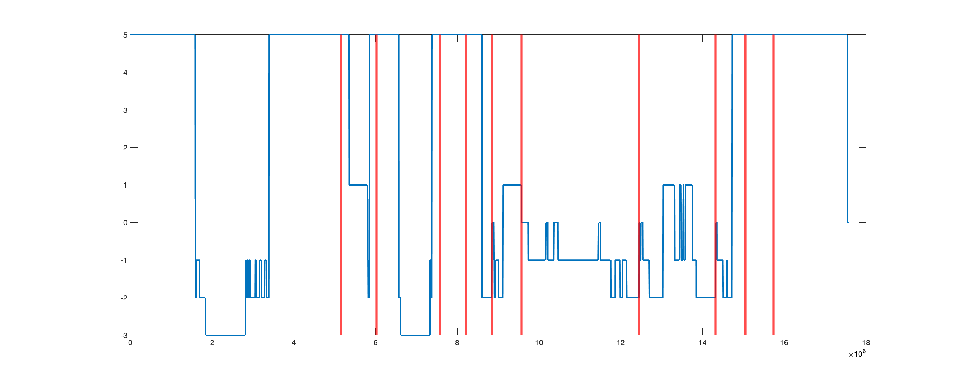

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2054/eeg/ses-2


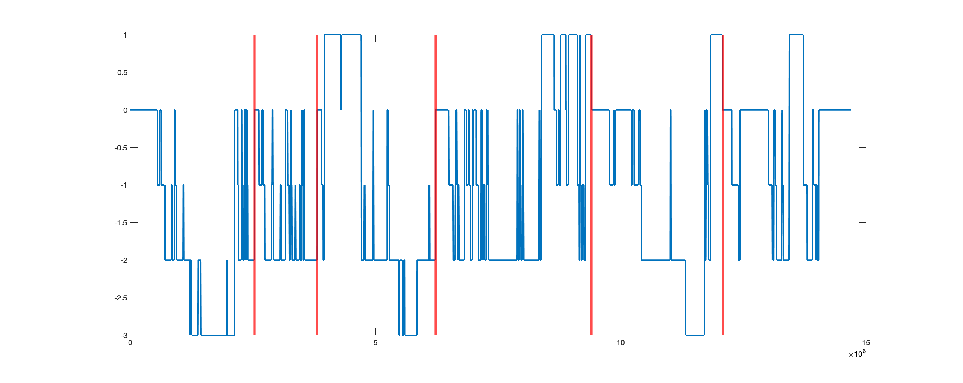

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2054/eeg/ses-1


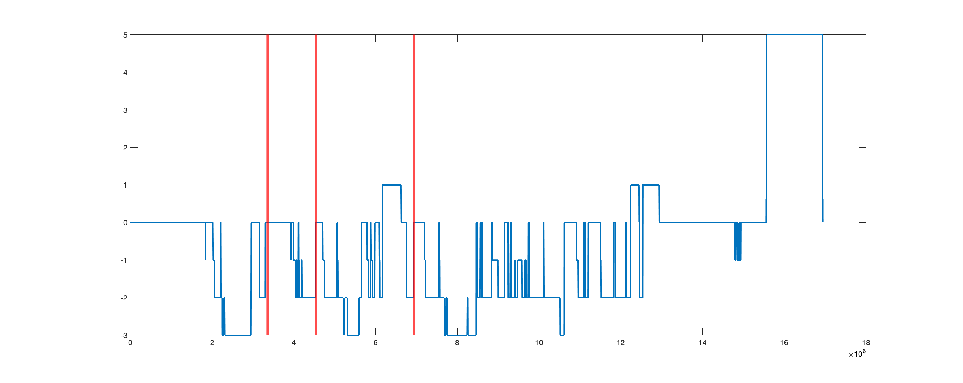

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2055/eeg/ses-2


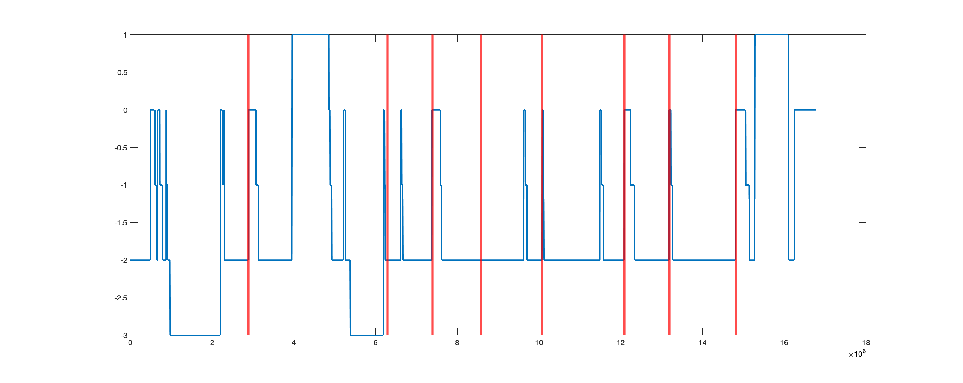

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2056/eeg/ses-1


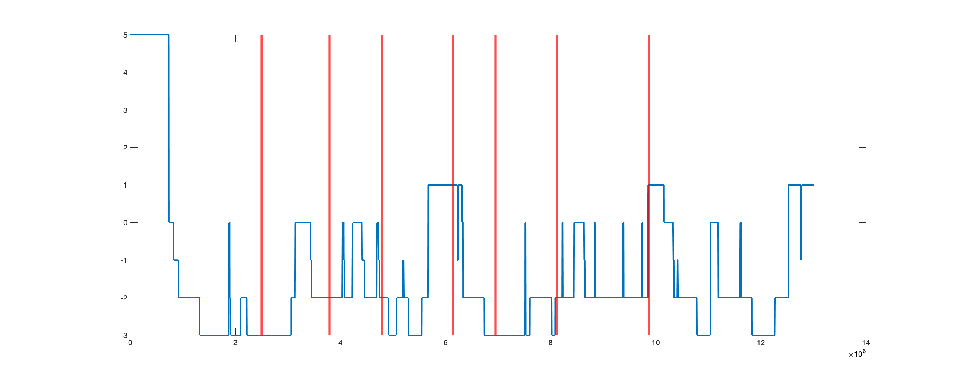

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2057/eeg/ses-1


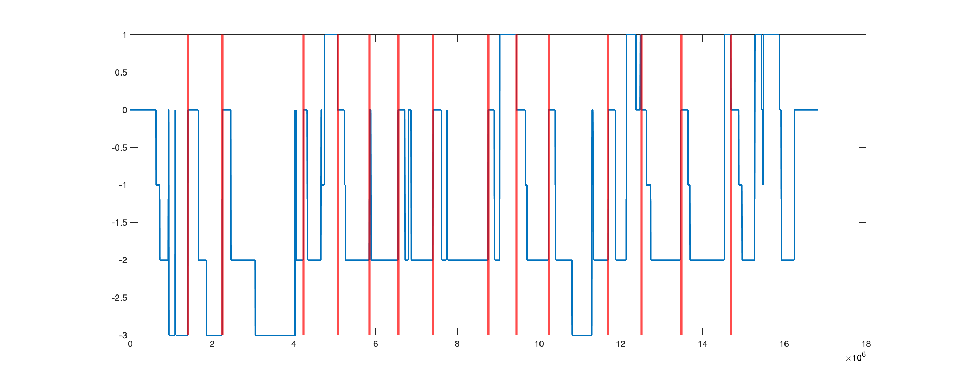

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2058/eeg/ses-1


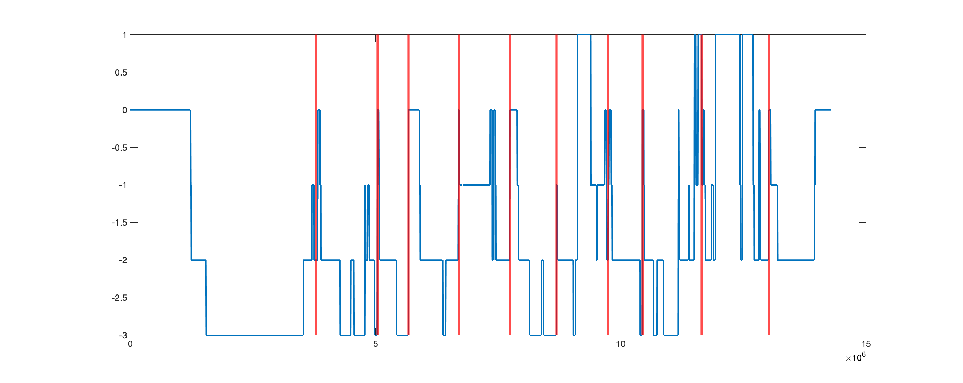

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2058/eeg/ses-2


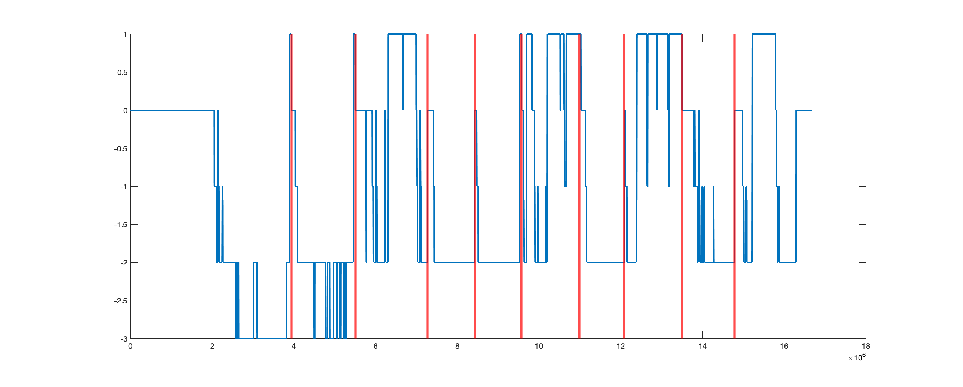

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2059/eeg/ses-1


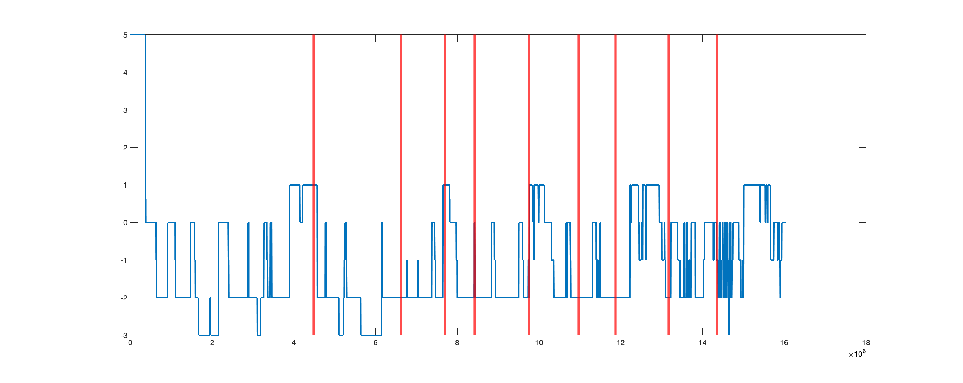

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2060/eeg/ses-1


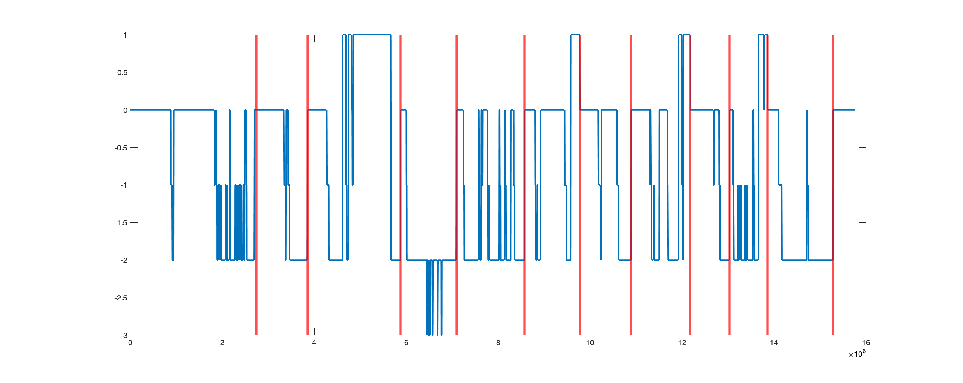

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2060/eeg/ses-2


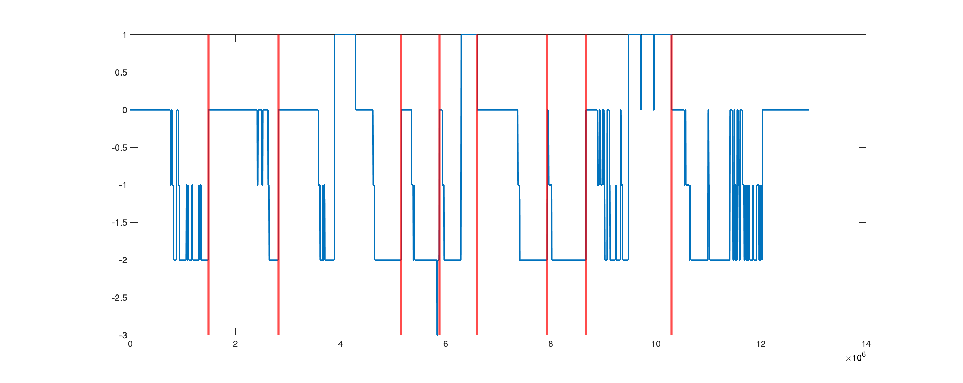

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2061/eeg/ses-1


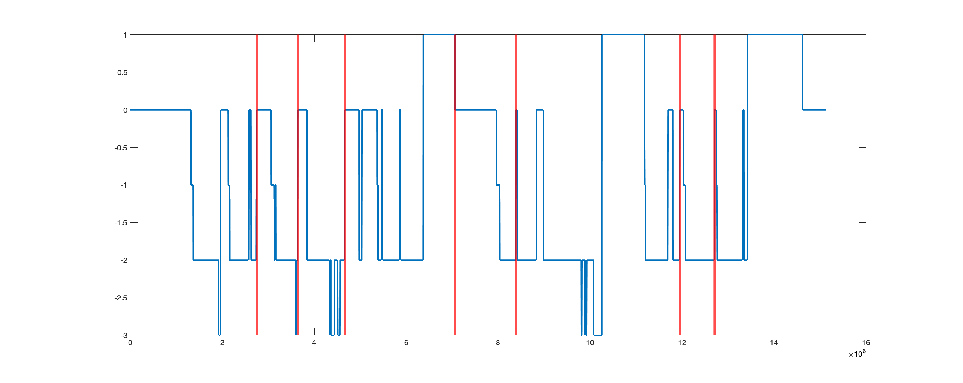

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2063/eeg/ses-1


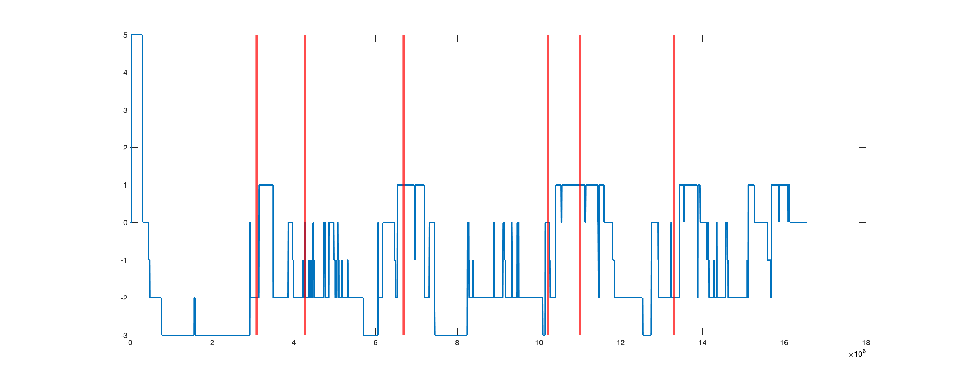

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2063/eeg/ses-2


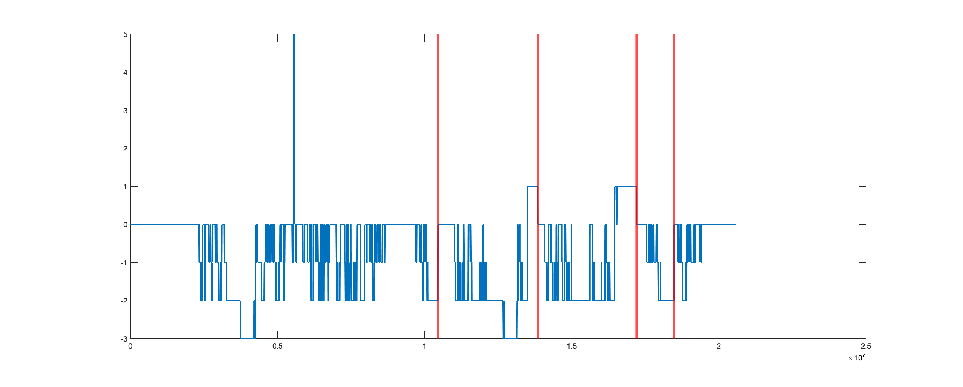

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2063/eeg/ses-3


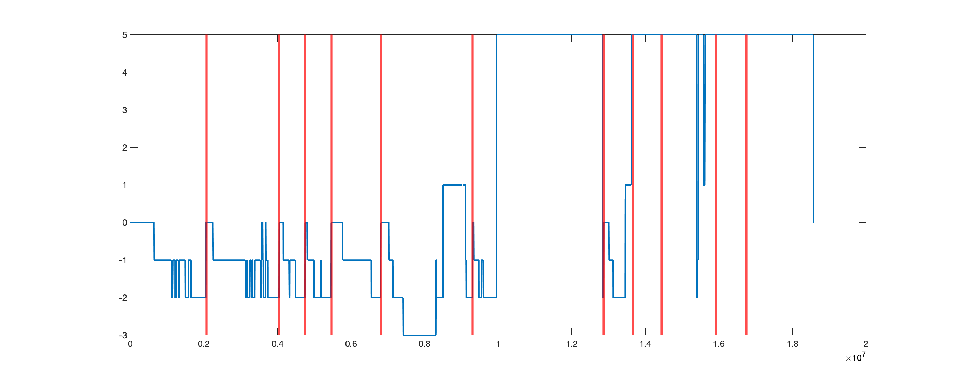

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2064/eeg/ses-2


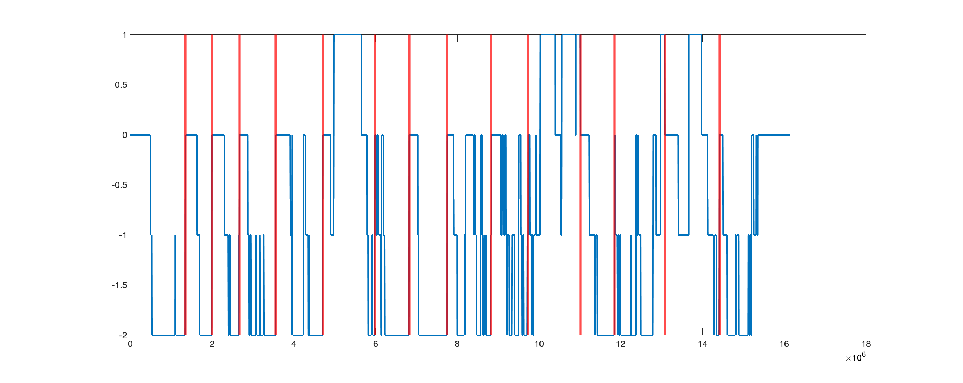

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2065/eeg/ses-3


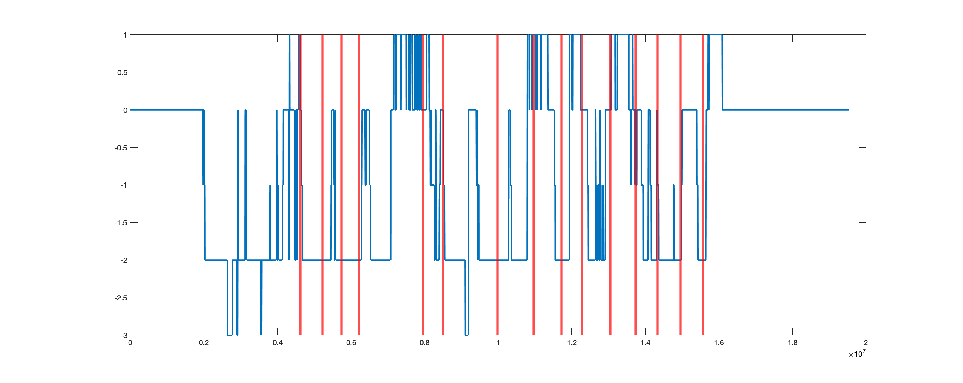

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2066/eeg/ses-3


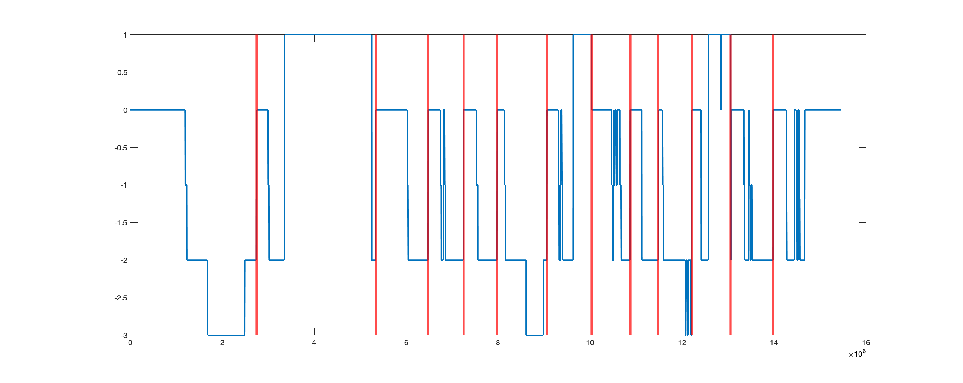

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2066/eeg/ses-1


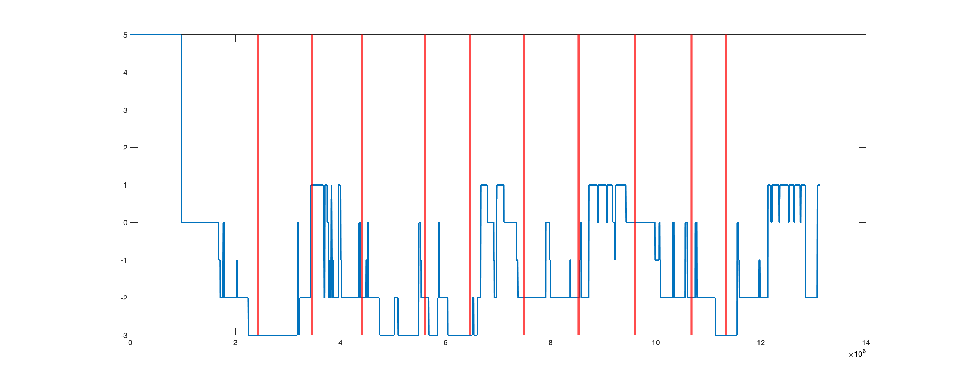

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2067/eeg/ses-2


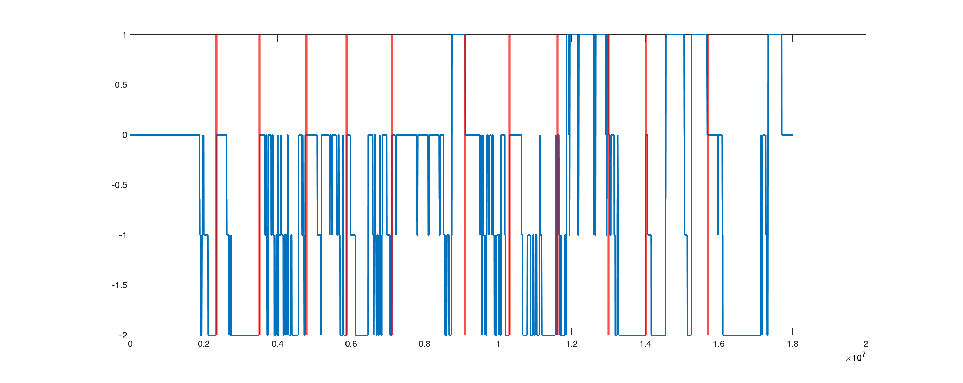

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2067/eeg/ses-1


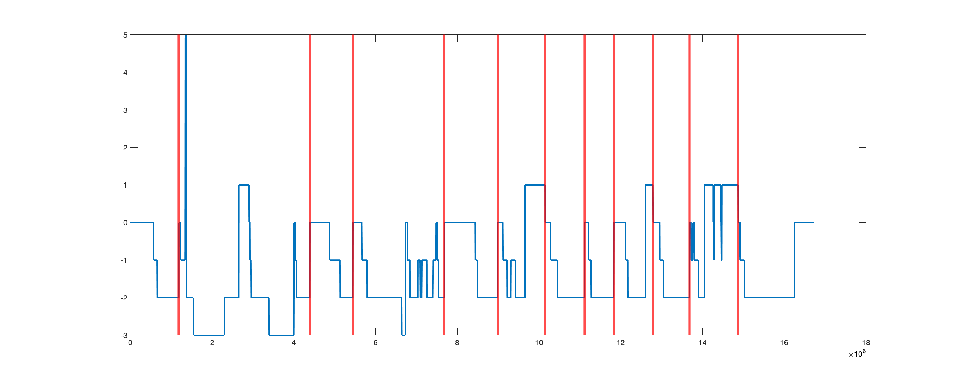

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2068/eeg/ses-2


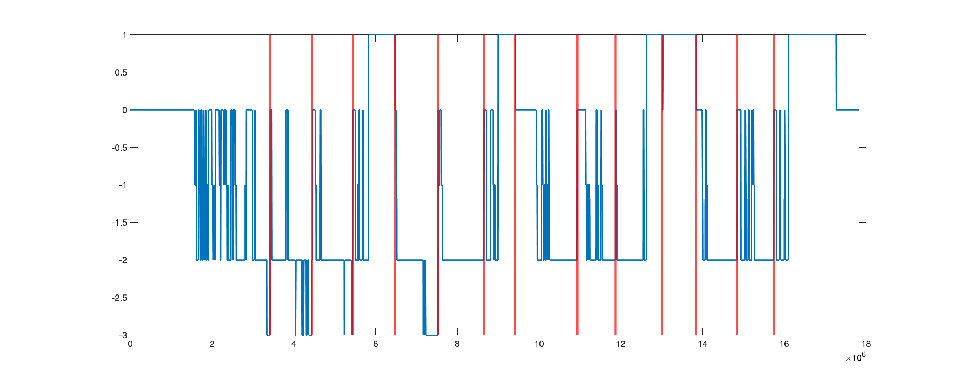

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2068/eeg/ses-1


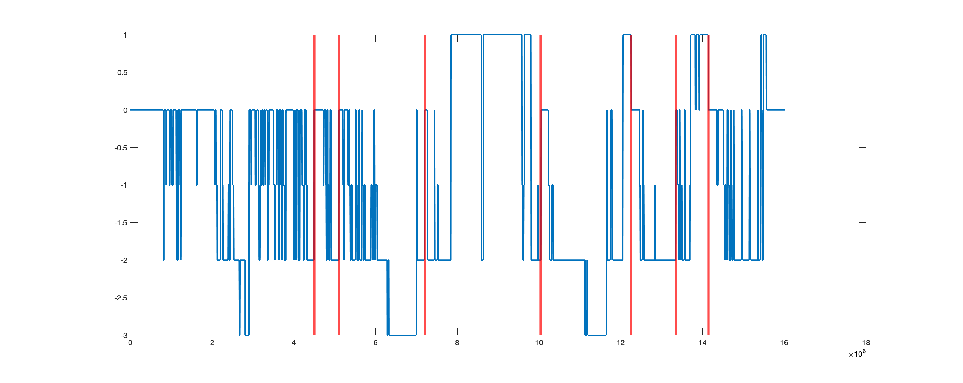

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2068/eeg/ses-3


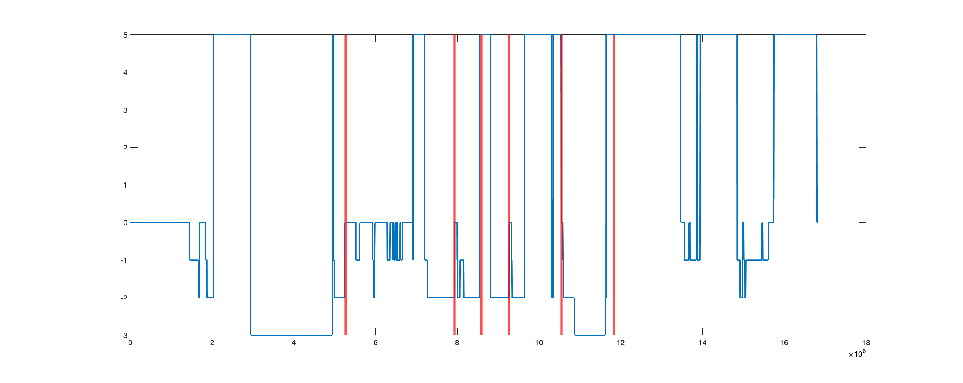

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2069/eeg/ses-2


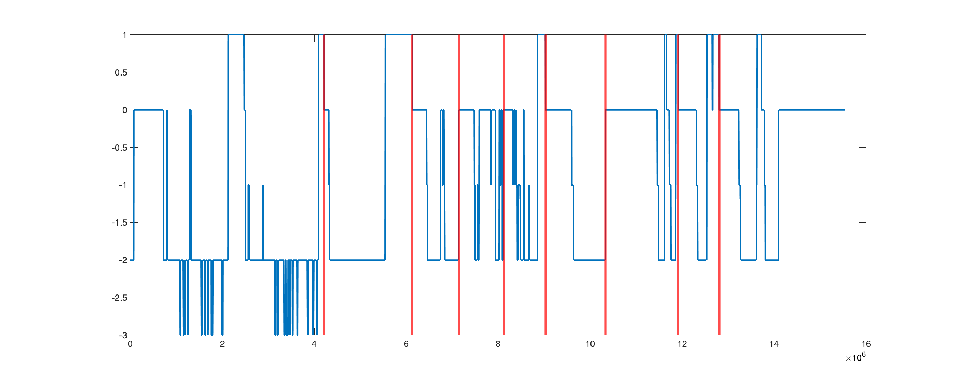

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2069/eeg/ses-1


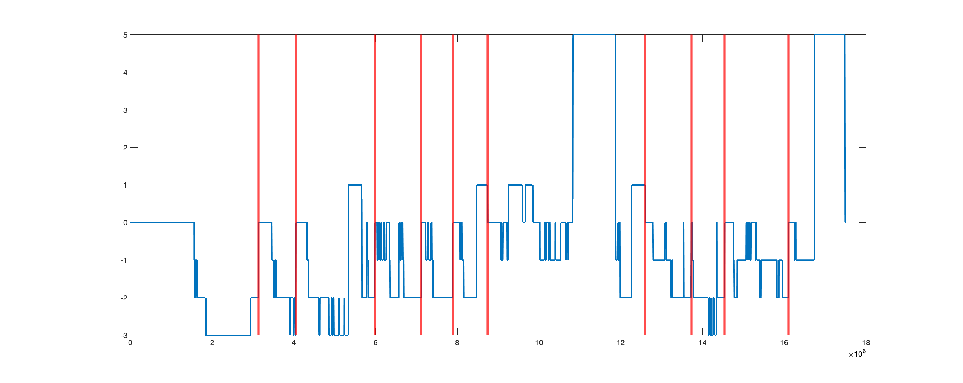

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2070/eeg/ses-1


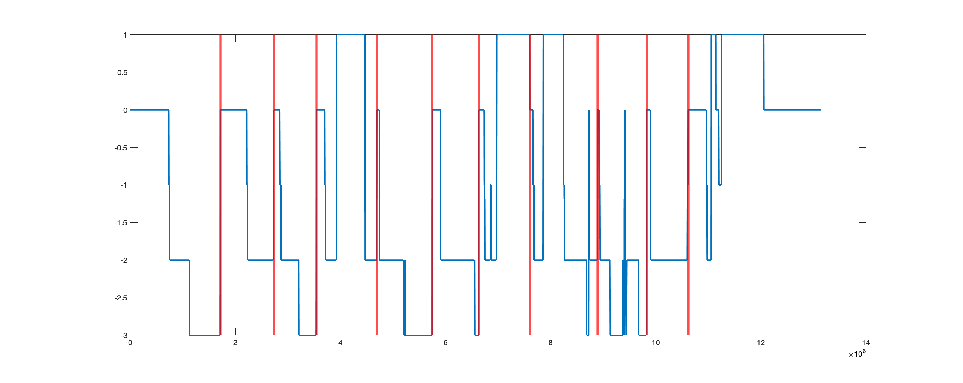

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2071/eeg/ses-2


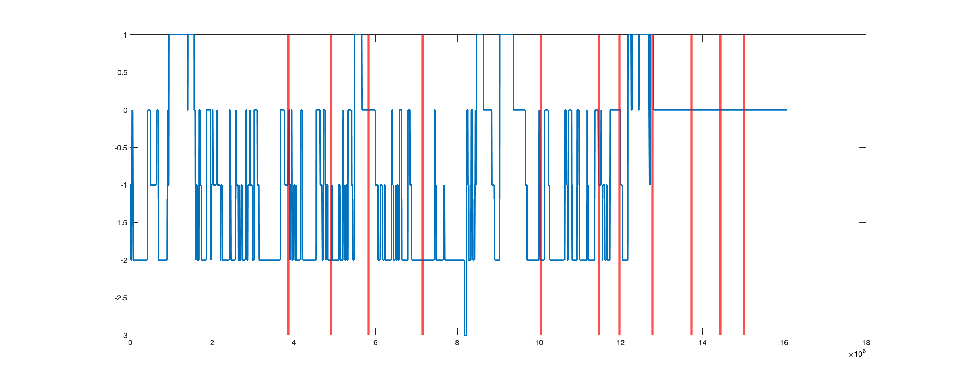

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2071/eeg/ses-1


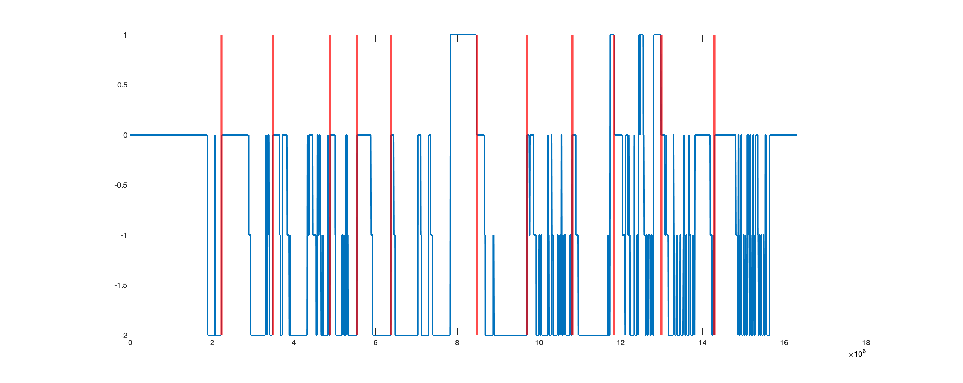

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2073/eeg/ses-1


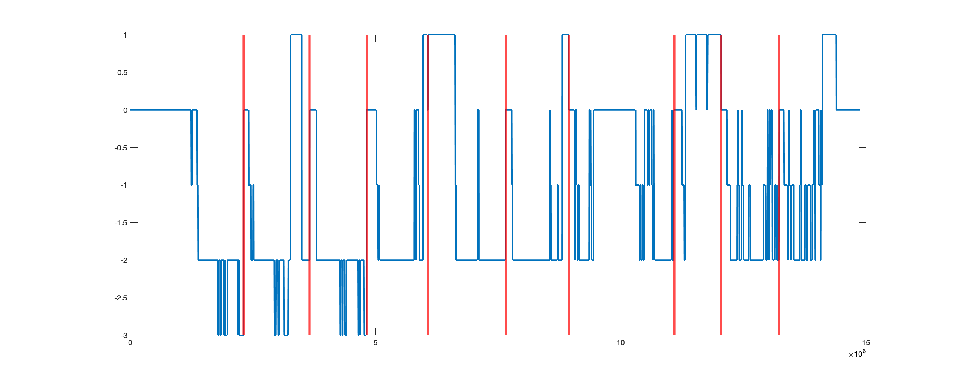

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2073/eeg/ses-2


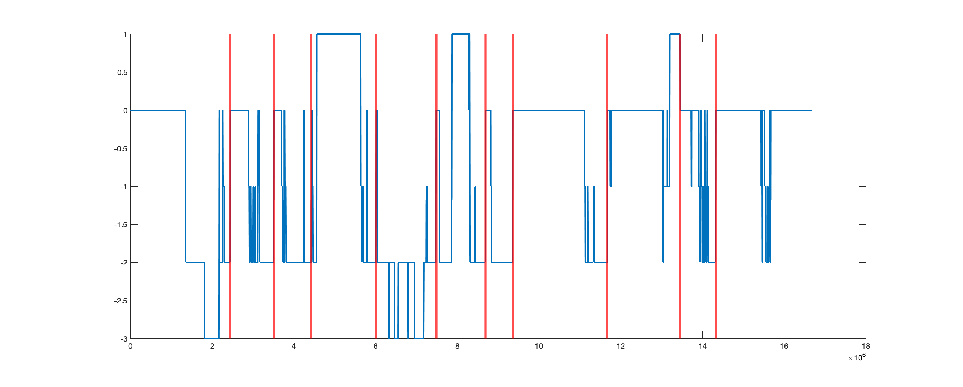

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2074/eeg/ses-1


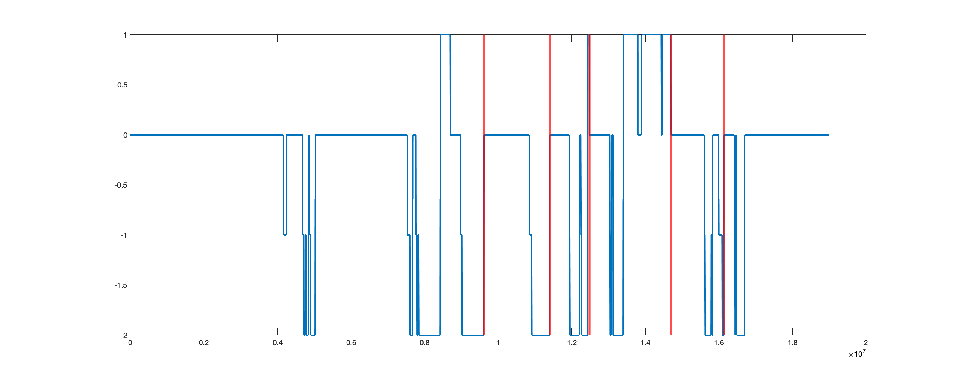

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2075/eeg/ses-1


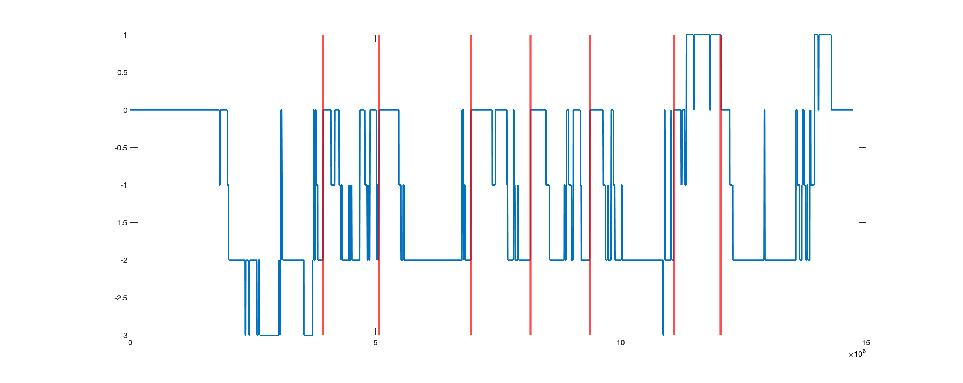

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2076/eeg/ses-1


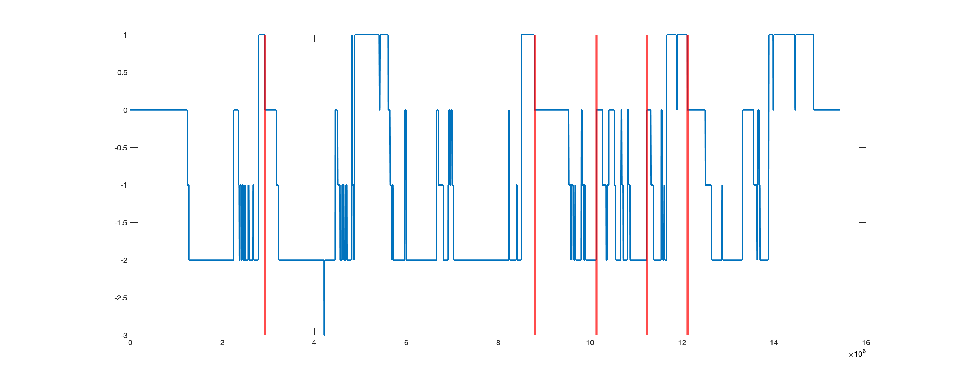

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2076/eeg/ses-3


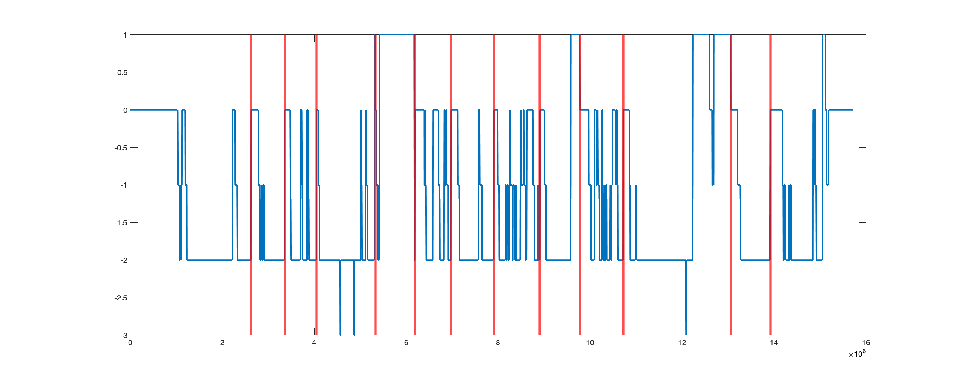

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2078/eeg/ses-2


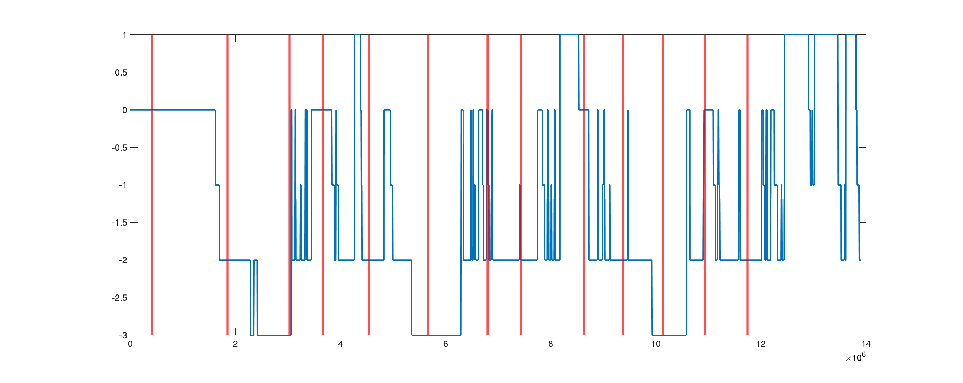

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2078/eeg/ses-1


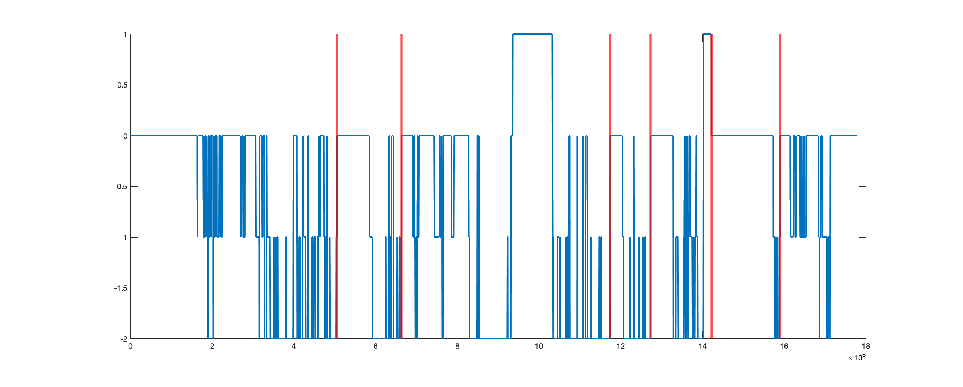

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2079/eeg/ses-3


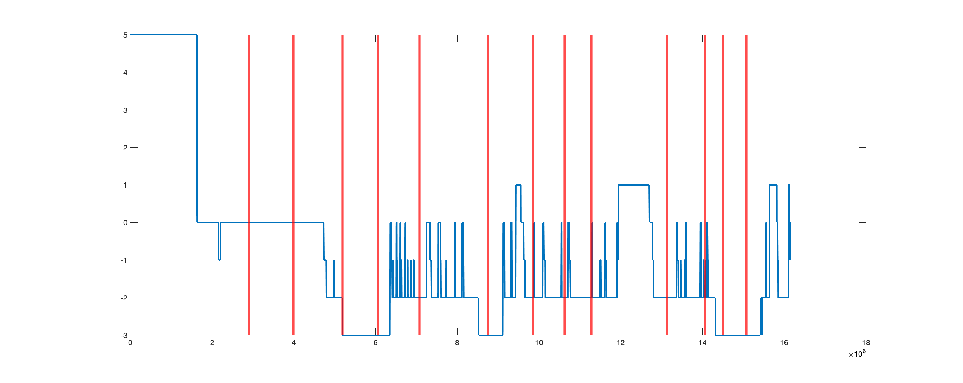

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2080/eeg/ses-1


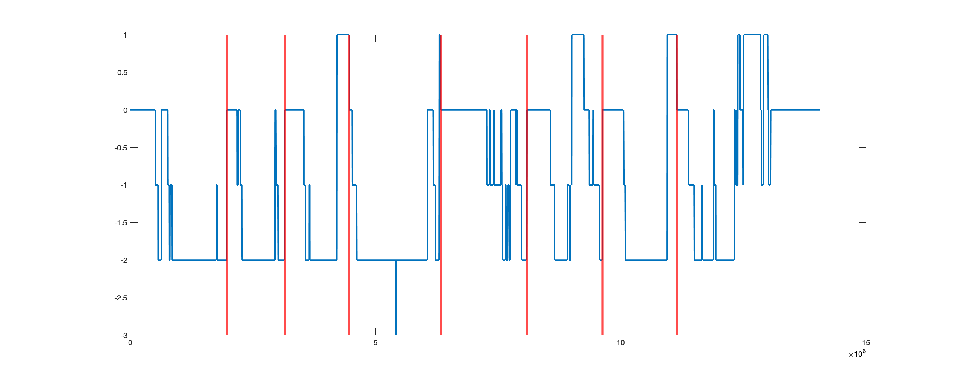

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2083/eeg/ses-1


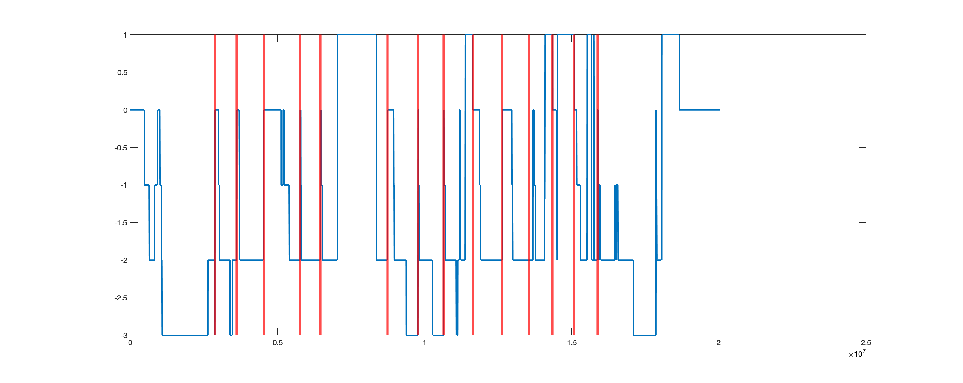

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2083/eeg/ses-2


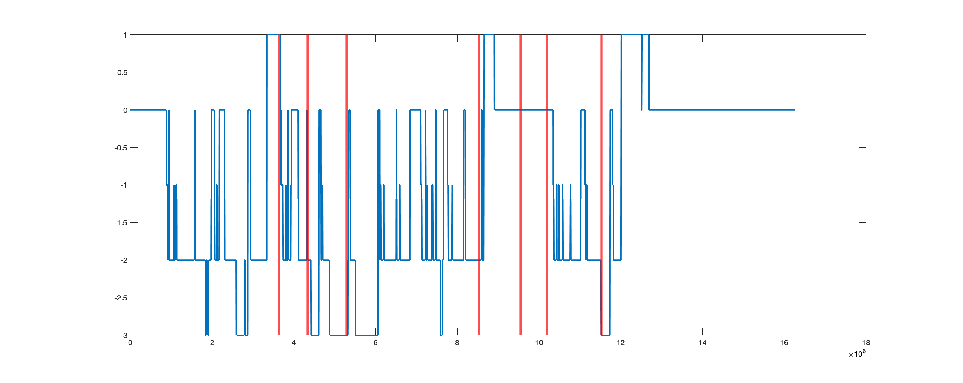

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2084/eeg/ses-1


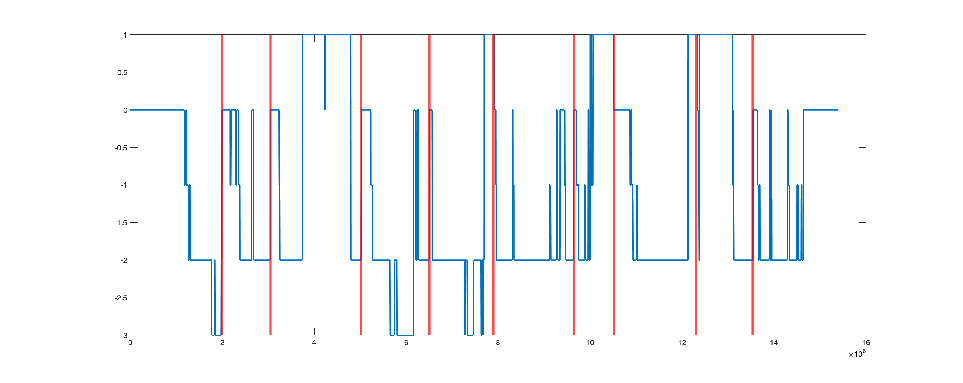

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2085/eeg/ses-1


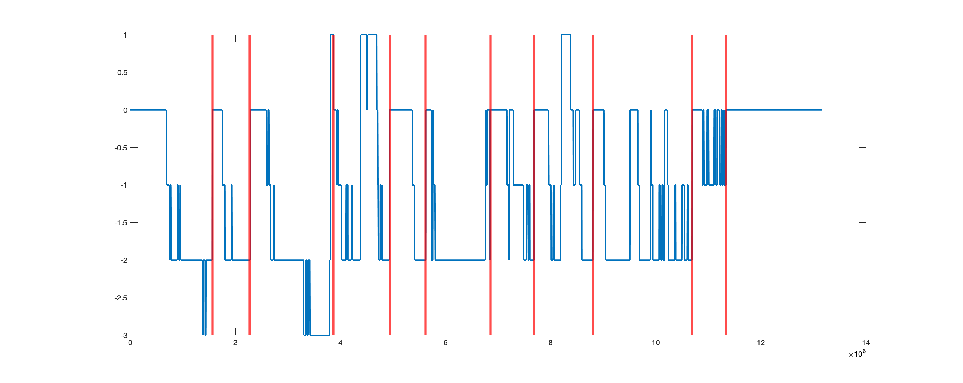

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2085/eeg/ses-2


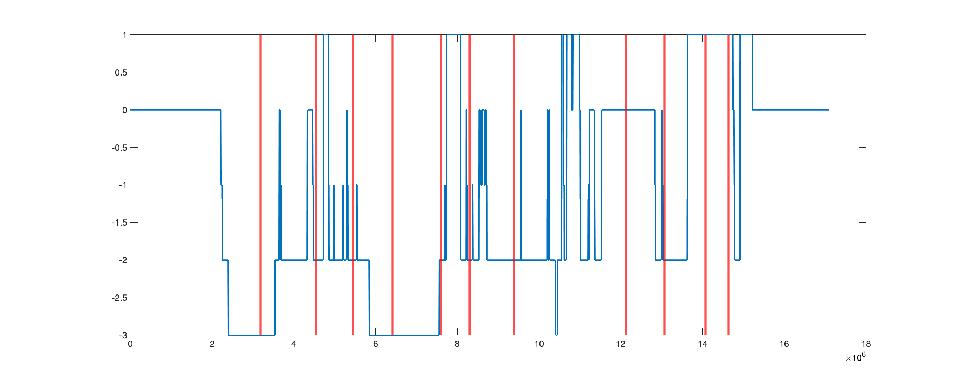

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2086/eeg/ses-3


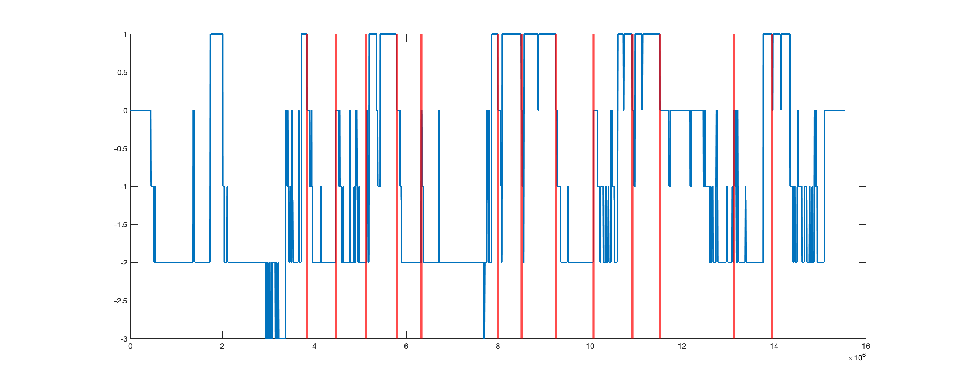

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2087/eeg/ses-1


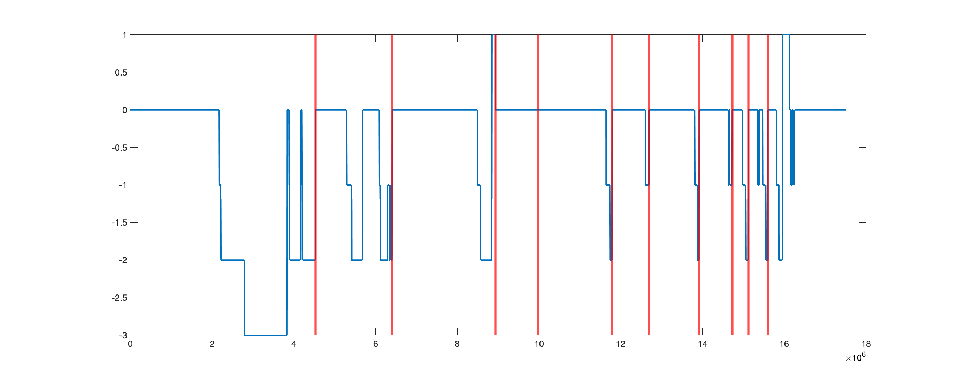

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2087/eeg/ses-3


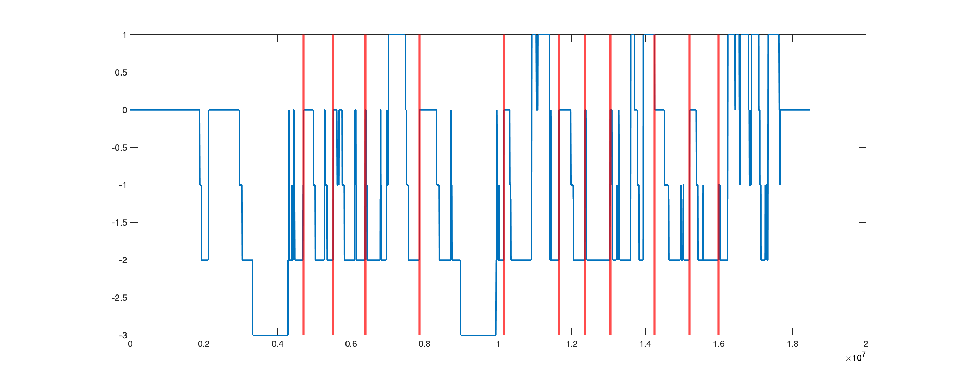

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2088/eeg/ses-3


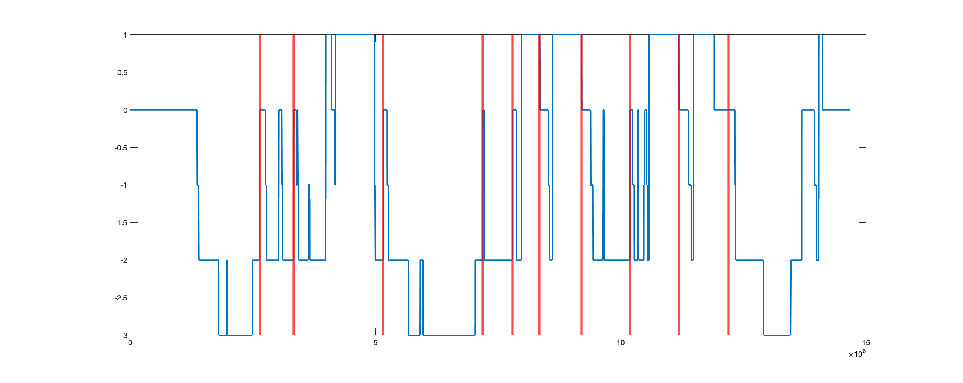

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2091/eeg/ses-1


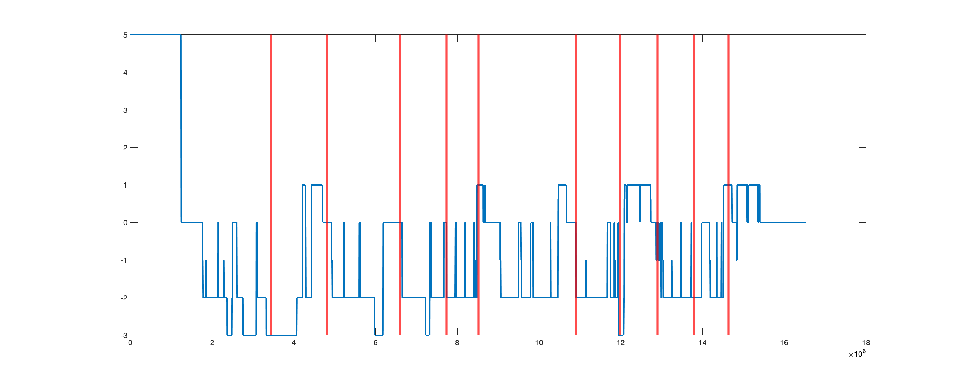

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2091/eeg/ses-3


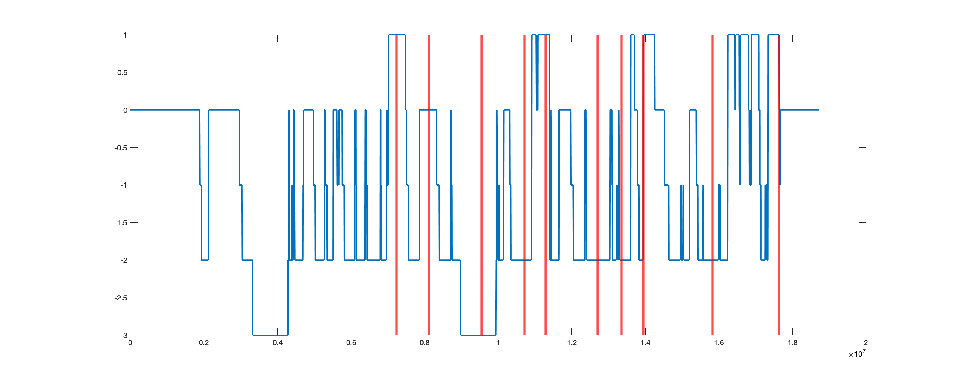

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2092/eeg/ses-3


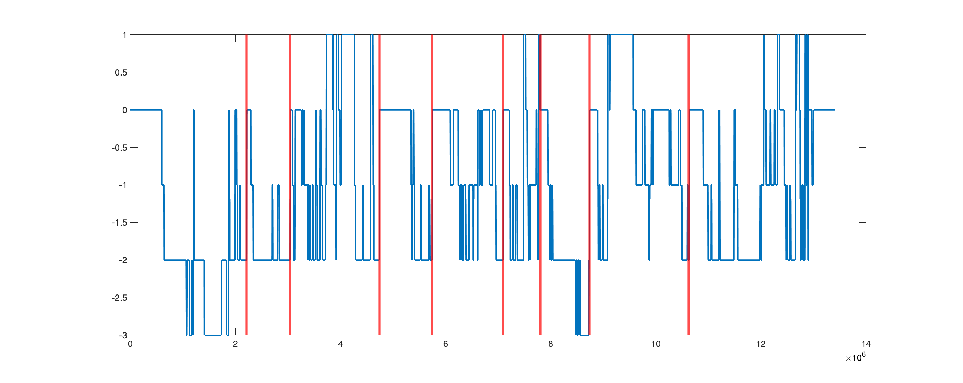

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2092/eeg/ses-1


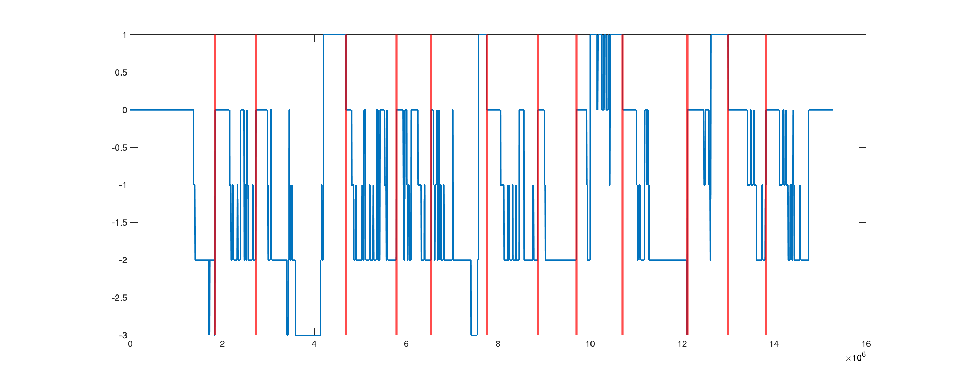

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2094/eeg/ses-1


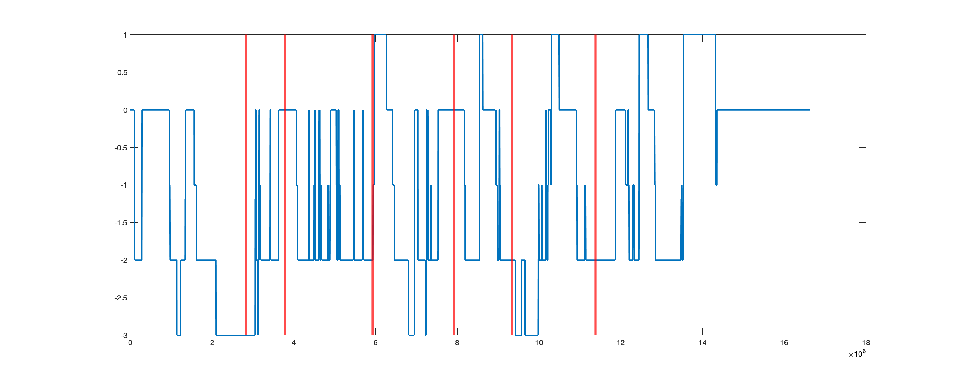

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2095/eeg/ses-1


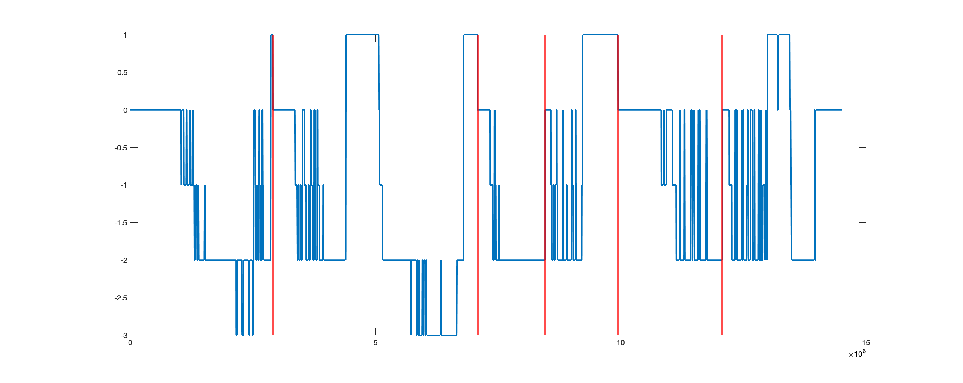

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2096/eeg/ses-1


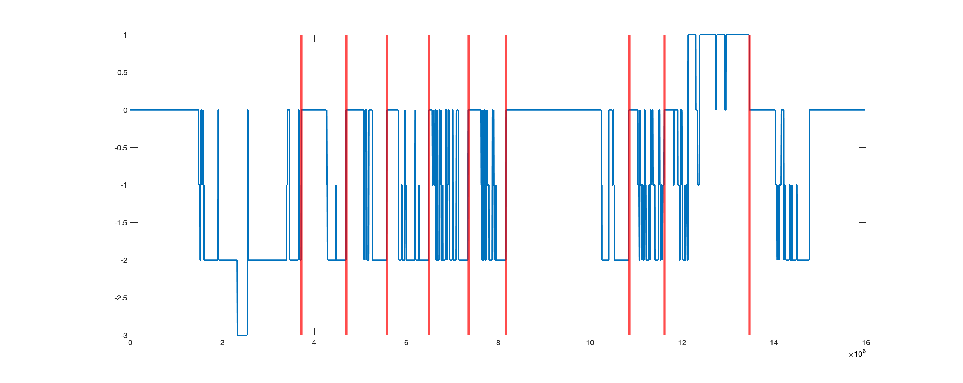

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2097/eeg/ses-1


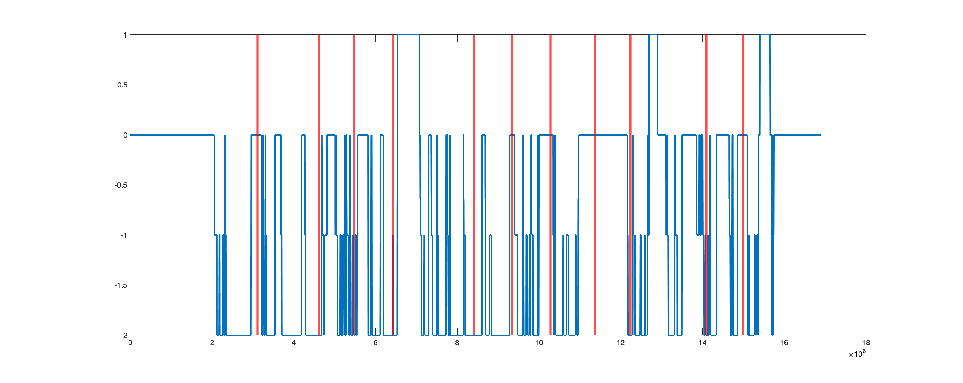

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2099/eeg/ses-3


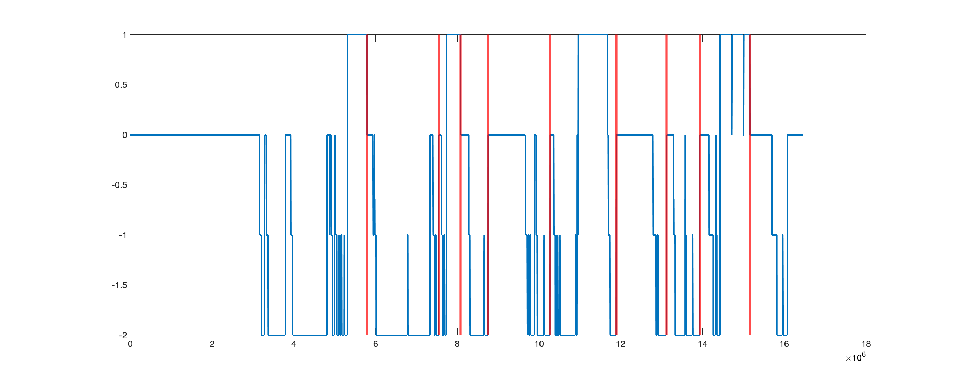

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2101/eeg/ses-3


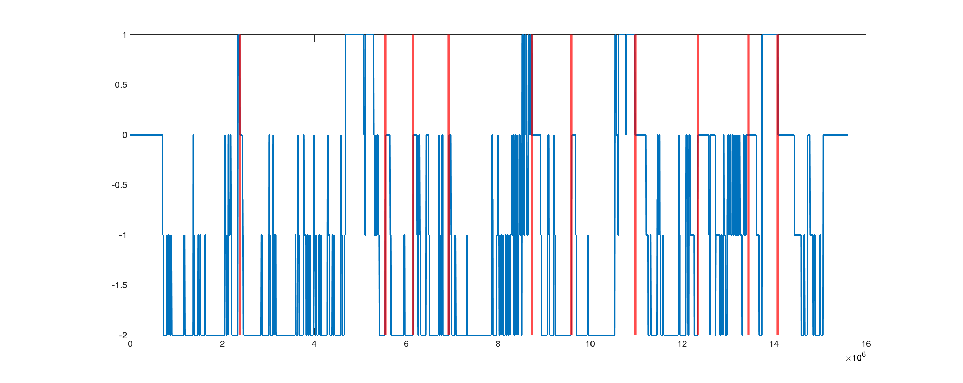

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2101/eeg/ses-1


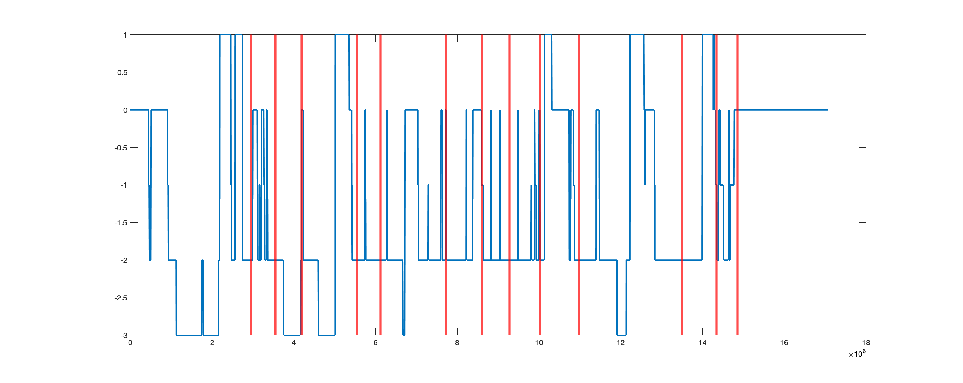

NO AWAKENINGS PLOT: /Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2102/eeg/ses-3
/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2103/eeg/ses-1


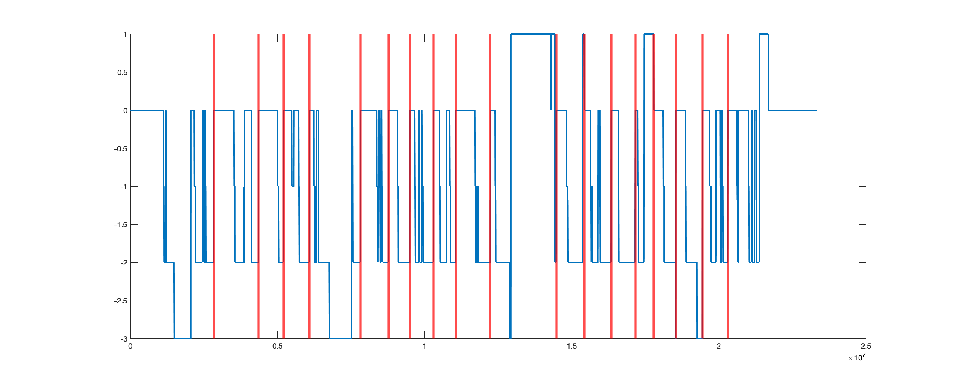

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2104/eeg/ses-1


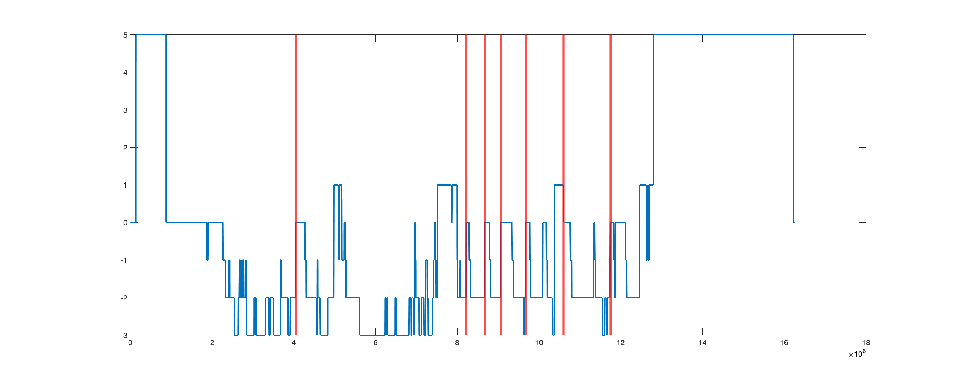

NO AWAKENINGS PLOT: /Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2105/eeg/ses-1
/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2106/eeg/ses-1


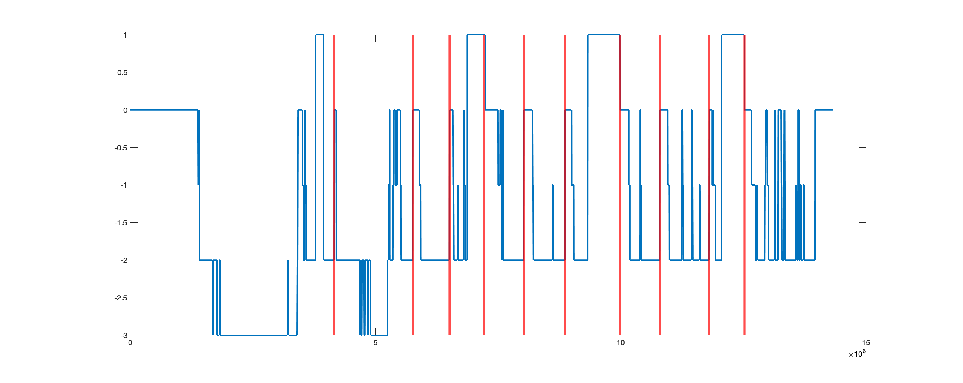

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2111/eeg/ses-3


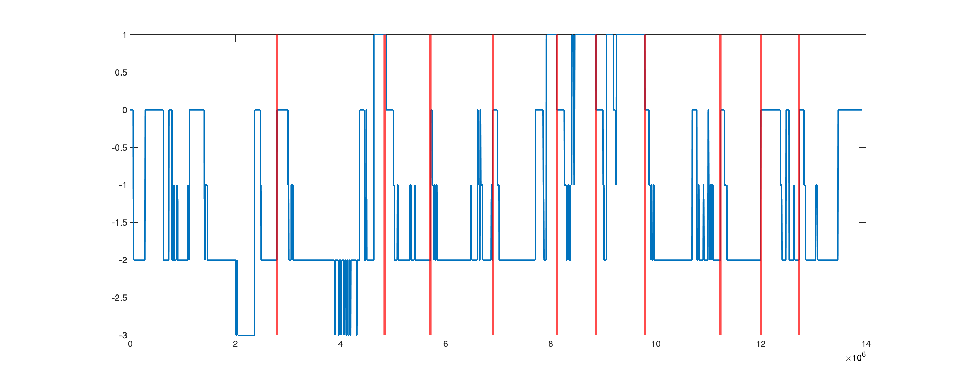

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2112/eeg/ses-1


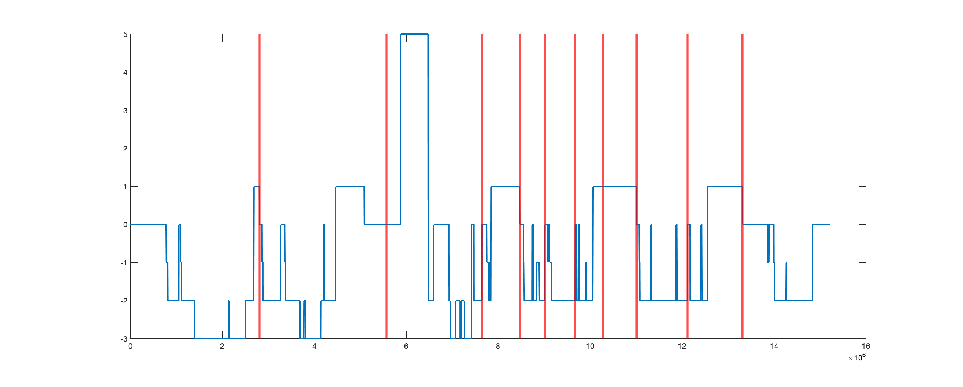

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2114/eeg/ses-1


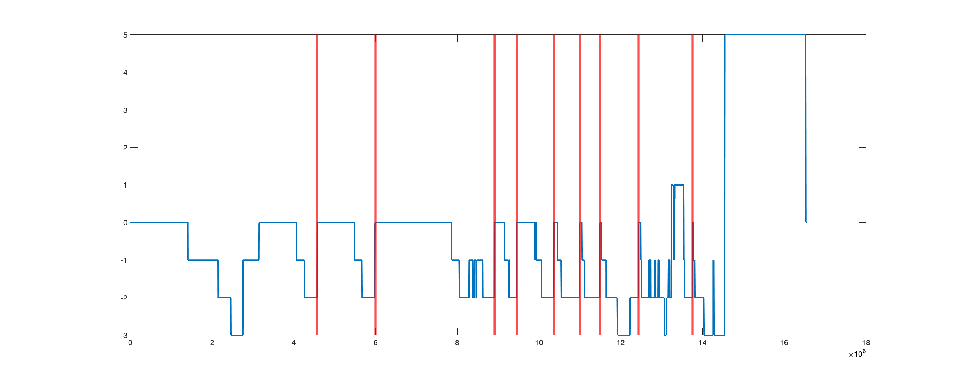

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2116/eeg/ses-1


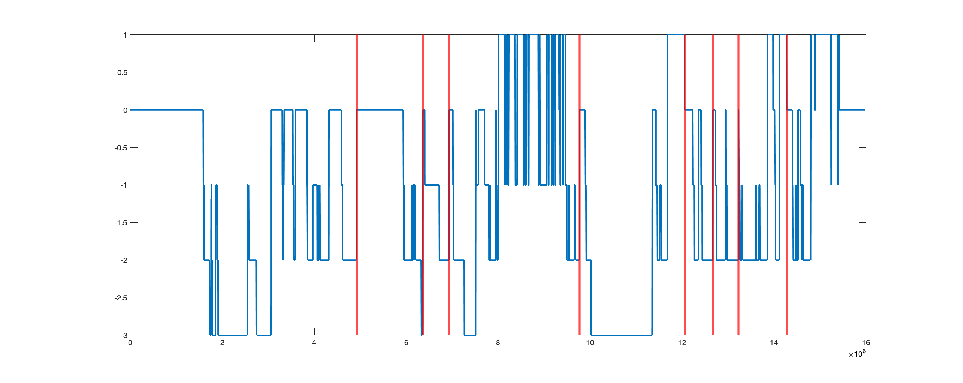

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2121/eeg/ses-1


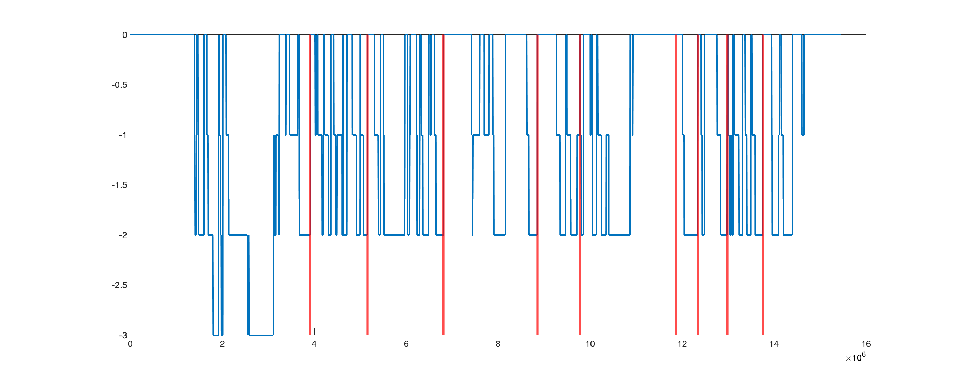

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2122/eeg/ses-1


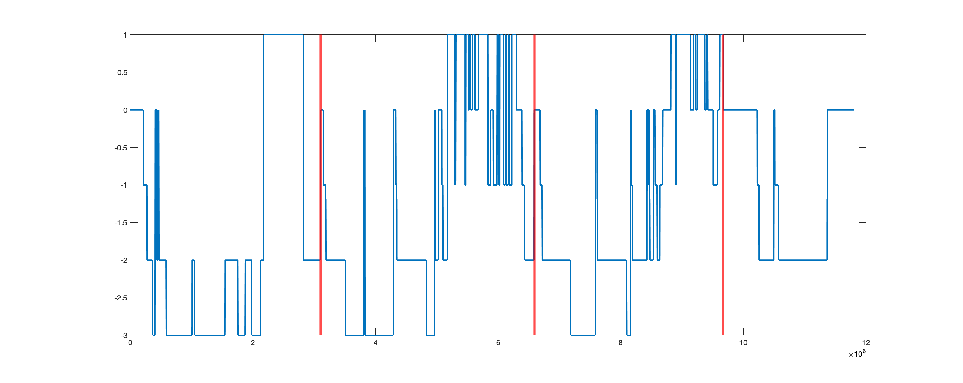

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2123/eeg/ses-1


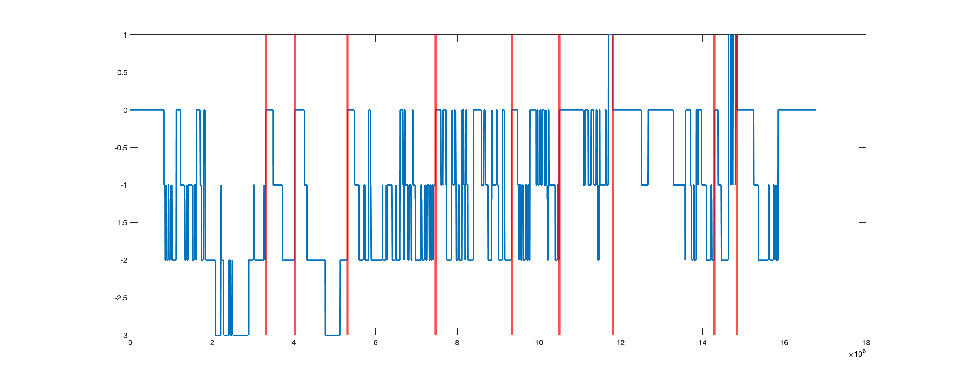

NO AWAKENINGS PLOT: /Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2123/eeg/ses-2
/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2126/eeg/ses-1


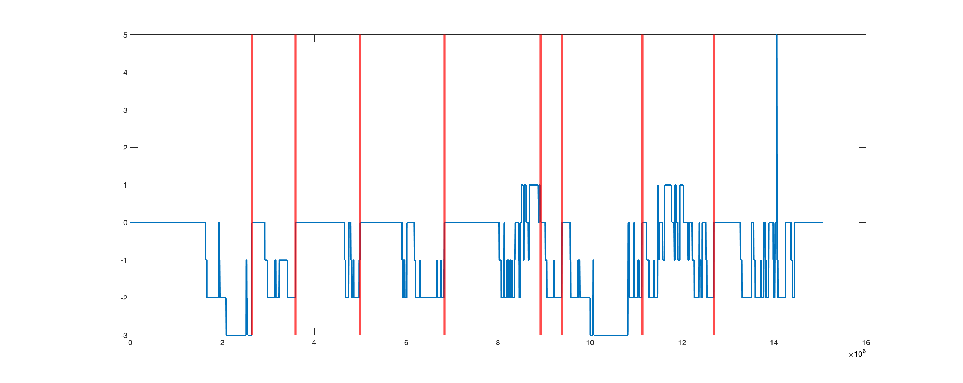

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2127/eeg/ses-2


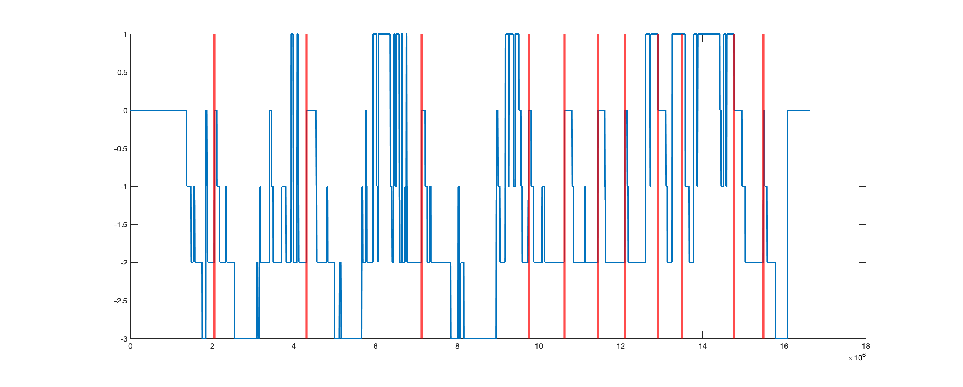

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2128/eeg/ses-1


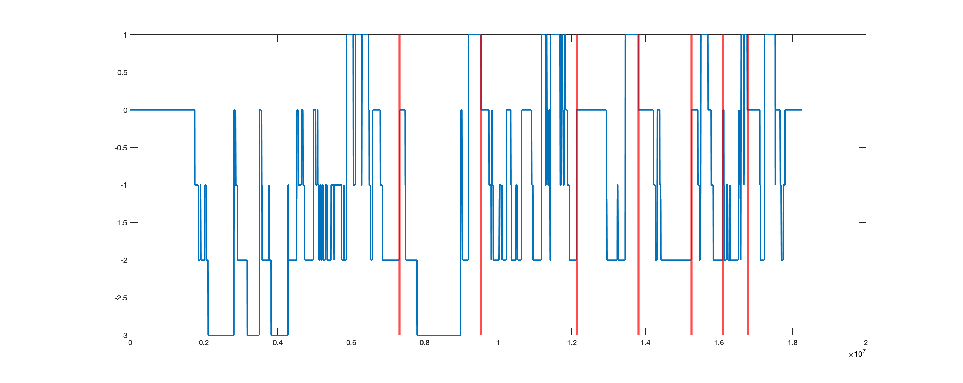

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2128/eeg/ses-2


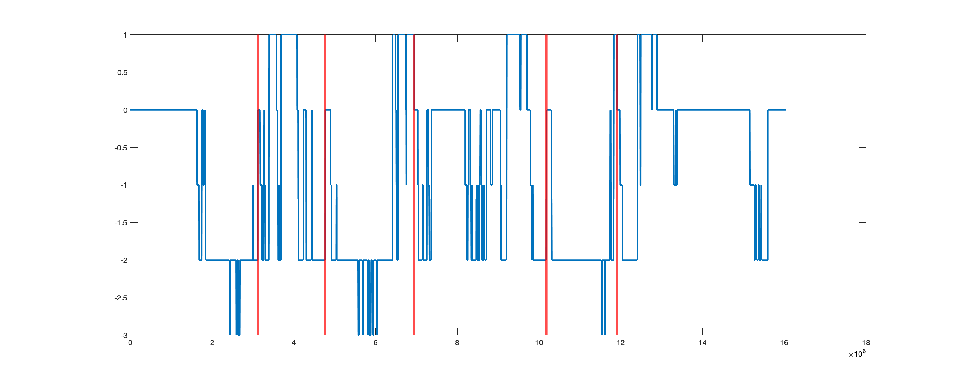

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2129/eeg/ses-1


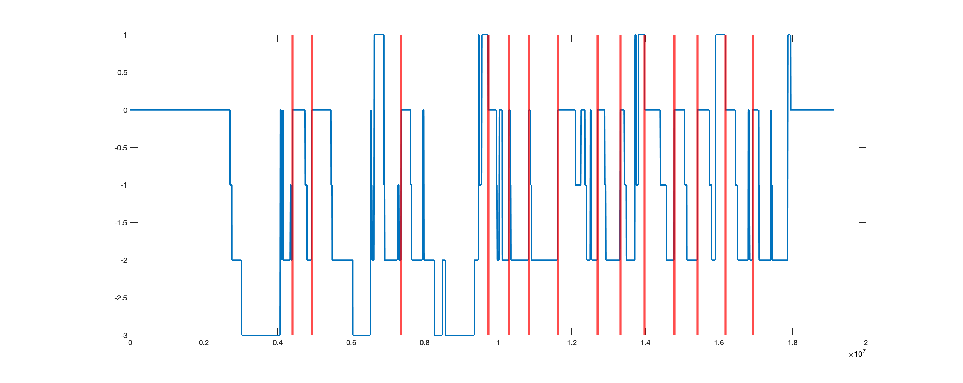

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2130/eeg/ses-1


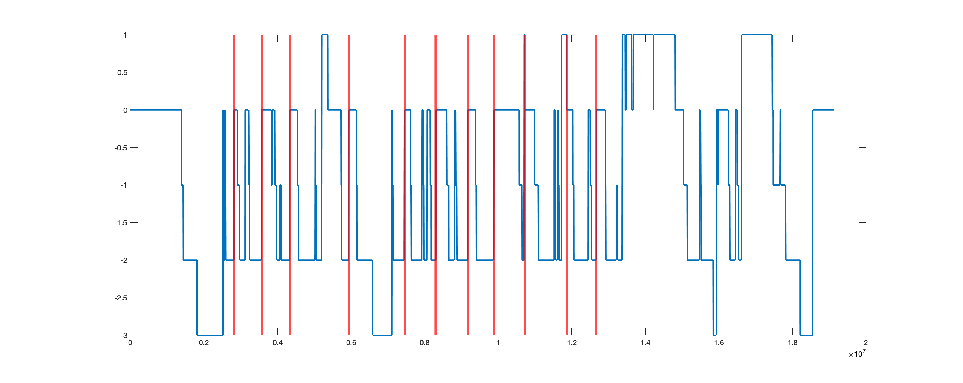

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2131/eeg/ses-1


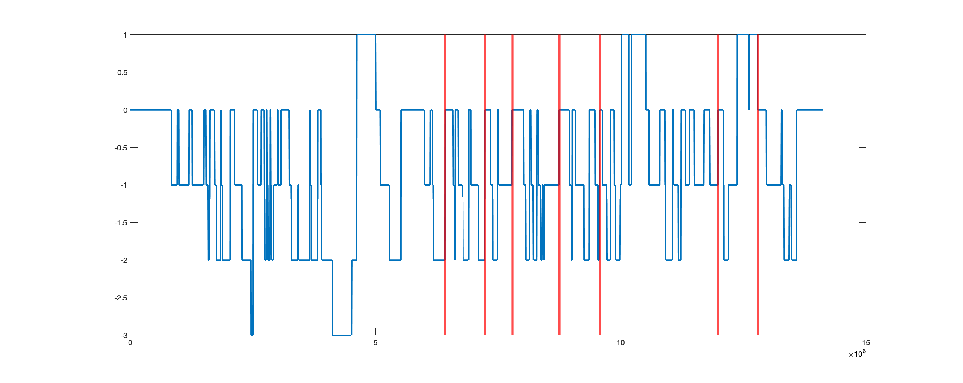

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2133/eeg/ses-2


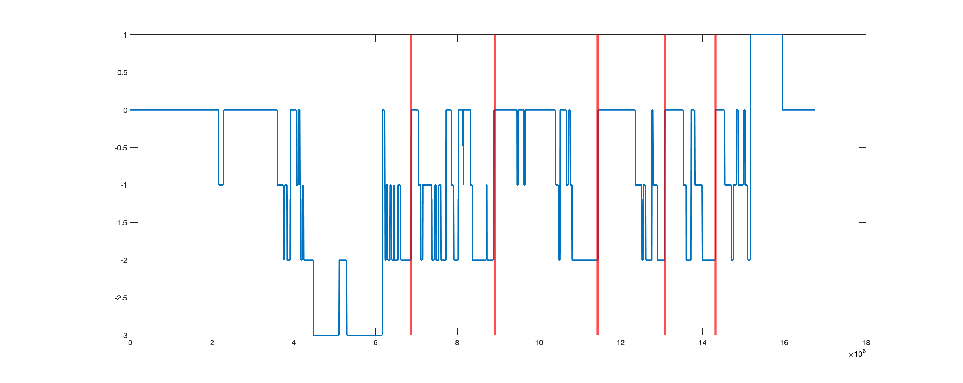

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2133/eeg/ses-3


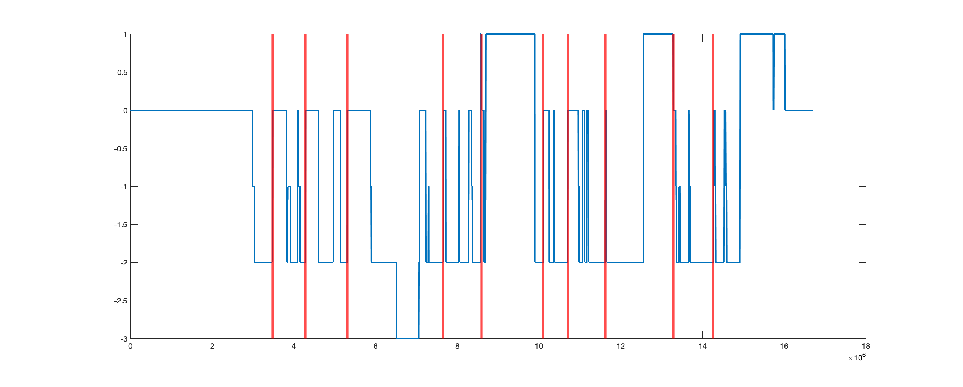

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2134/eeg/ses-1


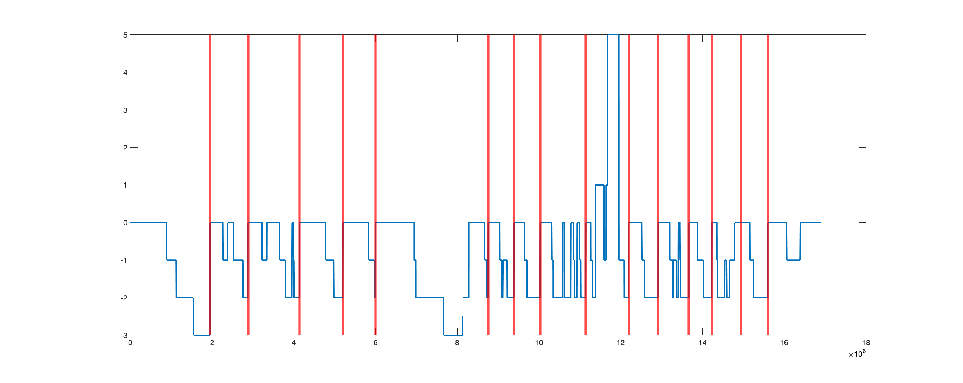

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2134/eeg/ses-2


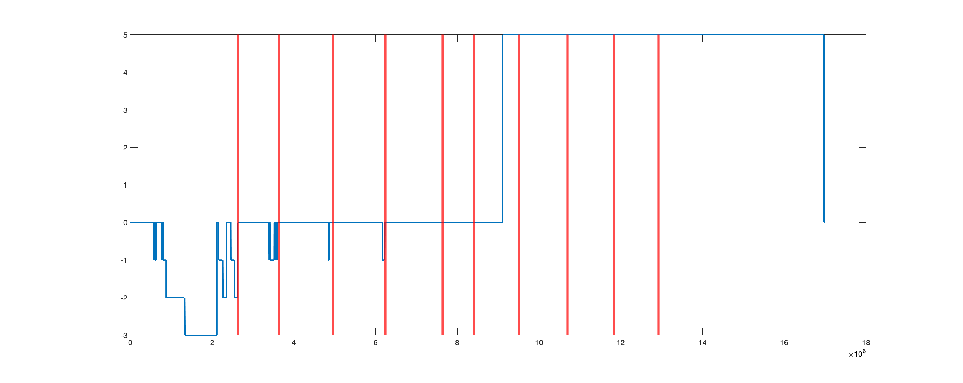

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2134/eeg/ses-3


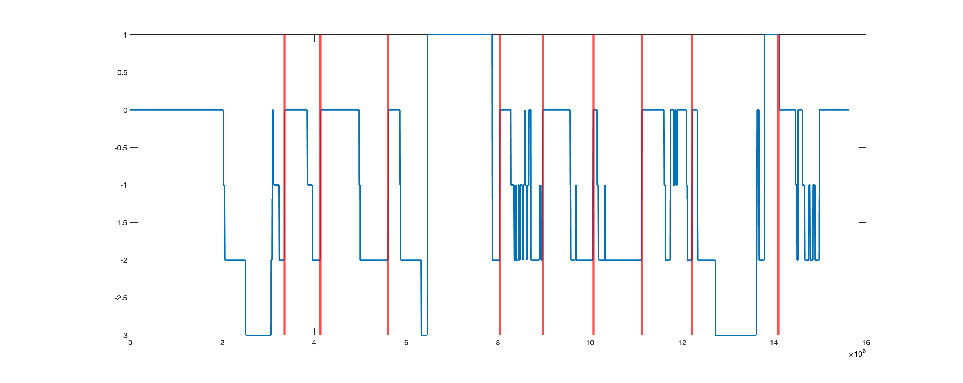

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2140/eeg/ses-1


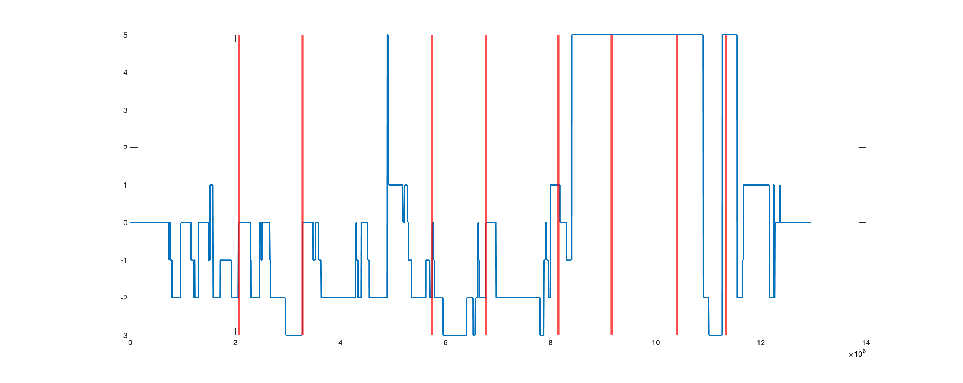

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2140/eeg/ses-3


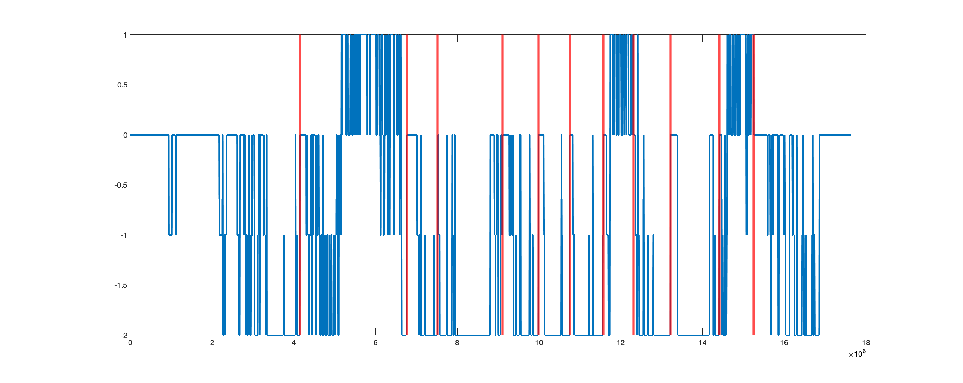

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2142/eeg/ses-3


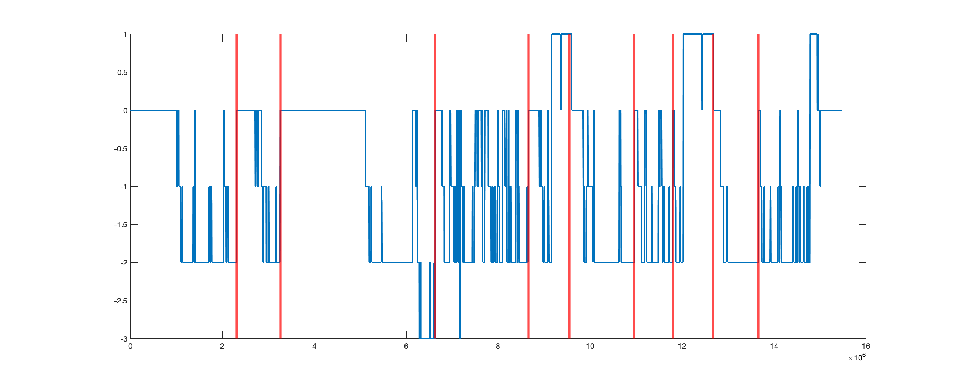

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2142/eeg/ses-1


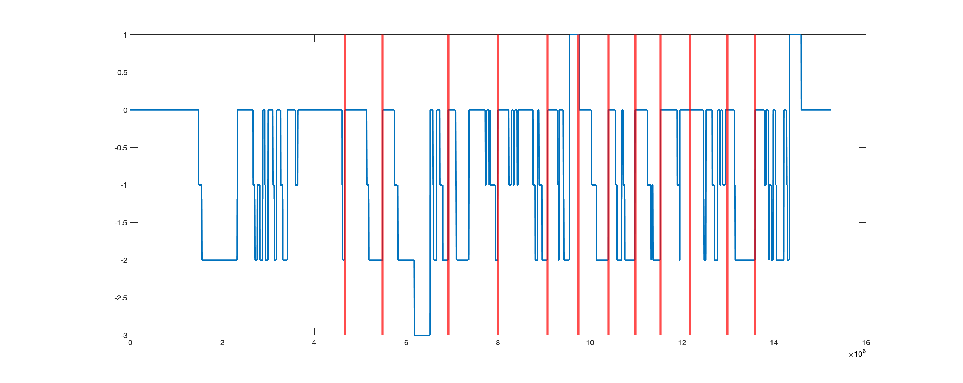

NO AWAKENINGS PLOT: /Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2144/eeg/ses-2
/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2144/eeg/ses-1


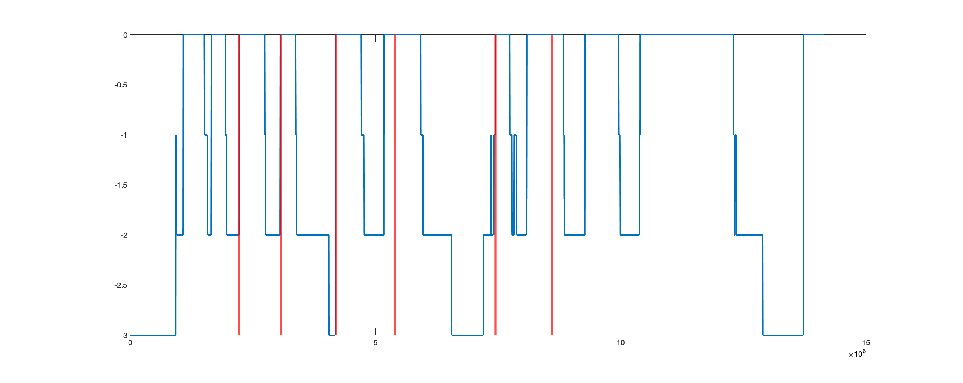

Sessions with awakenings file: 147


In [418]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images_with_awakenings_file = 0
for i in range(0,len(sesdirs)):
    if os.path.exists(sesdirs[i] + '/all_awakenings.png'):
        print(sesdirs[i])
        fig, ax = plt.subplots()
        fig.set_size_inches(17,17)
        fig.patch.set_visible(False)
        ax.axis('off')
        img = mpimg.imread(sesdirs[i] + '/all_awakenings.png')
        imgplot = plt.imshow(img)
        plt.show()
        images_with_awakenings_file = images_with_awakenings_file + 1
    else:
        print("NO AWAKENINGS PLOT: " + sesdirs[i])
print("Sessions with awakenings file: " + str(images_with_awakenings_file))

In [3]:
bad_match = ['2011_T1', '2013_T3', '2014_T2', '2059_T1', '2063_T1', '2065_T3', '2101_T1','2102_T2',
             '2012_T2', '2014_T3' , '2016_T3' , '2019_T2' , '2026_T3' , '2027_T3' , '2027_T1' , 
             '2030_T3' , '2030_T2' , '2030_T3' , '2038_T1' , '2041_T1' , '2042_T1' , '2046_T1' , 
             '2047_T1' , '2047_T2' , '2051_T1' , '2051_T2' , '2056_T1' , '2066_T1' , '2071_T2' , 
             '2078_T2' , '2079_T3' , '2085_T2' , '2091_T3' , '2094_T1' , 
             '2091_T1' , '2097_T1'];
bad_match.sort()
bad_match

['2011_T1',
 '2012_T2',
 '2013_T3',
 '2014_T2',
 '2014_T3',
 '2016_T3',
 '2019_T2',
 '2026_T3',
 '2027_T1',
 '2027_T3',
 '2030_T2',
 '2030_T3',
 '2030_T3',
 '2038_T1',
 '2041_T1',
 '2042_T1',
 '2046_T1',
 '2047_T1',
 '2047_T2',
 '2051_T1',
 '2051_T2',
 '2056_T1',
 '2059_T1',
 '2063_T1',
 '2065_T3',
 '2066_T1',
 '2071_T2',
 '2078_T2',
 '2079_T3',
 '2085_T2',
 '2091_T1',
 '2091_T3',
 '2094_T1',
 '2097_T1',
 '2101_T1',
 '2102_T2']

### What awakenings aren't found? (ie., awakening table is likely incorrect)

In [592]:
for i in range(0,len(nrem_awakenings)):
    if nrem_awakenings[i] not in nrem_dataframe["PATH"].values:
        print(nrem_awakenings[i])

/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2042/eeg/ses-1/awakening-6-cleaned2_nrem.set
/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2042/eeg/ses-3/awakening-6-cleaned2_nrem.set
/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2042/eeg/ses-3/awakening-1-cleaned2_nrem.set
/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2042/eeg/ses-3/awakening-7-cleaned2_nrem.set
/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2042/eeg/ses-3/awakening-9-cleaned2_nrem.set
/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2042/eeg/ses-3/awakening-2-cleaned2_n

2042_T3 is not in FINALS folder any longer

In [621]:
nrem_dataframe = pd.read_csv('nrem_dataframe.csv')

# remove held out data
# nrem_dataframe = nrem_dataframe[nrem_dataframe["HOLD_OUT"] == False].copy()
# nrem_dataframe = nrem_dataframe.reset_index(drop=True)
# nrem_dataframe

In [622]:
for x in range(0,len(nrem_dataframe)):
    if nrem_dataframe.loc[x,"ENTRY_MATCHED_AWAKENING_NO"] != nrem_dataframe.loc[x,"SA"]:
        print(str(nrem_dataframe.loc[x,"ID"]) + " " + str(nrem_dataframe.loc[x,"Visit"]))

2003 3
2003 3
2003 3
2003 3
2003 3
2027 1
2027 1
2027 1
2027 1
2027 1
2037 1
2037 1
2037 1
2048 2
2048 2
2048 2
2055 2
2055 2
2055 2
2055 2
2055 2
2055 2
2055 2
2071 1
2071 1
2071 1
2091 3
2127 2
2127 2
2127 2
2127 2
2127 2
2127 2
2127 2
2131 1
2131 1
2131 1


2003_T3 ; 2037_T1 ; 2055_T2 ; 2071_T1 ; 2091_T3 ; 2127_T2 ; 2131_T1  OKAY

In [623]:
print(nrem_dataframe[(nrem_dataframe["ID"] == 2027) & (nrem_dataframe["Visit"] == 1)])

       ID  Visit  SA         Date_Time  Date      Time  Stage  \
159  2027      1   3  12/10/0014 01:16   NaN   1:16 AM    2.0   
160  2027      1   6  12/10/0014 03:08   NaN   3:08 AM    2.0   
161  2027      1   4  12/10/0014 01:37   NaN   1:37 AM    2.0   
162  2027      1   9  12/10/0014 05:27   NaN   5:27 AM    2.0   
163  2027      1   2  12/10/0014 00:54   NaN  12:54 AM    2.0   

     Q1ExperienceNum Q1Experience  \
159              2.0    Something   
160              3.0       Report   
161              2.0    Something   
162              3.0       Report   
163              2.0    Something   

                                              Q1Report  ...  \
159                                                NaN  ...   
160  I was on a roller coaster going up a hill, get...  ...   
161                                                NaN  ...   
162  I was falling asleep in my dream. I was at a c...  ...   
163                                                NaN  ...   

     MF

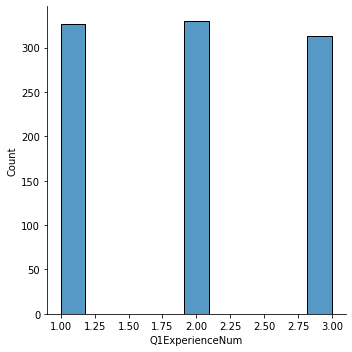

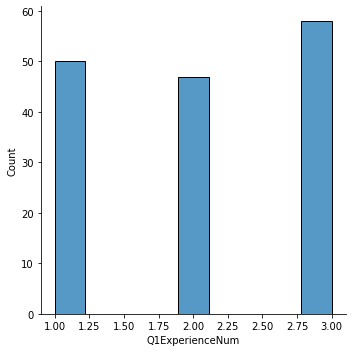

In [715]:
import seaborn as sns

ax = sns.displot(nrem_dataframe["Q1ExperienceNum"],
                  kde=False)

plt.show()

ax = sns.displot(nrem_dataframe[nrem_dataframe["HOLD_OUT"] == True]["Q1ExperienceNum"],
                  kde=False)

# plt.show()


In [7]:
import scipy.io as sio

mat_contents = sio.loadmat('spectral_slope_output.mat')

In [18]:
# mat_contents.keys()
# mat_contents['output']['chanlocs']

In [19]:
# mark bad scoring alignments in nrem_dataframe (to fix)
nrem_dataframe["scoring_match"] = 1

for i in range(0,len(nrem_dataframe)):
    if (str(nrem_dataframe.loc[i]["ID"]) + "_T" + str(nrem_dataframe.loc[i]["Visit"])) in bad_match:
        nrem_dataframe.loc[i,"scoring_match"] = 0

nrem_dataframe.to_csv('nrem_dataframe.csv', index=False)

In [8]:
print(len(nrem_dataframe))
len(nrem_dataframe[nrem_dataframe["scoring_match"] == 1])

976


788

In [9]:

nrem_dataframe["OBS_1-20"] = np.array(0).astype('object') #create object for 
nrem_dataframe["OBS_1-20_ALL"] = np.array(0).astype('object') #create object for 
nrem_dataframe["FREQ_1-20"] = np.array(0).astype('object') #create object for

nrem_dataframe["OBS_20-40"] = np.array(0).astype('object') #create object for 
nrem_dataframe["OBS_20-40_ALL"] = np.array(0).astype('object') #create object for 
nrem_dataframe["FREQ_20-40"] = np.array(0).astype('object') #create object for 

nrem_dataframe["OBS_1-40"] = np.array(0).astype('object') #create object for 
nrem_dataframe["OBS_1-40_ALL"] = np.array(0).astype('object') #create object for 
nrem_dataframe["FREQ_1-40"] = np.array(0).astype('object') #create object for 

# get spectral exponents & set timerange (1 or 2 minutes before awakening)
timerange = 2 # minutes before awakening
for i in range(0,mat_contents['output']['intSlo0'].shape[1]):
    
    if (str(np.squeeze(mat_contents['output']['freqrange'][0][i])) == "[ 1 20]") & (mat_contents['output']['timerange'][0][i] == timerange):
        nrem_dataframe.loc[nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values,"SPECEXP_1-20"] = np.squeeze(mat_contents['output']['meanspectralexp'][0][i])
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"OBS_1-20"]= np.squeeze(mat_contents['output']['obs_freq_avg'][0][i]).tolist()
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"FREQ_1-20"] = np.squeeze(mat_contents['output']['Pows'][0][i]['frex'][0][0][0]).tolist()
    
    elif (str(np.squeeze(mat_contents['output']['freqrange'][0][i])) == "[20 40]") & (mat_contents['output']['timerange'][0][i] == timerange):
        nrem_dataframe.loc[nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values,"SPECEXP_20-40"] = np.squeeze(mat_contents['output']['meanspectralexp'][0][i])
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"OBS_20-40"] = np.squeeze(mat_contents['output']['obs_freq_avg'][0][i]).tolist()
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"FREQ_20-40"] = np.squeeze(mat_contents['output']['Pows'][0][i]['frex'][0][0][0]).tolist()
    
    elif (str(np.squeeze(mat_contents['output']['freqrange'][0][i])) == "[ 1 40]") & (mat_contents['output']['timerange'][0][i] == timerange):
        nrem_dataframe.loc[nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values,"SPECEXP_1-40"] = np.squeeze(mat_contents['output']['meanspectralexp'][0][i])
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"OBS_1-40"] = np.squeeze(mat_contents['output']['obs_freq_avg'][0][i]).tolist()
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"FREQ_1-40"] = np.squeeze(mat_contents['output']['Pows'][0][i]['frex'][0][0][0]).tolist()
    

/Users/tononilab/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tononilab/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tononilab/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: SPECEXP_1_40
No. Observations: 655     Method:             REML        
No. Groups:       84      Scale:              0.0441      
Min. group size:  1       Log-Likelihood:     19.1513     
Max. group size:  20      Converged:          Yes         
Mean group size:  7.8                                     
-----------------------------------------------------------
           Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept  -2.022     0.021  -95.617  0.000  -2.064  -1.981
Q1_DUMMY    0.051     0.019    2.607  0.009   0.013   0.089
ID Var      0.008     0.022                                
Visit Var   0.011     0.022                                

Intercept    0.000000
Q1_DUMMY     0.009145
ID Var       0.082213
Visit Var    0.016790
dtype: float64
655


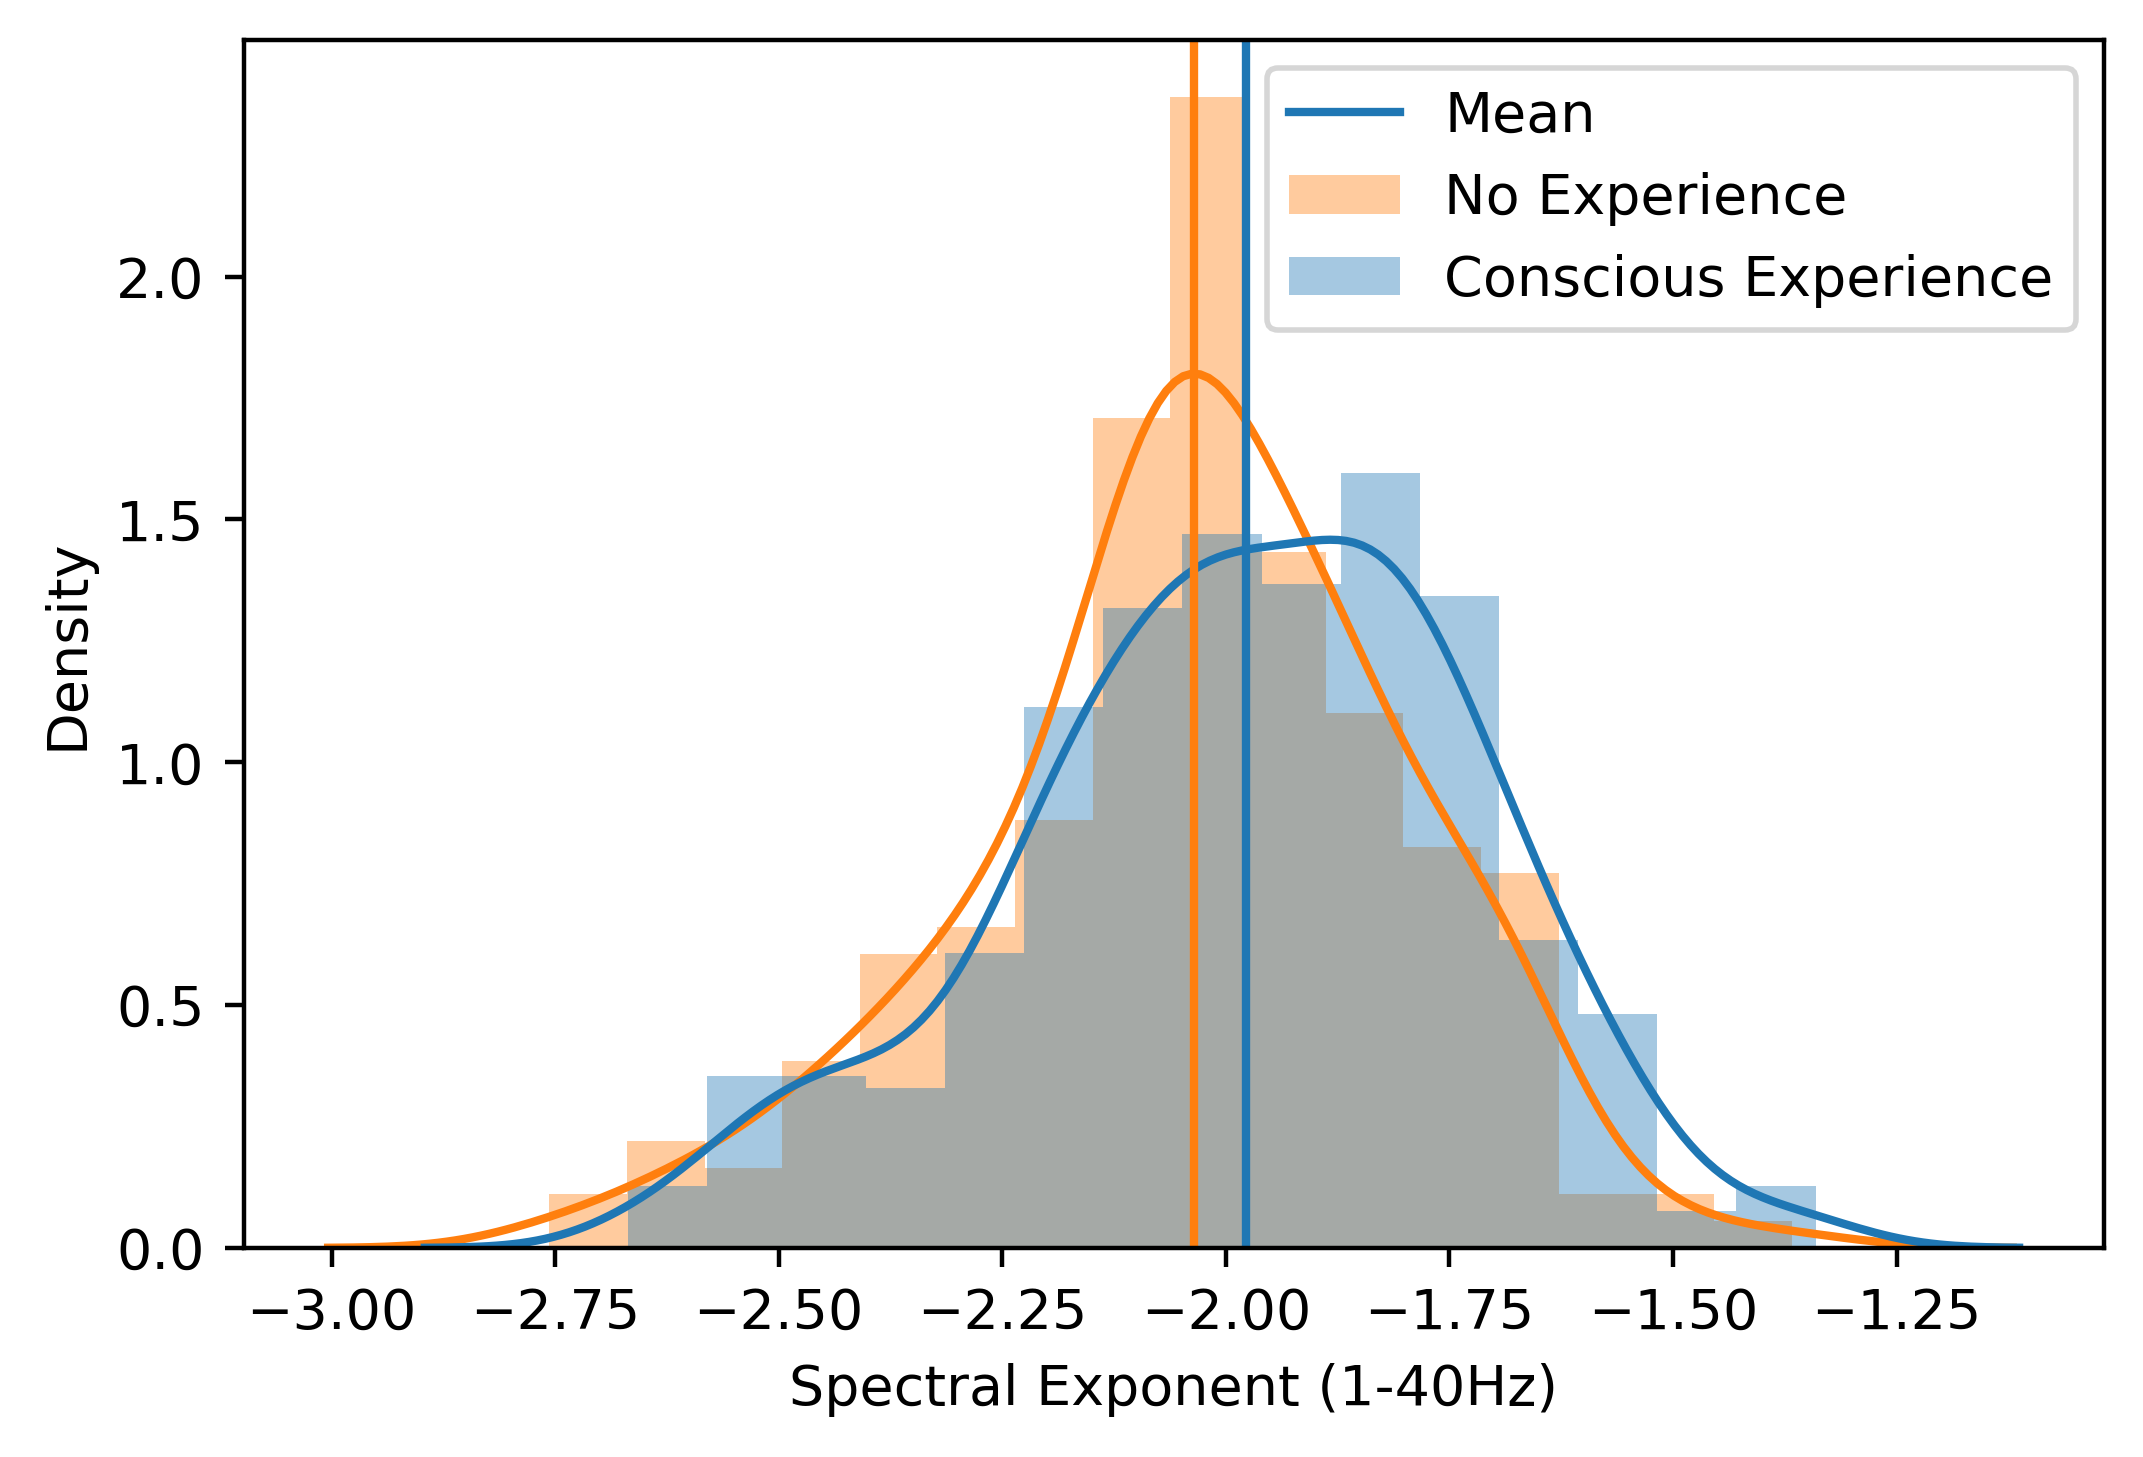

In [707]:
nrem_dataframe["REPORT_BINARY"] = "No Experience"
nrem_dataframe.loc[nrem_dataframe[(nrem_dataframe["Q1Experience"] != "NoReport")].index,"REPORT_BINARY"] = "Conscious Experience"

    
fig, ax=plt.subplots( dpi=400)

df_nona = nrem_dataframe[(nrem_dataframe["SPECEXP_1-40"].notna()) &\
                         (nrem_dataframe["scoring_match"] == 1) &\
                         (nrem_dataframe["HOLD_OUT"] == False)].copy()

# df_nona = nrem_dataframe[(nrem_dataframe["SPECEXP_1-40"].notna())].copy()

# df_nona.loc[df_nona[df_nona["Q1Experience"] == "Something"].index,"Q1Experience"] = "Conscious Experience"
# df_nona.loc[df_nona[df_nona["Q1Experience"] == "Report"].index,"Q1Experience"] = "Conscious Experience"

plot = sns.distplot(df_nona[df_nona["REPORT_BINARY"] == "No Experience"]["SPECEXP_1-40"], hist=True, kde=True, 
             color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1],
                   label = "No Experience")
plot = sns.distplot(df_nona[df_nona["REPORT_BINARY"] == "Conscious Experience"]["SPECEXP_1-40"], hist=True, kde=True, 
             color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0],
                   label = "Conscious Experience")
# plot.legend()

plt.axvline(x=np.mean(df_nona[df_nona["REPORT_BINARY"] == "No Experience"]["SPECEXP_1-40"]),
                       color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])
plt.axvline(x=np.mean(df_nona[df_nona["REPORT_BINARY"] == "Conscious Experience"]["SPECEXP_1-40"]),
                      color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0],
           label = "Mean")

plot.legend()

# ax = sns.violinplot(x="Q1Experience", y="SPECEXP_1-40", data=df_nona)

df_nona["SPECEXP_1_40"] = df_nona["SPECEXP_1-40"].values
df_nona["Q1_DUMMY"] = 0
df_nona.loc[df_nona[df_nona["REPORT_BINARY"] == "Conscious Experience"].index,"Q1_DUMMY"] = 1
vc = {'Visit': '0 + C(Visit)'}
md = sm.MixedLM.from_formula('SPECEXP_1_40 ~ Q1_DUMMY', vc_formula=vc,                                   
                         re_formula='1', groups='ID', data=df_nona)
mdf = md.fit()

plt.xlabel("Spectral Exponent (1-40Hz)")

print(mdf.summary())
print(mdf.pvalues)

# plot.ax_joint.axhline(y=3)
print(len(df_nona))



/Users/tononilab/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tononilab/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tononilab/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

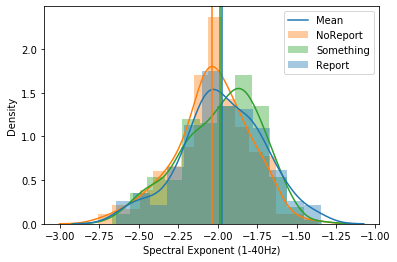

         Source        SS   DF        MS         F     p-unc       np2  \
0  Q1Experience  0.173154    2  0.086577  6.706602  0.001617  0.081089   
1         Error  1.962203  152  0.012909       NaN       NaN       NaN   

        eps  
0  0.913646  
1       NaN  
         Source        SS   DF        MS          F     p-unc       np2  \
0  Q1Experience  0.296328    2  0.148164  13.865198  0.000002  0.125064   
1         Error  2.073094  194  0.010686        NaN       NaN       NaN   

        eps  
0  0.908073  
1       NaN  
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: SPECEXP_1_40
No. Observations: 446     Method:             REML        
No. Groups:       83      Scale:              0.0439      
Min. group size:  1       Log-Likelihood:     0.8531      
Max. group size:  16      Converged:          Yes         
Mean group size:  5.4                                     
-----------------------------------------------------------
     

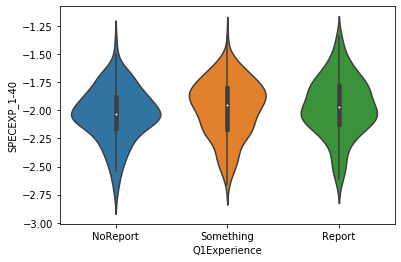

In [708]:
df_nona = nrem_dataframe[(nrem_dataframe["SPECEXP_1-40"].notna()) &\
                         (nrem_dataframe["scoring_match"] == 1) &\
                         (nrem_dataframe["HOLD_OUT"] == False)].copy()

plot = sns.distplot(df_nona[df_nona["Q1Experience"] == "NoReport"]["SPECEXP_1-40"], hist=True, kde=True, 
             color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1],
                   label = "NoReport")
plot = sns.distplot(df_nona[df_nona["Q1Experience"] == "Something"]["SPECEXP_1-40"], hist=True, kde=True, 
             color=plt.rcParams['axes.prop_cycle'].by_key()['color'][2],
                   label = "Something")
plot = sns.distplot(df_nona[df_nona["Q1Experience"] == "Report"]["SPECEXP_1-40"], hist=True, kde=True, 
             color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0],
                   label = "Report")
# plot.legend()

plt.axvline(x=np.mean(df_nona[df_nona["Q1Experience"] == "NoReport"]["SPECEXP_1-40"]),
                       color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])
plt.axvline(x=np.mean(df_nona[df_nona["Q1Experience"] == "Report"]["SPECEXP_1-40"]),
                      color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0],
                       label = "Mean")
plt.axvline(x=np.mean(df_nona[df_nona["Q1Experience"] == "Something"]["SPECEXP_1-40"]),
                      color=plt.rcParams['axes.prop_cycle'].by_key()['color'][2])

plot.legend()

plt.xlabel("Spectral Exponent (1-40Hz)")
plt.show()

ax = sns.violinplot(x="Q1Experience", y="SPECEXP_1-40", data=df_nona,
                   order=["NoReport","Something","Report"])

# df_nona["SPECEXP_1_40"] = df_nona["SPECEXP_1-40"].values
# md = smf.mixedlm("SPECEXP_1_40 ~ C(Q1Experience)", df_nona, groups=df_nona["ID"])
# mdf = md.fit()
# print(mdf.summary())
# print(mdf.pvalues)

import pingouin as pg
df_nona["SPECEXP_1_40"] = df_nona["SPECEXP_1-40"].values
df_nona["ID_plus_Visit"] = 100*df_nona["ID"].values + df_nona["Visit"].values

x = pg.rm_anova(data=df_nona, dv="SPECEXP_1-40", within="Q1Experience", subject="ID", detailed=True)
print(x)
x = pg.rm_anova(data=df_nona, dv="SPECEXP_1-40", within="Q1Experience", subject="ID_plus_Visit", detailed=True)
print(x)

df_nona["SPECEXP_1_40"] = df_nona["SPECEXP_1-40"].values
df_nona = df_nona[df_nona["Q1Experience"] != "NoReport"]
df_nona["Q1_DUMMY"] = 0
df_nona.loc[df_nona[df_nona["Q1Experience"] == "Report"].index,"Q1_DUMMY"] = 1
vc = {'Visit': '0 + C(Visit)'}
md = sm.MixedLM.from_formula('SPECEXP_1_40 ~ Q1_DUMMY', vc_formula=vc,                                   
                         re_formula='1', groups='ID', data=df_nona)
mdf = md.fit()

print(mdf.summary())
print(mdf.pvalues)

# plot.ax_joint.axhline(y=3)
print(len(df_nona))


          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: SPECEXP_1_20
No. Observations: 655     Method:             REML        
No. Groups:       84      Scale:              0.0612      
Min. group size:  1       Log-Likelihood:     -90.0664    
Max. group size:  20      Converged:          Yes         
Mean group size:  7.8                                     
-----------------------------------------------------------
           Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept  -1.804     0.025  -71.397  0.000  -1.854  -1.755
Q1_DUMMY    0.058     0.023    2.527  0.012   0.013   0.102
ID Var      0.012     0.026                                
Visit Var   0.016     0.026                                

Intercept    0.000000
Q1_DUMMY     0.011509
ID Var       0.054142
Visit Var    0.013188
dtype: float64
655


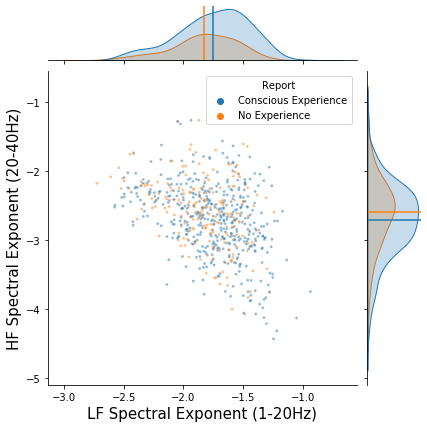

In [710]:
import seaborn as sns 

# fig, ax=plt.subplots( dpi=400)

nrem_dataframe["Report"] = "No Experience"
nrem_dataframe.loc[nrem_dataframe[(nrem_dataframe["Q1Experience"] != "NoReport")].index,"Report"] = "Conscious Experience"

  
df_nona = nrem_dataframe[(nrem_dataframe["SPECEXP_1-20"].notna()) &\
                         (nrem_dataframe["scoring_match"] == 1) &\
                         (nrem_dataframe["HOLD_OUT"] == False)].copy()

df_nona.loc[df_nona[df_nona["Q1Experience"] == "Something"].index,"Q1Experience"] = "Report/Something"
df_nona.loc[df_nona[df_nona["Q1Experience"] == "Report"].index,"Q1Experience"] = "Report/Something"

plot = sns.jointplot(data=df_nona, 
#               size=8,
              s=8,
              alpha=0.5,
#               kind="kde",
              x="SPECEXP_1-20", 
              y="SPECEXP_20-40", 
              hue="Report")
plot.ax_marg_x.axvline(x=np.mean(df_nona[df_nona["Q1Experience"] == "Report/Something"]["SPECEXP_1-20"]),
                       color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
plot.ax_marg_x.axvline(x=np.mean(df_nona[df_nona["Q1Experience"] == "NoReport"]["SPECEXP_1-20"]),
                      color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])

plot.ax_marg_y.axhline(y=np.mean(df_nona[df_nona["Q1Experience"] == "Report/Something"]["SPECEXP_20-40"]),
                       color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
plot.ax_marg_y.axhline(y=np.mean(df_nona[df_nona["Q1Experience"] == "NoReport"]["SPECEXP_20-40"]),
                      color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])

plot.set_axis_labels(xlabel="LF Spectral Exponent (1-20Hz)", ylabel="HF Spectral Exponent (20-40Hz)",
                    fontsize=15)

# Change seaborn plot size
# fig = plt.gcf()
# fig.set_size_inches(6, 6)

import statsmodels.api as sm
import statsmodels.formula.api as smf


df_nona["SPECEXP_1_20"] = df_nona["SPECEXP_1-20"].values
df_nona["SPECEXP_20_40"] = df_nona["SPECEXP_20-40"].values
df_nona["Q1_DUMMY"] = 0
df_nona.loc[df_nona[df_nona["Q1Experience"] == "Report/Something"].index,"Q1_DUMMY"] = 1

vc = {'Visit': '0 + C(Visit)'}
md = sm.MixedLM.from_formula('SPECEXP_1_20 ~ Q1_DUMMY', vc_formula=vc,                                   
                         re_formula='1', groups='ID', data=df_nona)
mdf = md.fit()

print(mdf.summary())
print(mdf.pvalues)

# plot.ax_joint.axhline(y=3)
print(len(df_nona))

         Source        SS   DF        MS         F     p-unc       np2  \
0  Q1Experience  0.218820    2  0.109410  6.343738  0.002305  0.083094   
1         Error  2.414573  140  0.017247       NaN       NaN       NaN   

        eps  
0  0.903027  
1       NaN  
         Source        SS   DF        MS          F  p-unc       np2       eps
0  Q1Experience  0.303862    2  0.151931 -21.109962    1.0 -0.431785  0.970644
1         Error -1.007597  140 -0.007197        NaN    NaN       NaN       NaN
584


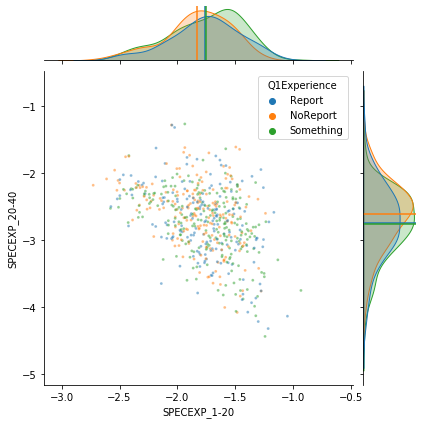

In [638]:
import seaborn as sns 

df_nona = nrem_dataframe[(nrem_dataframe["SPECEXP_1-20"].notna()) &\
                           (nrem_dataframe["scoring_match"] == 1) &\
                         (nrem_dataframe["HOLD_OUT"] == False)].copy()

plot = sns.jointplot(data=df_nona, 
              s=8,
              alpha=0.5,
#               kind="kde",
              x="SPECEXP_1-20", 
              y="SPECEXP_20-40", 
              hue="Q1Experience")

plot.ax_marg_x.axvline(x=np.mean(df_nona[df_nona["Q1Experience"] == "Report"]["SPECEXP_1-20"]),
                       color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
plot.ax_marg_x.axvline(x=np.mean(df_nona[df_nona["Q1Experience"] == "NoReport"]["SPECEXP_1-20"]),
                      color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])
plot.ax_marg_x.axvline(x=np.mean(df_nona[df_nona["Q1Experience"] == "Something"]["SPECEXP_1-20"]),
                      color=plt.rcParams['axes.prop_cycle'].by_key()['color'][2])

plot.ax_marg_y.axhline(y=np.mean(df_nona[df_nona["Q1Experience"] == "Report"]["SPECEXP_20-40"]),
                       color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
plot.ax_marg_y.axhline(y=np.mean(df_nona[df_nona["Q1Experience"] == "NoReport"]["SPECEXP_20-40"]),
                      color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])
plot.ax_marg_y.axhline(y=np.mean(df_nona[df_nona["Q1Experience"] == "Something"]["SPECEXP_20-40"]),
                      color=plt.rcParams['axes.prop_cycle'].by_key()['color'][2])

from pingouin import mixed_anova, read_dataset
import pingouin

# aov = mixed_anova(dv="SPECEXP_1-20", between="Q1Experience",
#                   subject="ID", data=df_nona)

x = pg.rm_anova(data=df_nona, dv="SPECEXP_1-20", within="Q1Experience", subject="ID", detailed=True)
print(x)
x = pg.rm_anova(data=df_nona, dv="SPECEXP_20-40", within="Q1Experience", subject="ID", detailed=True)
print(x)


# print(aov)

print(len(df_nona))

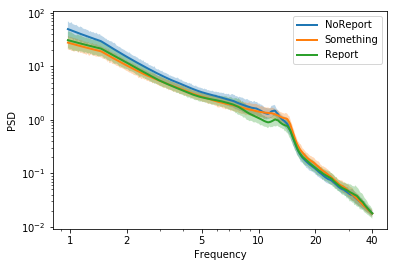

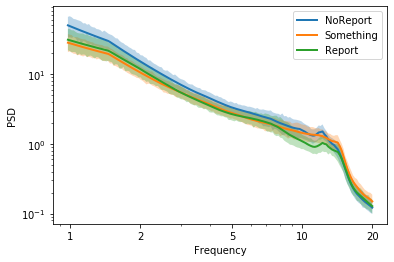

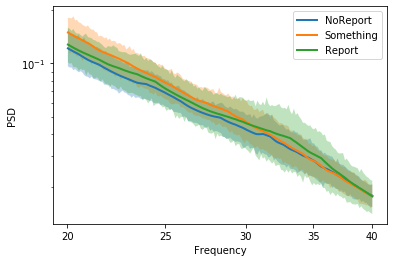

In [10]:
from matplotlib.ticker import ScalarFormatter    
    
for FREQS in ["1-40","1-20", "20-40"]:
    
    for condition in ["NoReport","Something", "Report"]:

        df_nona = nrem_dataframe[(nrem_dataframe[("SPECEXP_" + FREQS)].notna()) &\
                                 (nrem_dataframe["Q1Experience"] == condition) &\
                                 (nrem_dataframe["scoring_match"] == 1) &\
                                 (nrem_dataframe["HOLD_OUT"] == False)].copy()
        df_nona = df_nona.reset_index(drop=True)

        night_average = [];
        for i in range(0,len(df_nona)):
            night_average.append(df_nona.loc[i][("OBS_" + FREQS)])

        night_average = np.array(night_average)
        time_series_df = pd.DataFrame(np.transpose(night_average)) # axis 0 is frequencies, axis 1 is subjects


        #Plotting:
        plt.plot(df_nona.loc[0][("FREQ_" + FREQS)],np.mean(time_series_df,axis=1), 
                 linewidth=2, label=condition) #mean curve.
        
        
        low_i = [] # lower bound bootstrap
        high_i = [] # higher bound bootstrap
        for i in range(0,len(df_nona.loc[0][("FREQ_" + FREQS)])):
            boot_means = []
            for _ in range(500):
                boot_sample = np.random.choice(time_series_df.loc[i],
                                               replace = True, 
                                               size = len(time_series_df.loc[i])) # take a random sample each iteration
                boot_mean = np.mean(boot_sample)# calculate the mean for each iteration
                boot_means.append(boot_mean) # append the mean to boot_means
            
            boot_means_np = np.array(boot_means) # transform it into a numpy array for calculation
            low_i.append(np.percentile(boot_means_np, 0.5)) # 99% C.I.)
            high_i.append(np.percentile(boot_means_np, 99.5))
        
        low_i = np.array(low_i) 
        high_i = np.array(high_i)
            
        plt.fill_between(df_nona.loc[0][("FREQ_" + FREQS)], 
                         low_i, 
                         high_i, 
                         alpha=.3) 
        
        plt.xlabel("Frequency")
        plt.ylabel("PSD")
        
    
    ax = plt.gca()
    import matplotlib.ticker as ticker
    ax.set_yscale('log')
    ax.set_xscale('log')
    
    if FREQS == "1-40":
        x = [1, 2, 5, 10, 20, 40] 
        plt.xticks(x,x)
    if FREQS == "1-20":
        x = [1, 2, 5, 10, 20] 
        plt.xticks(x,x)
    if FREQS == "20-40":
        x = [20, 25, 30, 35, 40] 
        plt.xticks(x,x)

    plt.legend()
    plt.show()

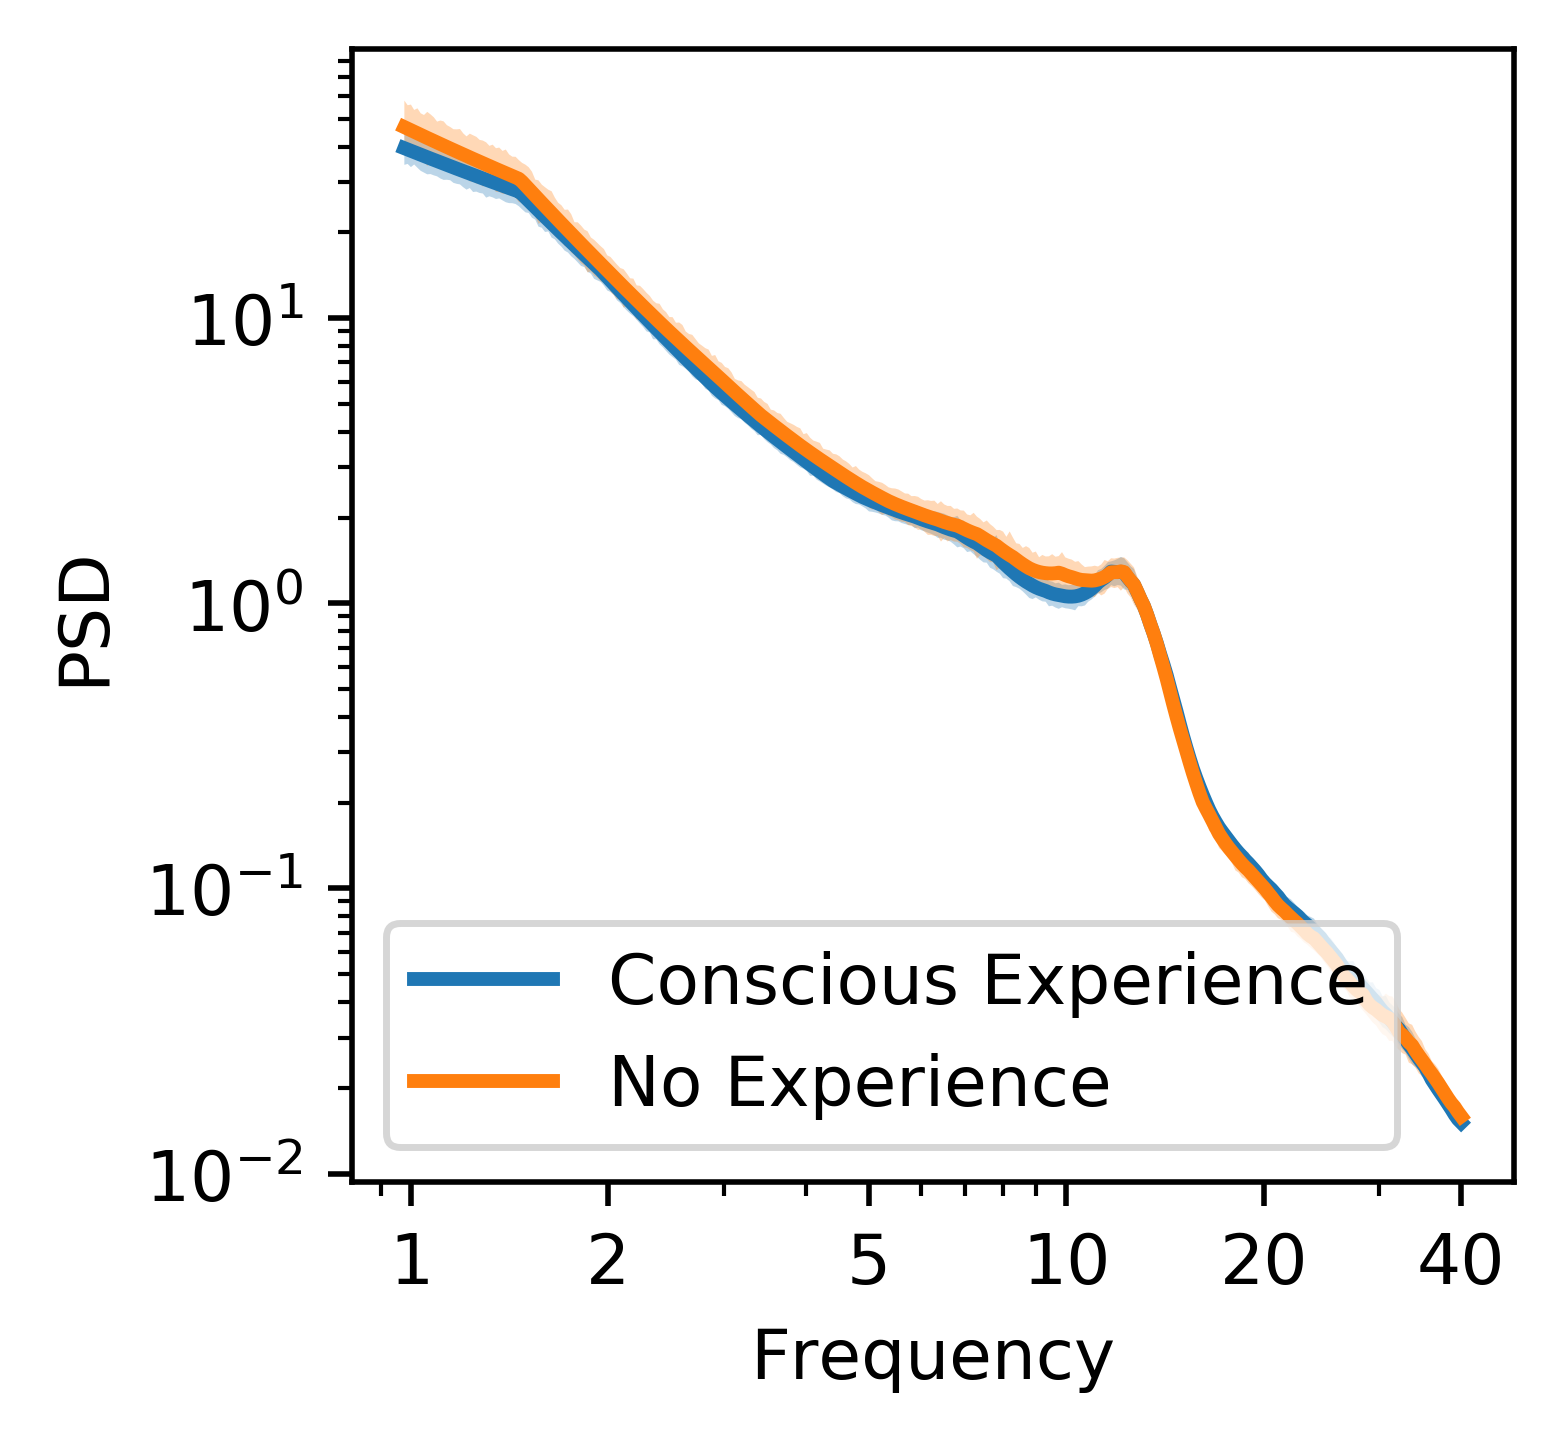

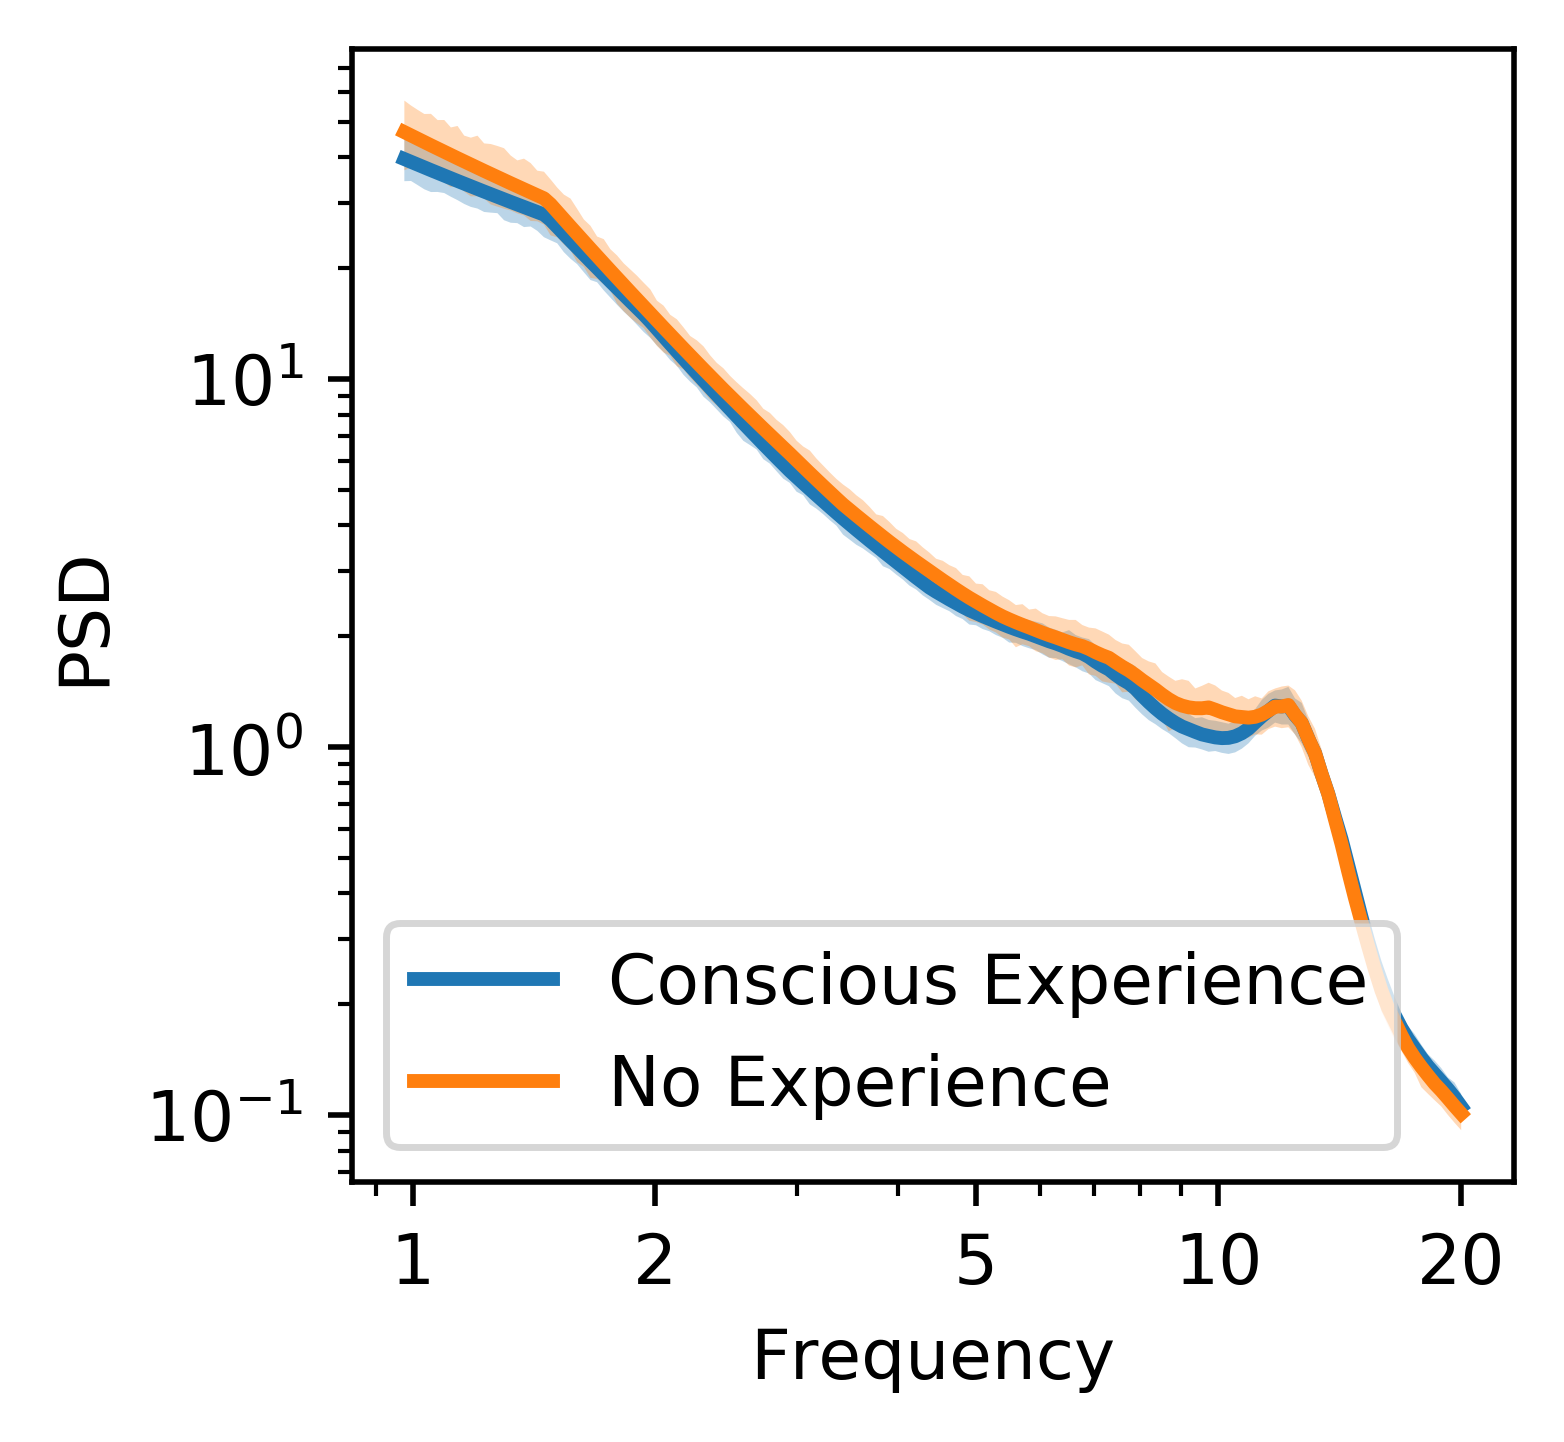

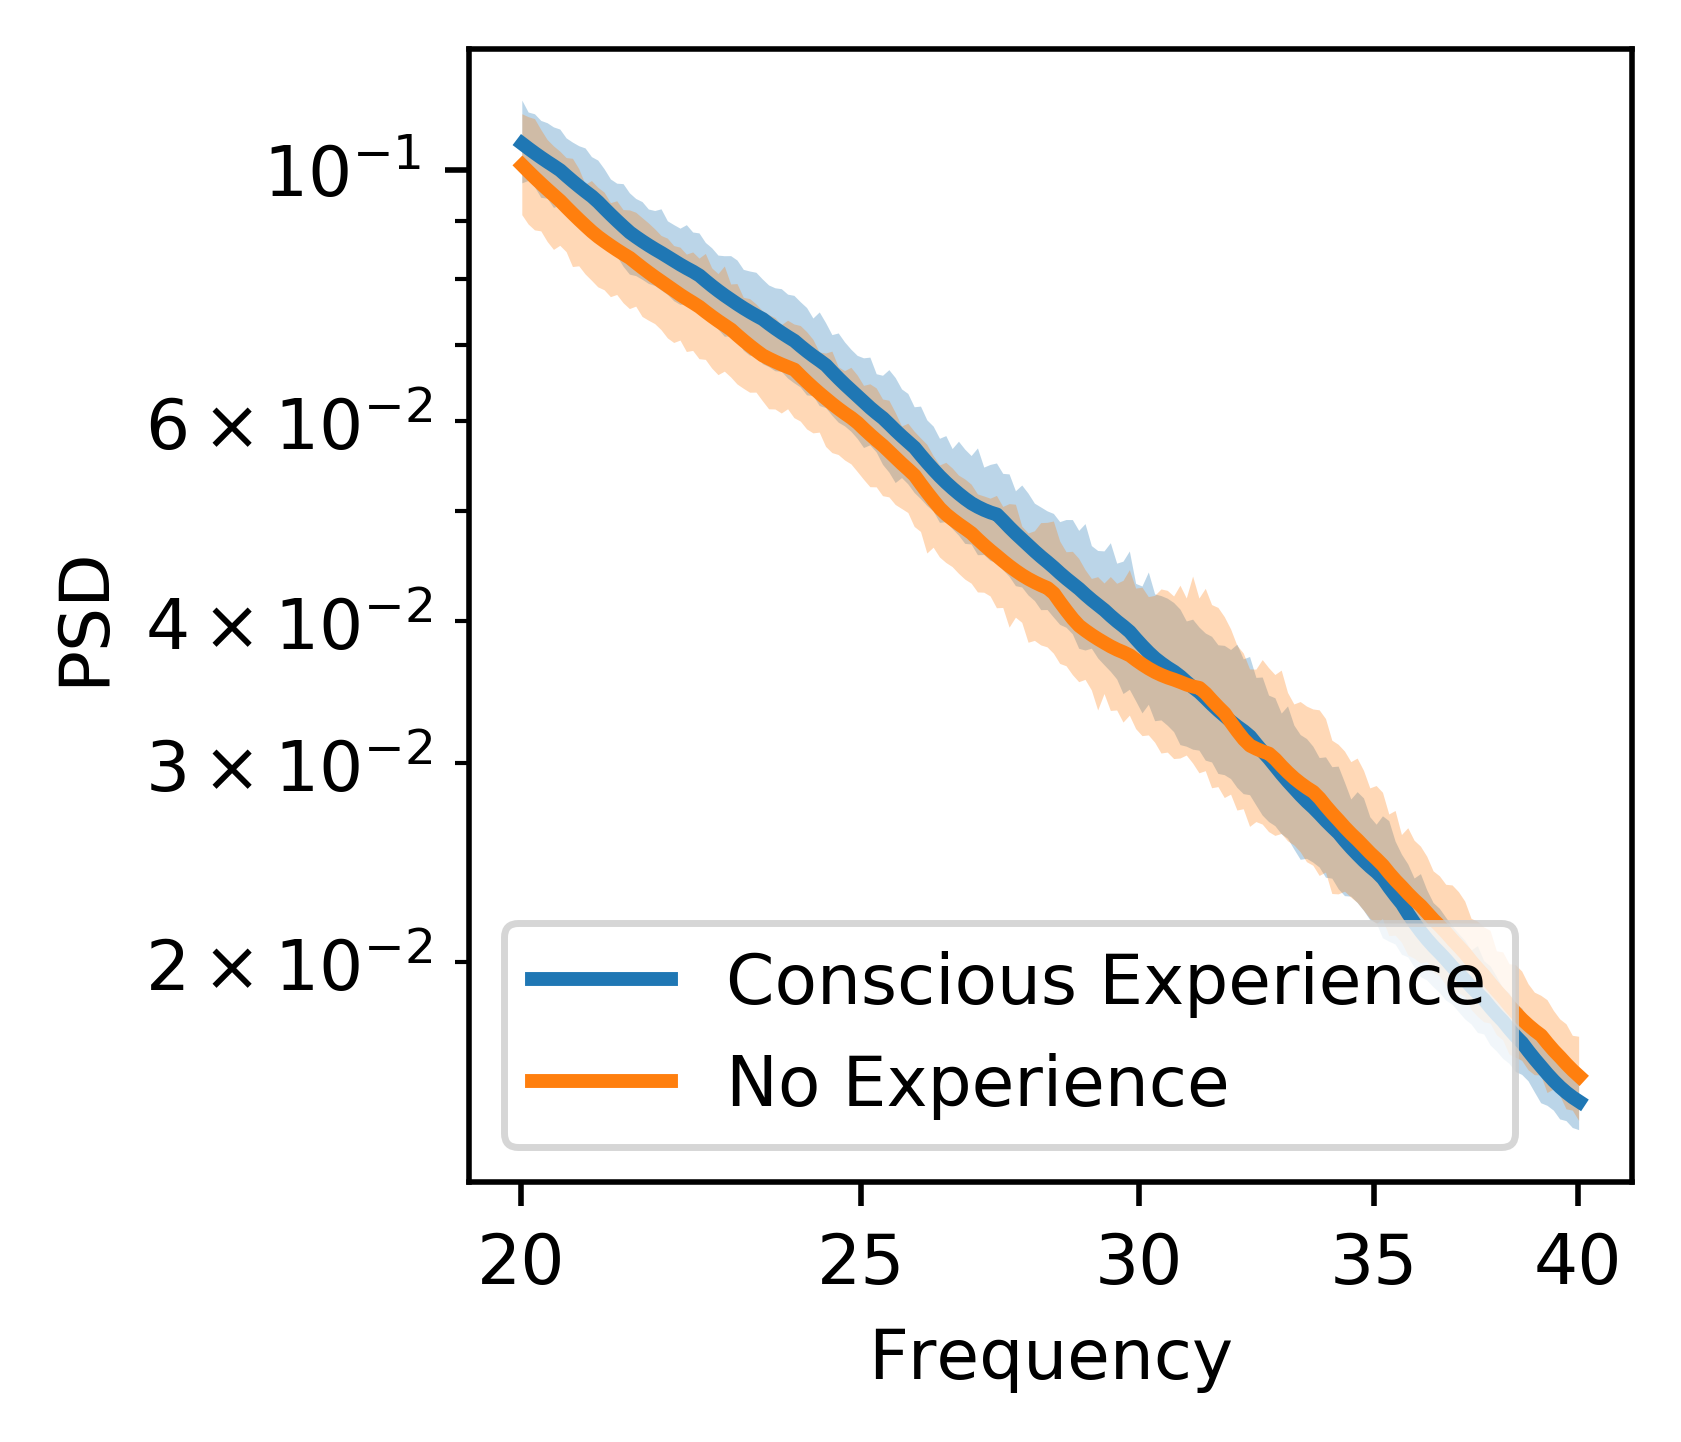

In [700]:
from matplotlib.ticker import ScalarFormatter 

nrem_dataframe["REPORT_BINARY"] = "No Experience"
nrem_dataframe.loc[nrem_dataframe[(nrem_dataframe["Q1Experience"] != "NoReport")].index,"REPORT_BINARY"] = "Conscious Experience"

    
for FREQS in ["1-40","1-20", "20-40"]:
    
    fig, ax=plt.subplots(figsize=(3,3),dpi=500)
    
    for condition in ["Conscious Experience","No Experience"]:

        df_nona = nrem_dataframe[(nrem_dataframe[("SPECEXP_" + FREQS)].notna()) &\
                                 (nrem_dataframe["REPORT_BINARY"] == condition) &\
                                 (nrem_dataframe["scoring_match"] == 1) &\
                                 (nrem_dataframe["HOLD_OUT"] == False)].copy()
        df_nona = df_nona.reset_index(drop=True)

        night_average = [];
        for i in range(0,len(df_nona)):
            night_average.append(df_nona.loc[i][("OBS_" + FREQS)])

        night_average = np.array(night_average)
        time_series_df = pd.DataFrame(np.transpose(night_average)) # axis 0 is frequencies, axis 1 is subjects


        #Plotting:
        plt.plot(df_nona.loc[0][("FREQ_" + FREQS)],np.mean(time_series_df,axis=1), 
                 linewidth=2, label=condition) #mean curve.
        
        
        low_i = [] # lower bound bootstrap
        high_i = [] # higher bound bootstrap
        for i in range(0,len(df_nona.loc[0][("FREQ_" + FREQS)])):
            boot_means = []
            for _ in range(500):
                boot_sample = np.random.choice(time_series_df.loc[i],
                                               replace = True, 
                                               size = len(time_series_df.loc[i])) # take a random sample each iteration
                boot_mean = np.mean(boot_sample)# calculate the mean for each iteration
                boot_means.append(boot_mean) # append the mean to boot_means
            
            boot_means_np = np.array(boot_means) # transform it into a numpy array for calculation
            low_i.append(np.percentile(boot_means_np, 0.5)) # 99% C.I.)
            high_i.append(np.percentile(boot_means_np, 99.5))
        
        low_i = np.array(low_i) 
        high_i = np.array(high_i)
            
        plt.fill_between(df_nona.loc[0][("FREQ_" + FREQS)], 
                         low_i, 
                         high_i, 
                         alpha=.3) 
        
        plt.xlabel("Frequency")
        plt.ylabel("PSD")
        
    
    ax = plt.gca()
    import matplotlib.ticker as ticker
    ax.set_yscale('log')
    ax.set_xscale('log')
    
    if FREQS == "1-40":
        x = [1, 2, 5, 10, 20, 40] 
        plt.xticks(x,x)
    if FREQS == "1-20":
        x = [1, 2, 5, 10, 20] 
        plt.xticks(x,x)
    if FREQS == "20-40":
        x = [20, 25, 30, 35, 40] 
        plt.xticks(x,x)

    plt.legend()
    plt.show()